Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(30,15)})
pd.pandas.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv('D:/ml_assignment_code/ml_assignment_code/data/rideshare_kaggle.csv')
df_copy = df.copy()

In [4]:
df_copy.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [5]:
df_copy.shape

(693071, 57)

In [6]:
df_copy.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [7]:
num_col = [ i for i in df_copy.columns if df_copy[i].dtype != 'O']
cat_col = [ i for i in df_copy.columns if df_copy[i].dtype == 'O']

In [8]:
len(num_col)

46

In [9]:
cat_col

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [10]:
df_copy.drop("id",axis=1,inplace=True)

In [11]:
df_copy.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [12]:
import datetime

# Assuming 'timestamps' is a list or array of Unix timestamps
df_copy['timestamp'] = [datetime.datetime.fromtimestamp(ts) for ts in df_copy['timestamp']]


In [13]:
df_copy['timestamp']

0        2018-12-16 15:00:07.890
1        2018-11-27 07:30:23.677
2        2018-11-28 06:30:22.198
3        2018-11-30 10:23:02.749
4        2018-11-29 09:19:20.223
                   ...          
693066   2018-12-02 05:23:06.000
693067   2018-12-02 05:23:06.000
693068   2018-12-02 05:23:06.000
693069   2018-12-02 05:23:06.000
693070   2018-12-02 05:23:06.000
Name: timestamp, Length: 693071, dtype: datetime64[ns]

In [14]:
df_copy.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,2018-12-16 15:00:07.890,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2018-11-27 07:30:23.677,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,2018-11-28 06:30:22.198,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,2018-11-30 10:23:02.749,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,2018-11-29 09:19:20.223,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   timestamp                    693071 non-null  datetime64[ns]
 1   hour                         693071 non-null  int64         
 2   day                          693071 non-null  int64         
 3   month                        693071 non-null  int64         
 4   datetime                     693071 non-null  object        
 5   timezone                     693071 non-null  object        
 6   source                       693071 non-null  object        
 7   destination                  693071 non-null  object        
 8   cab_type                     693071 non-null  object        
 9   product_id                   693071 non-null  object        
 10  name                         693071 non-null  object        
 11  price                     

In [16]:
df_copy['datetime'] = pd.to_datetime(df_copy['datetime'])

In [17]:
df_copy['datetime_minute'] = df_copy['datetime'].dt.minute

In [18]:
# timestamp
df_copy['timestamp_minute'] = df_copy['timestamp'].dt.minute
df_copy['timestamp_hour'] = df_copy['timestamp'].dt.hour

In [19]:
df_copy.drop(columns=['timestamp','datetime'],axis=1,inplace=True)

In [30]:
df_copy.shape

(693071, 57)

In [20]:
df_copy.duplicated().sum()

5786

In [21]:
df_copy.drop_duplicates(inplace=True)

In [22]:
df_copy.reset_index(drop=True,inplace=True)

In [23]:
df_copy

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,datetime_minute,timestamp_minute,timestamp_hour
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,30,0,15
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0,30,7
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0,30,6
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,53,23,10
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,49,19,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687280,23,1,12,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,53,23,5
687281,23,1,12,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.

In [24]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_copy[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_copy.columns if feature not in numerical_feature]

print(numerical_feature,'numerical_feature')
print(discrete_feature,'discrete_feature')
print(continuous_feature,'continuous_feature')
print(categorical_feature,'categorical_feature')

['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'datetime_minute', 'timestamp_minute', 'timestamp_hour'] numerical_feature
['hour', 'day', 'month', 'surge_multiplier', 'latitude', 'longitude', 'temperatureHighTime', 'uvIndex', 'moonPhase', 'uvIndexTime', '

C:\Users\Asus\AppData\Local\Temp\ipykernel_21352\2236285620.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,10))


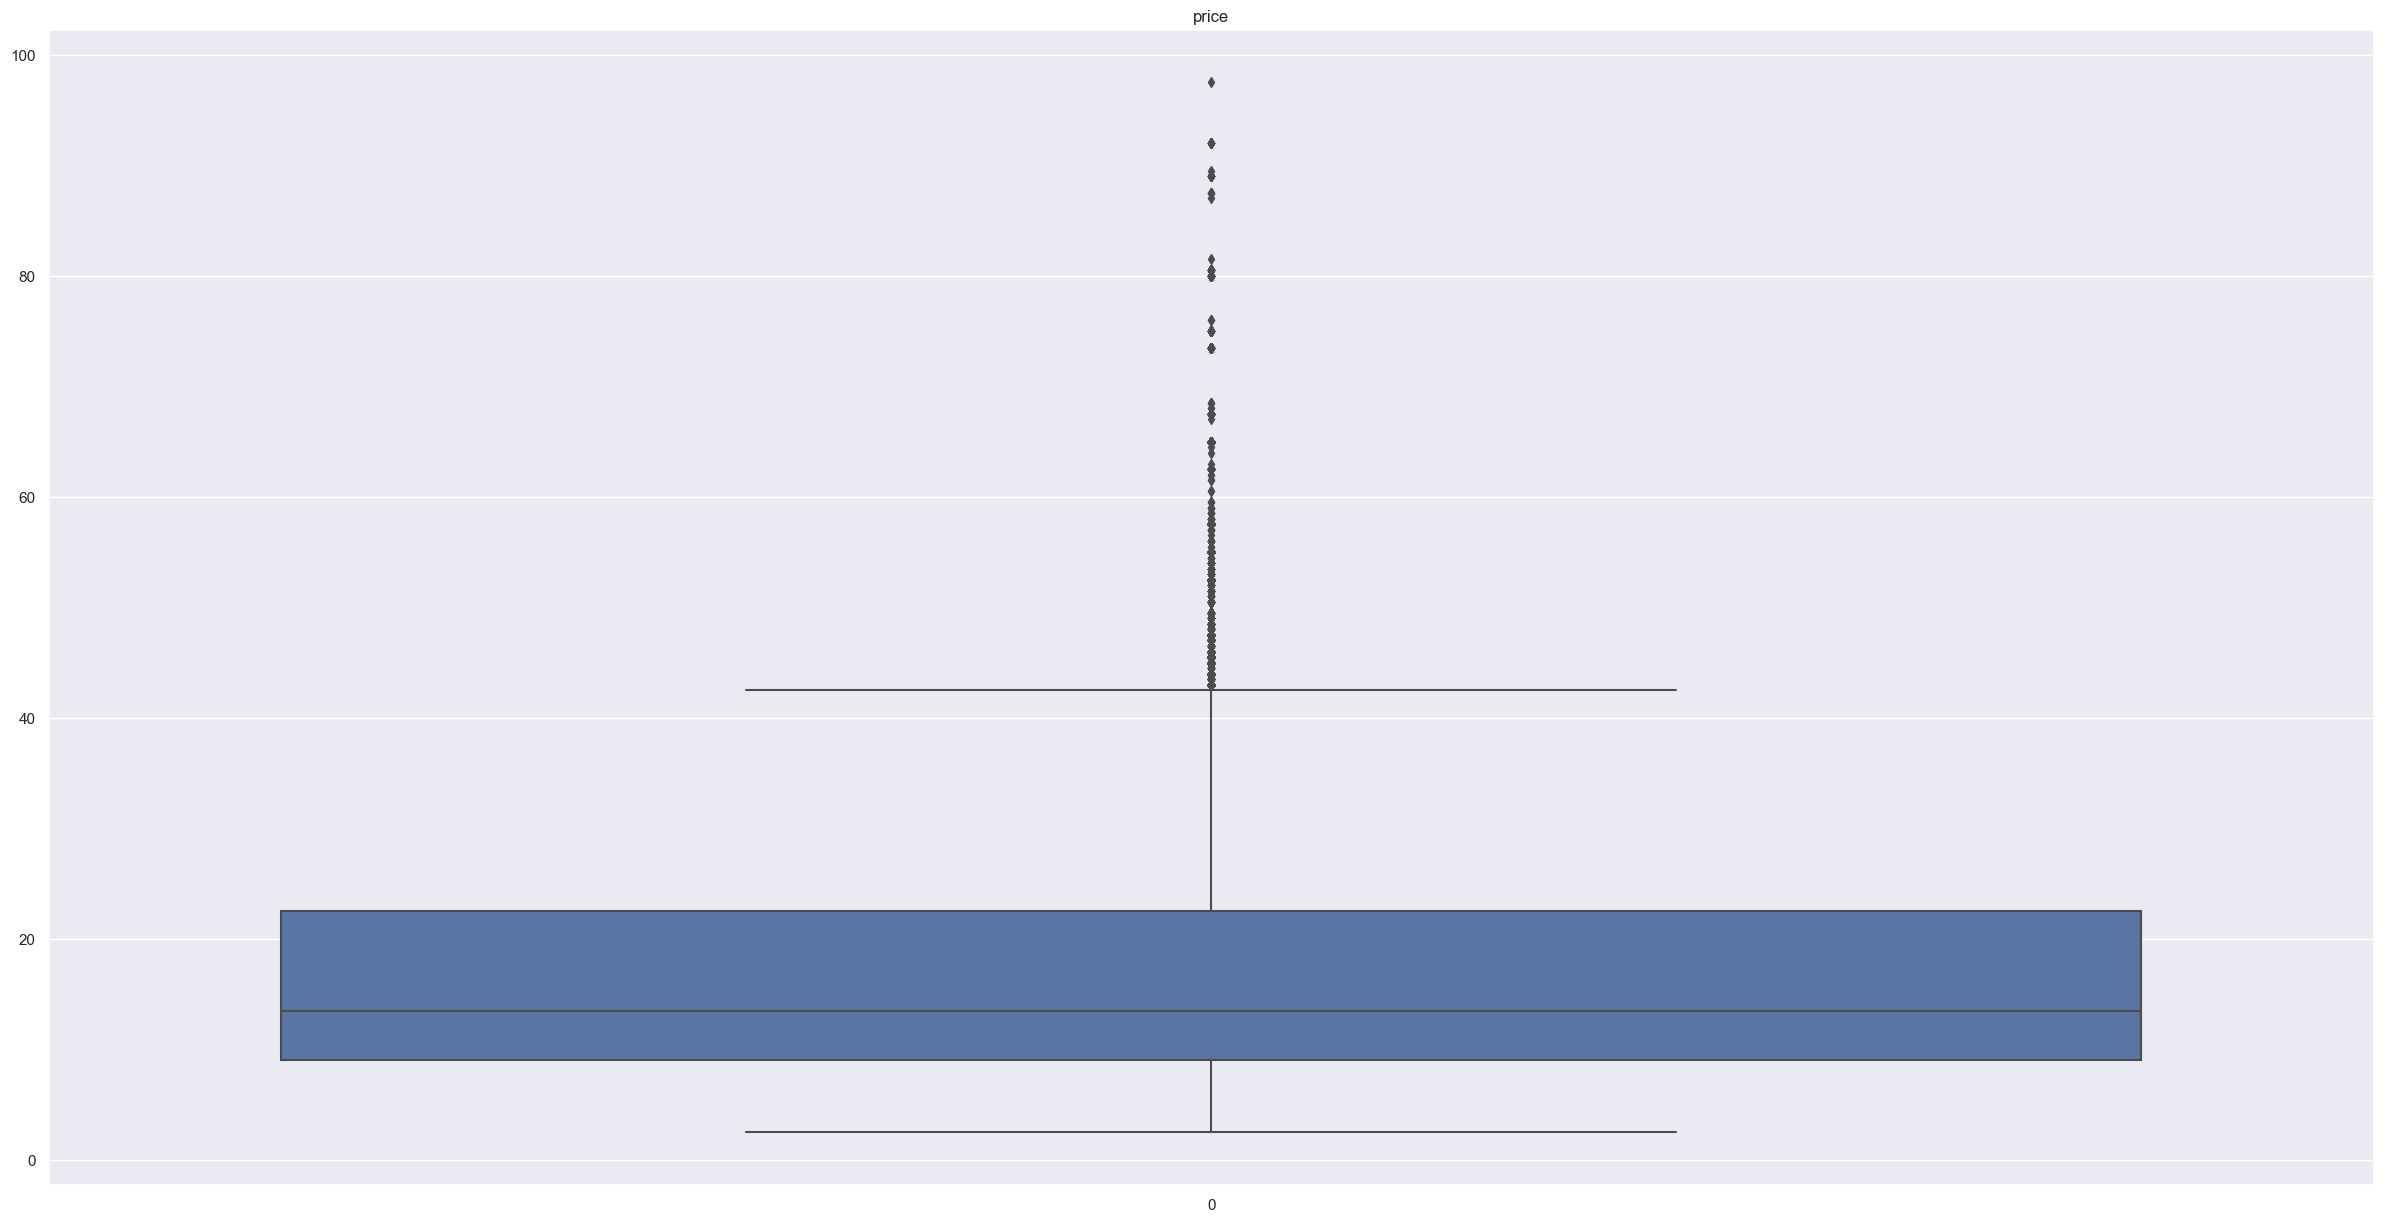

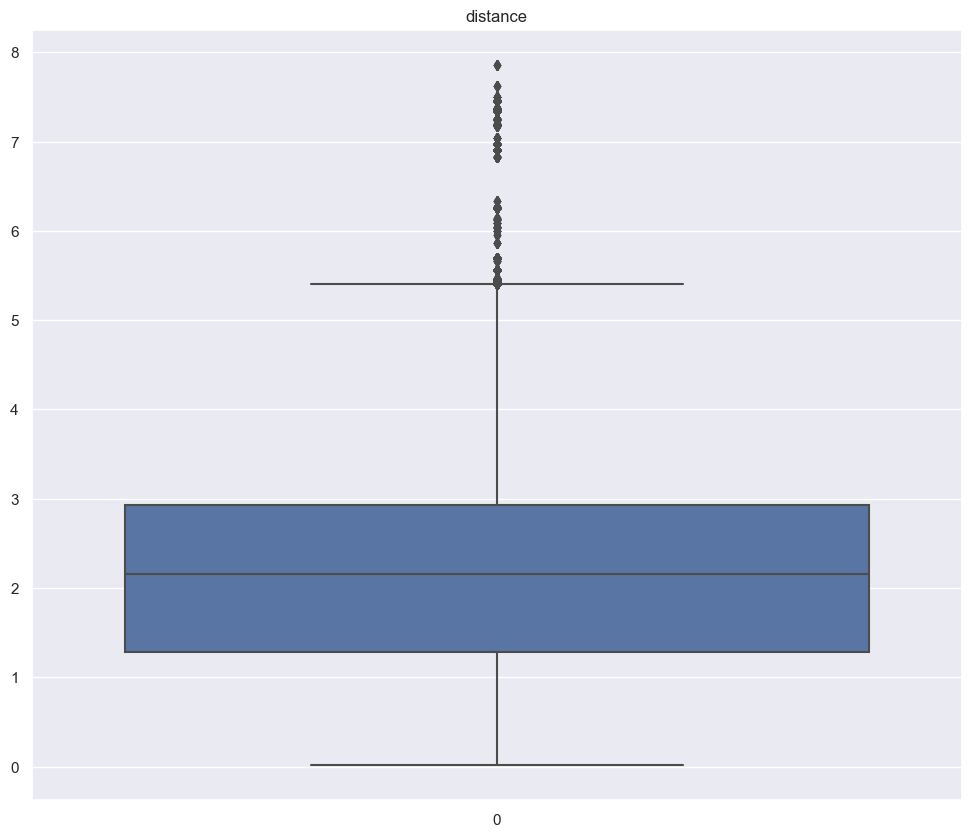

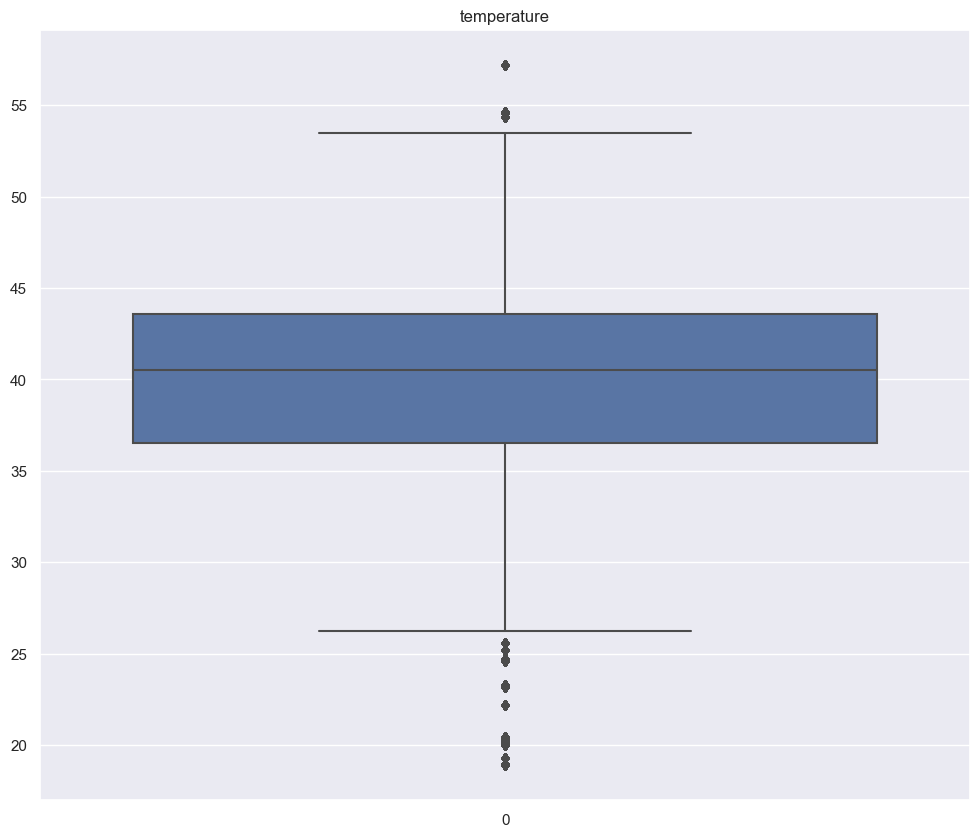

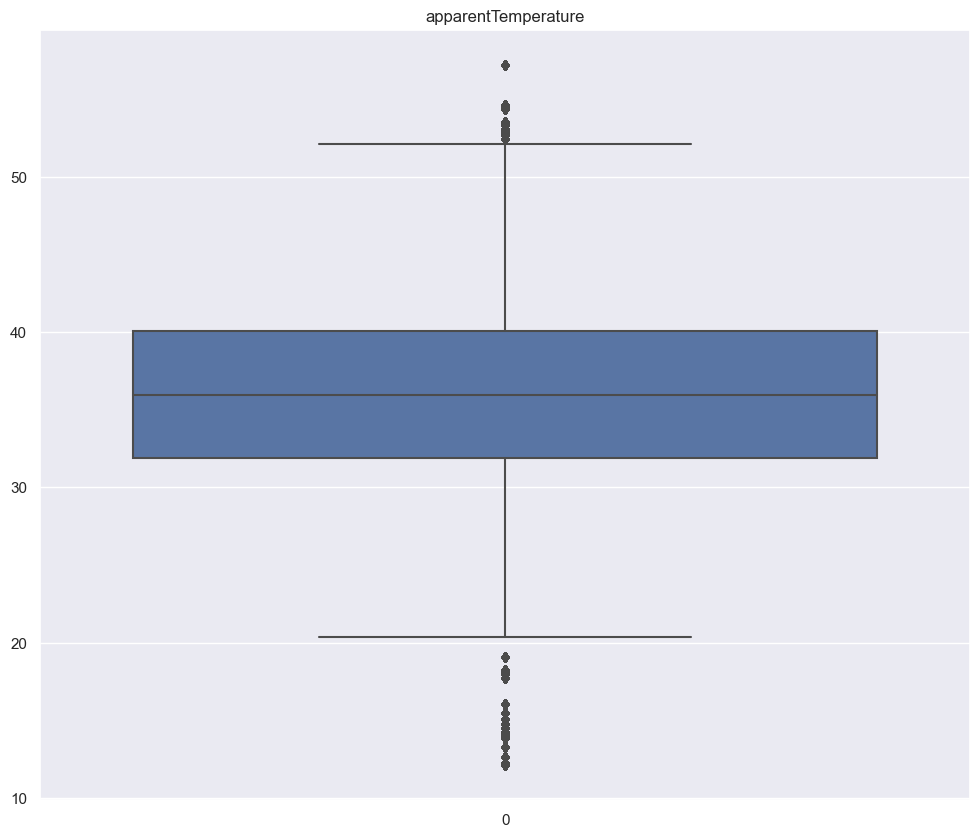

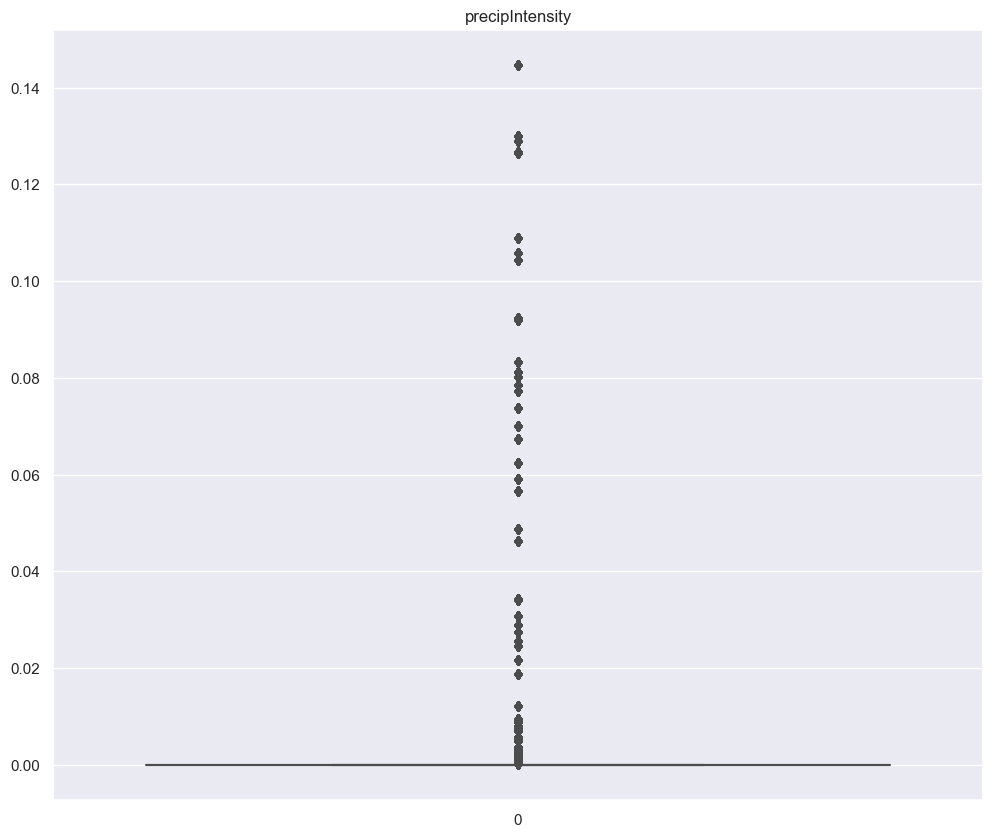

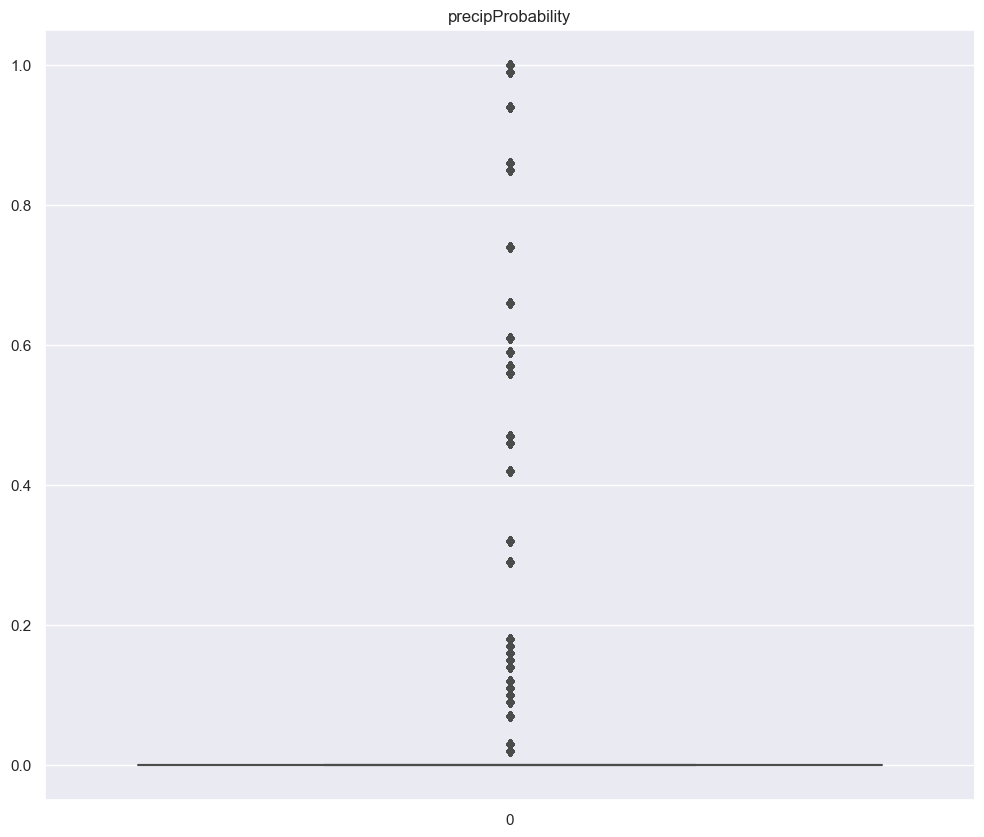

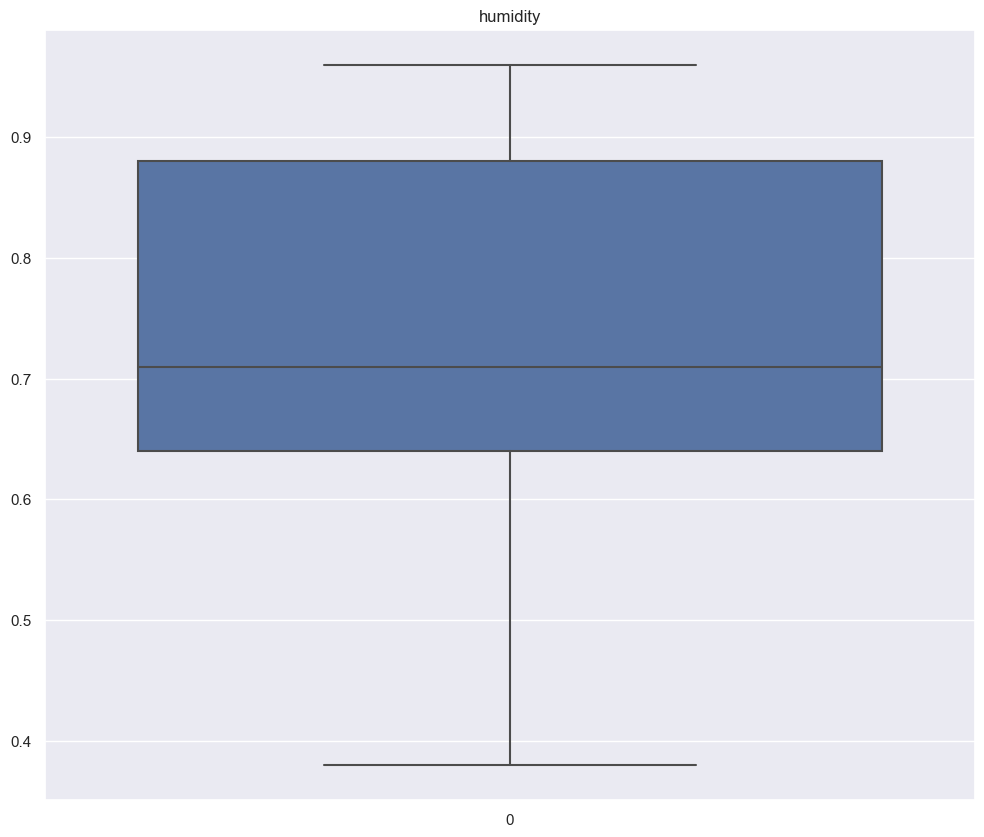

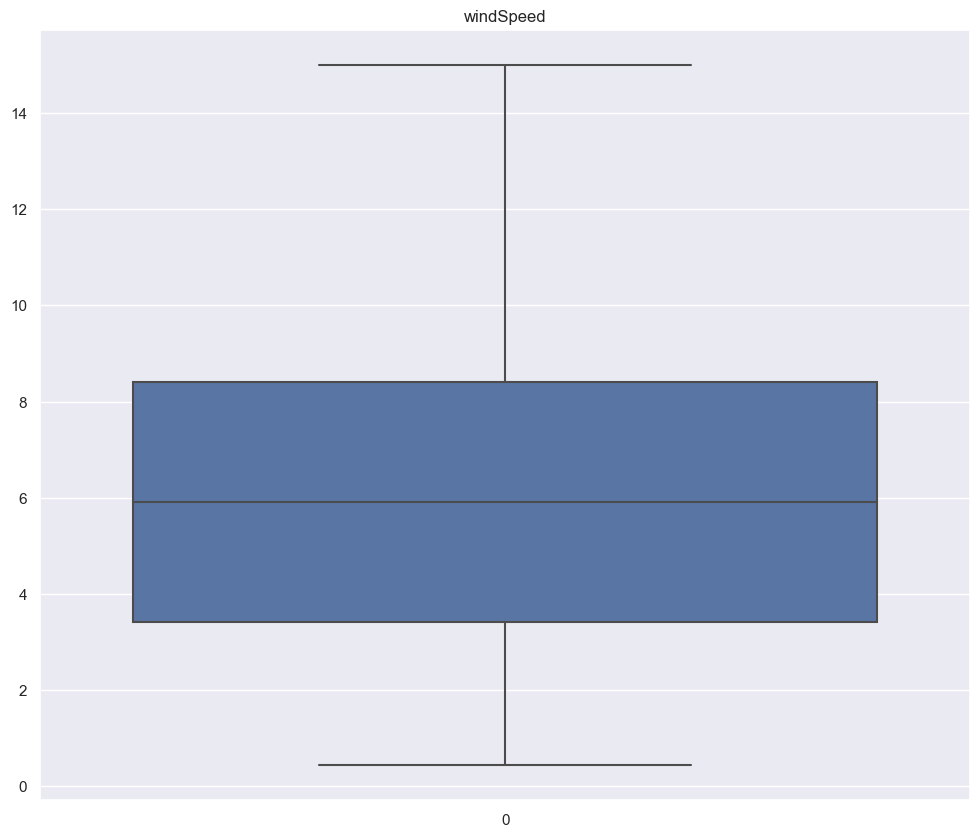

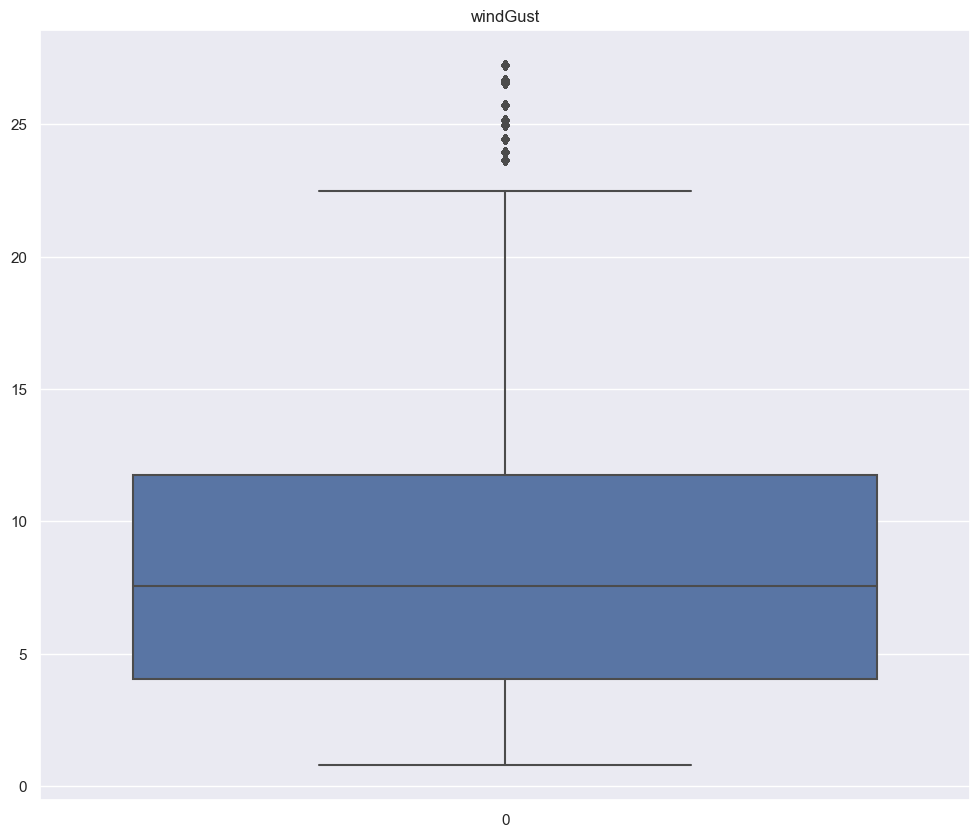

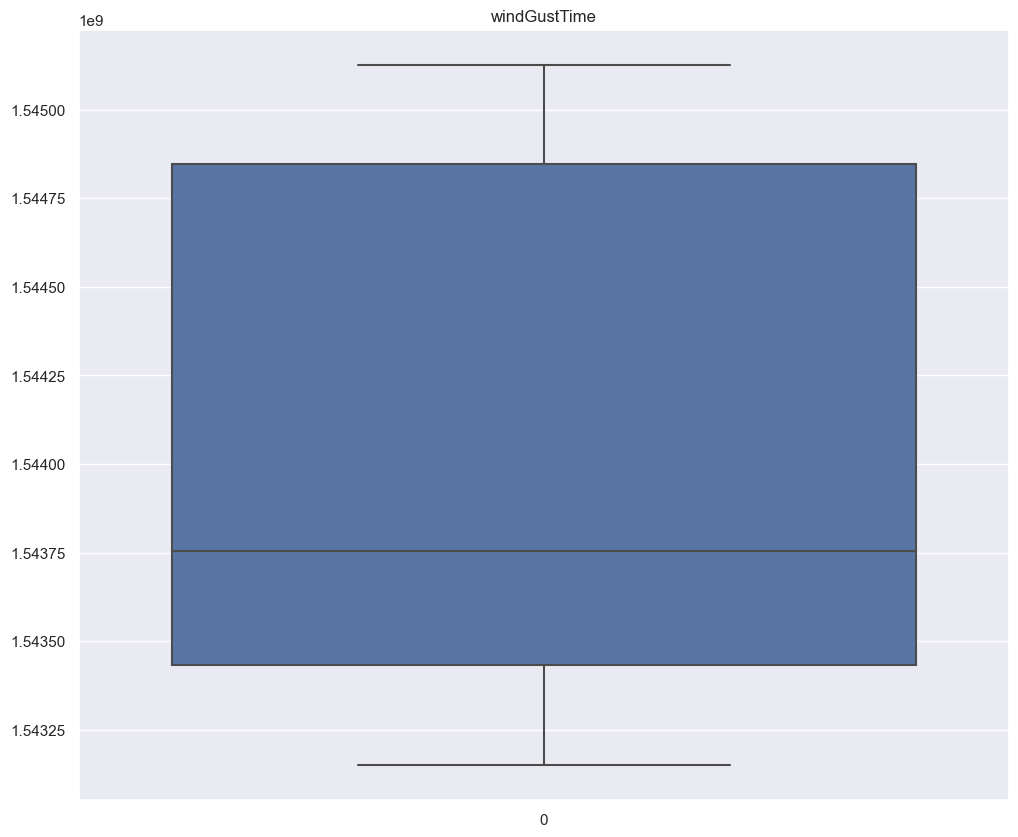

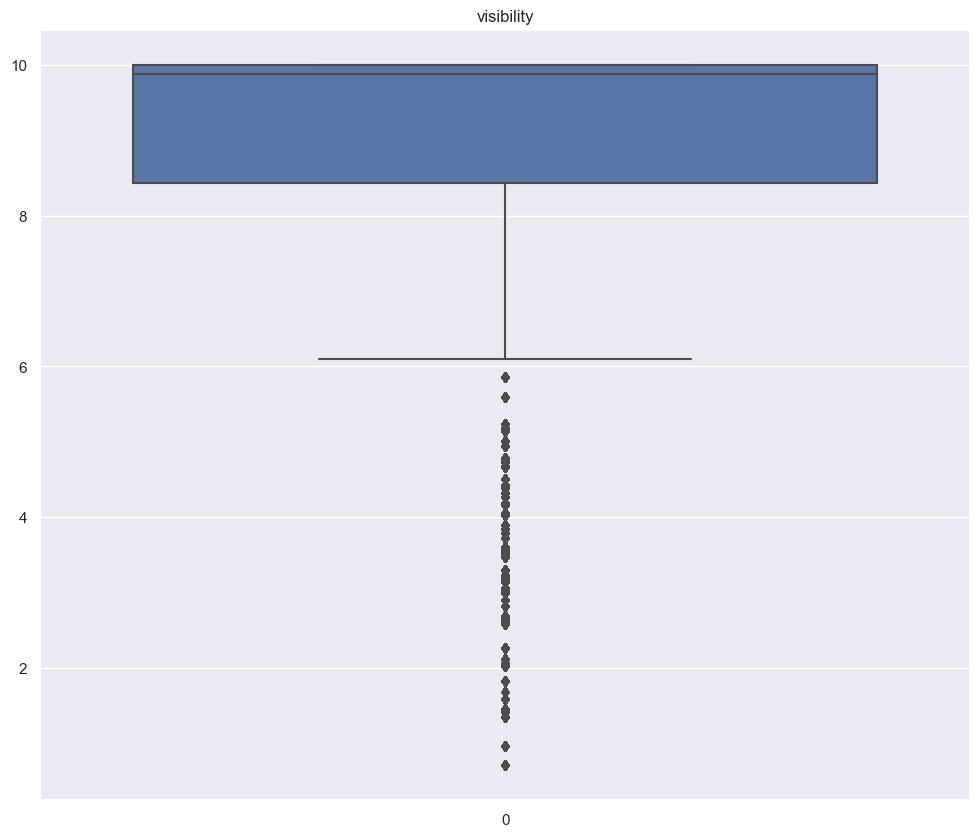

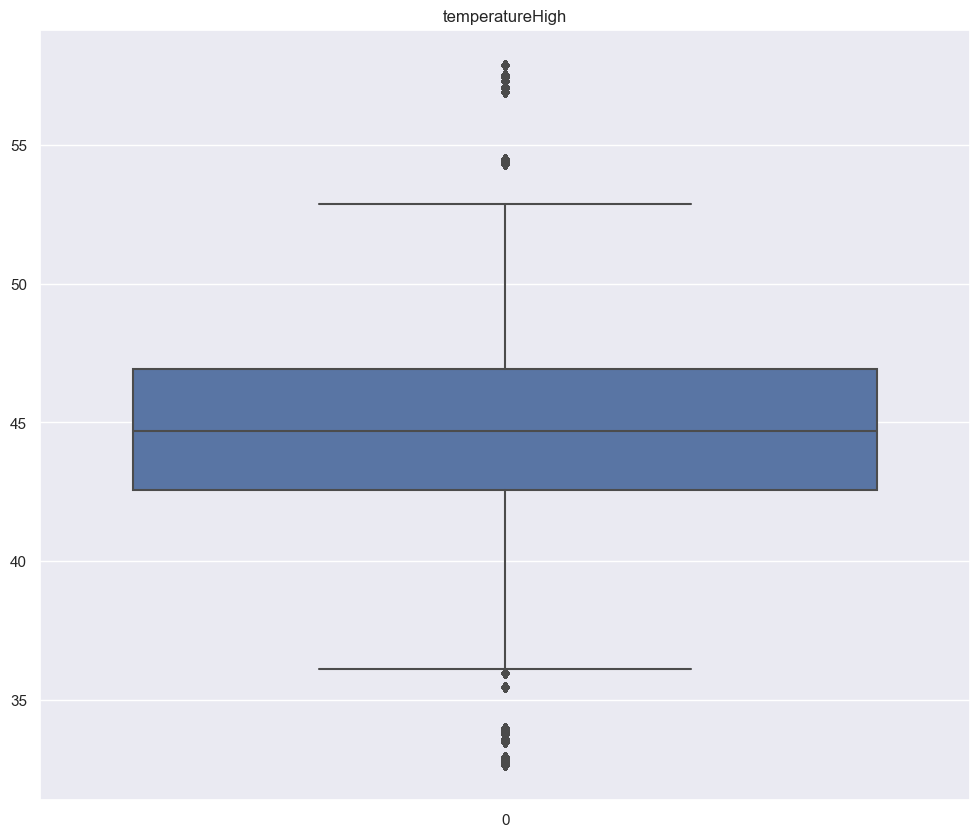

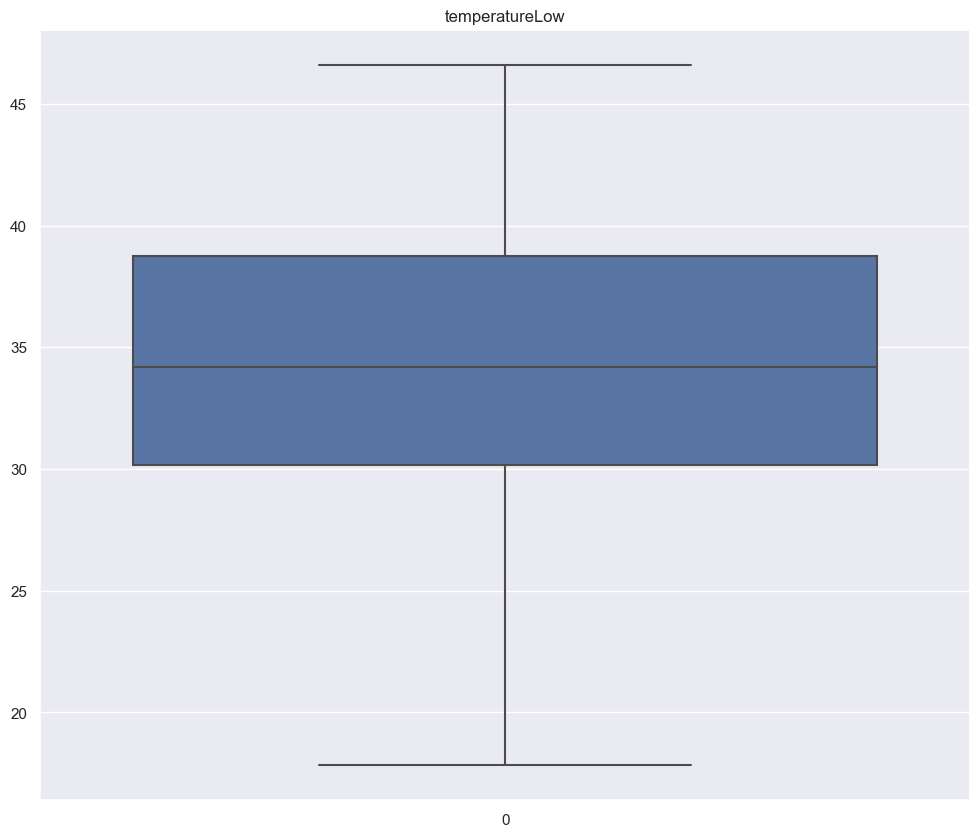

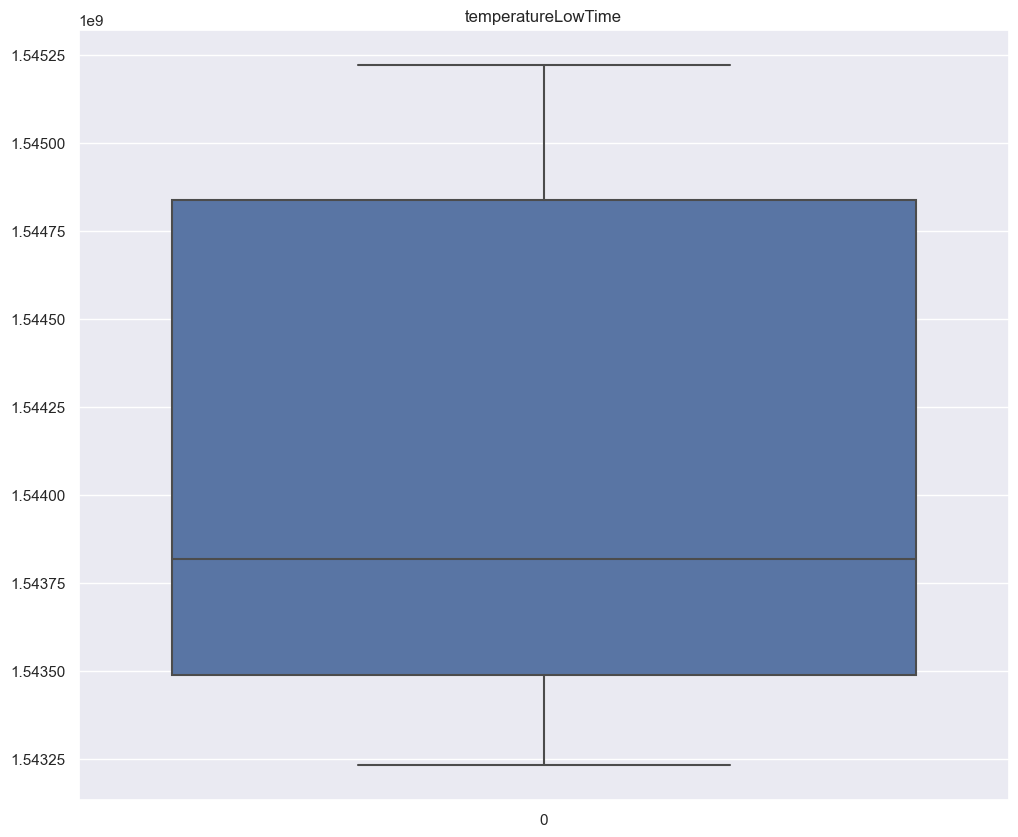

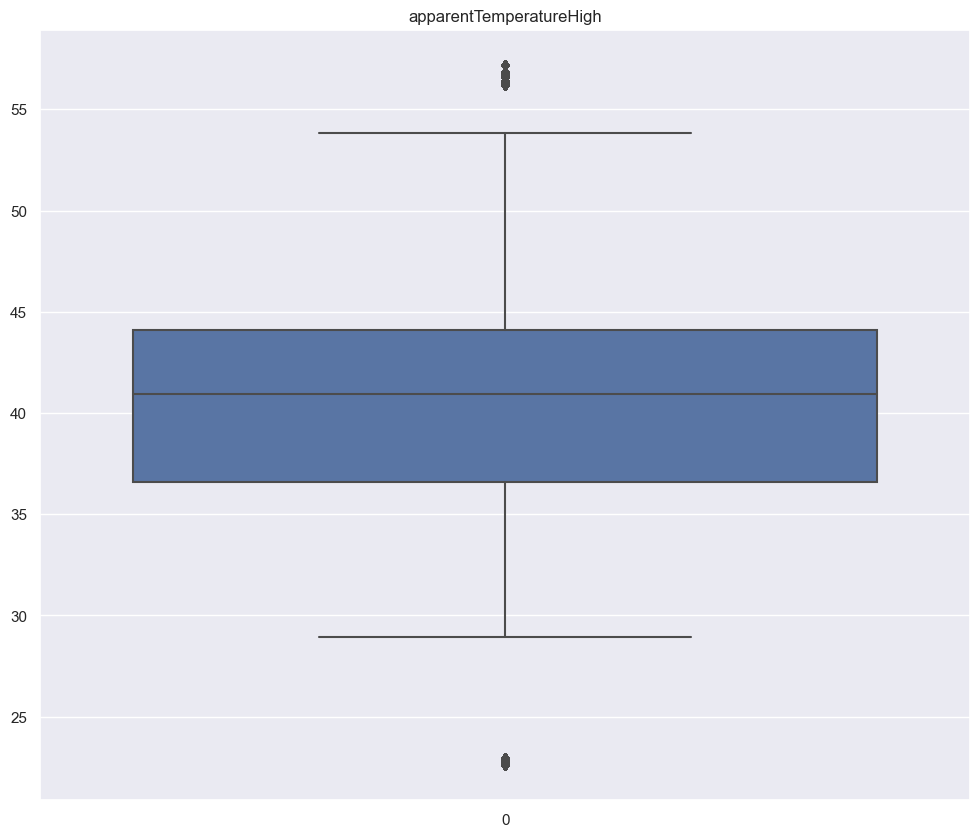

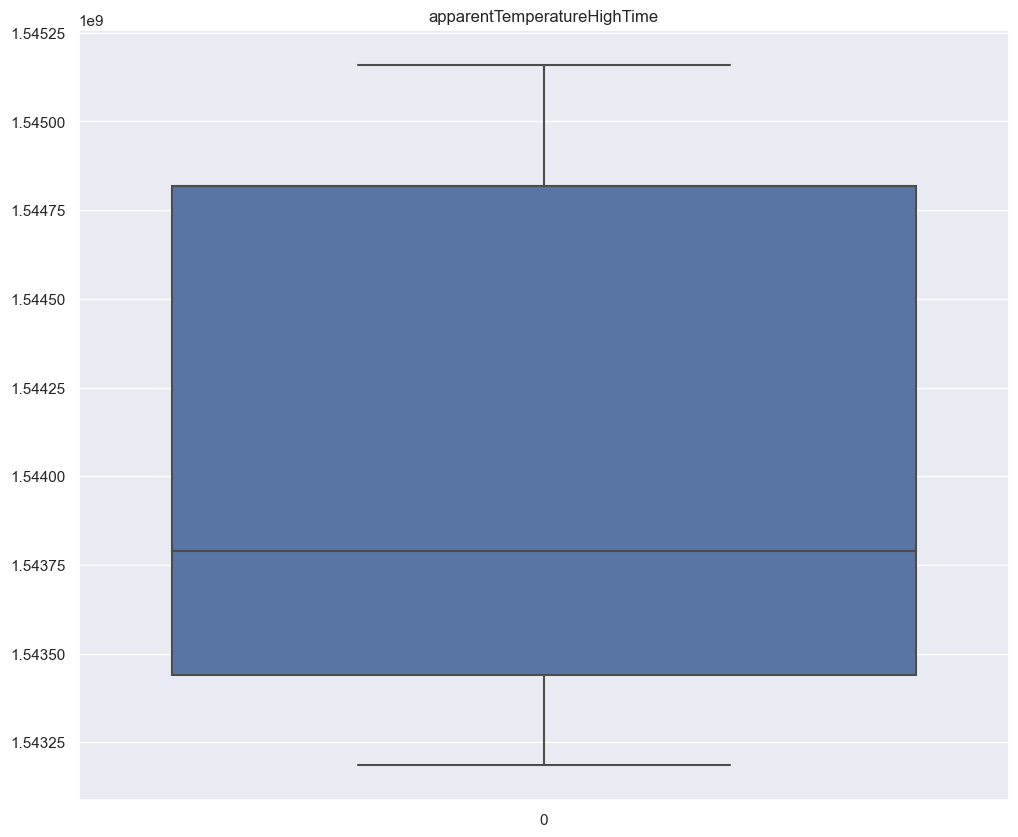

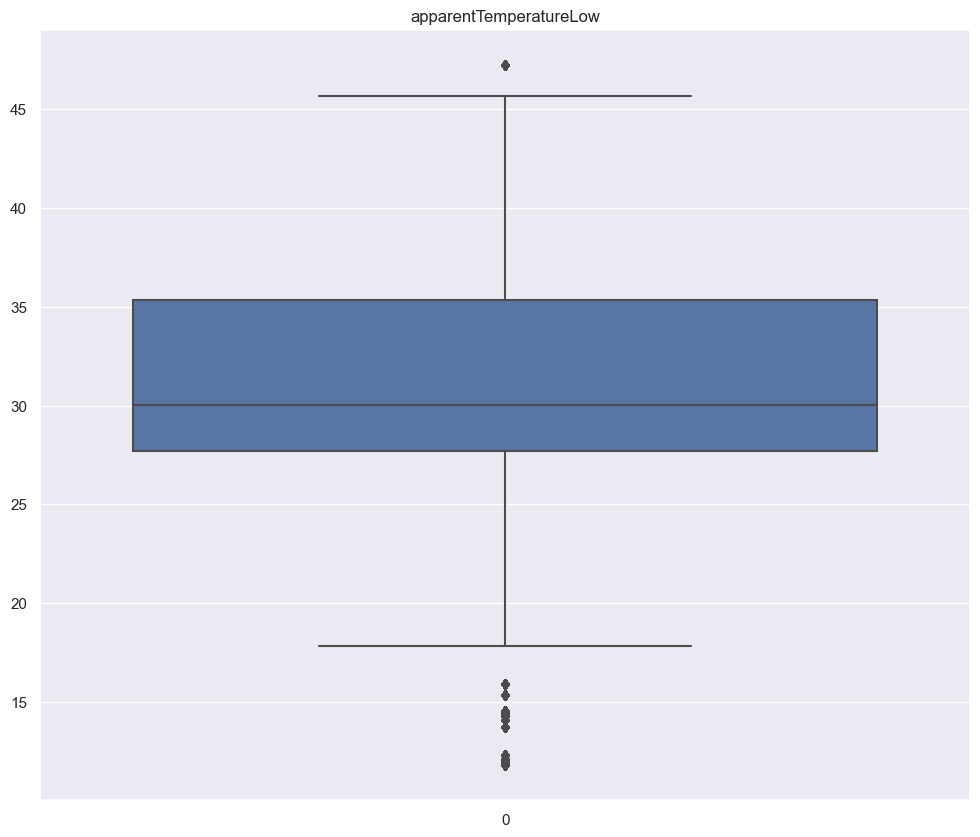

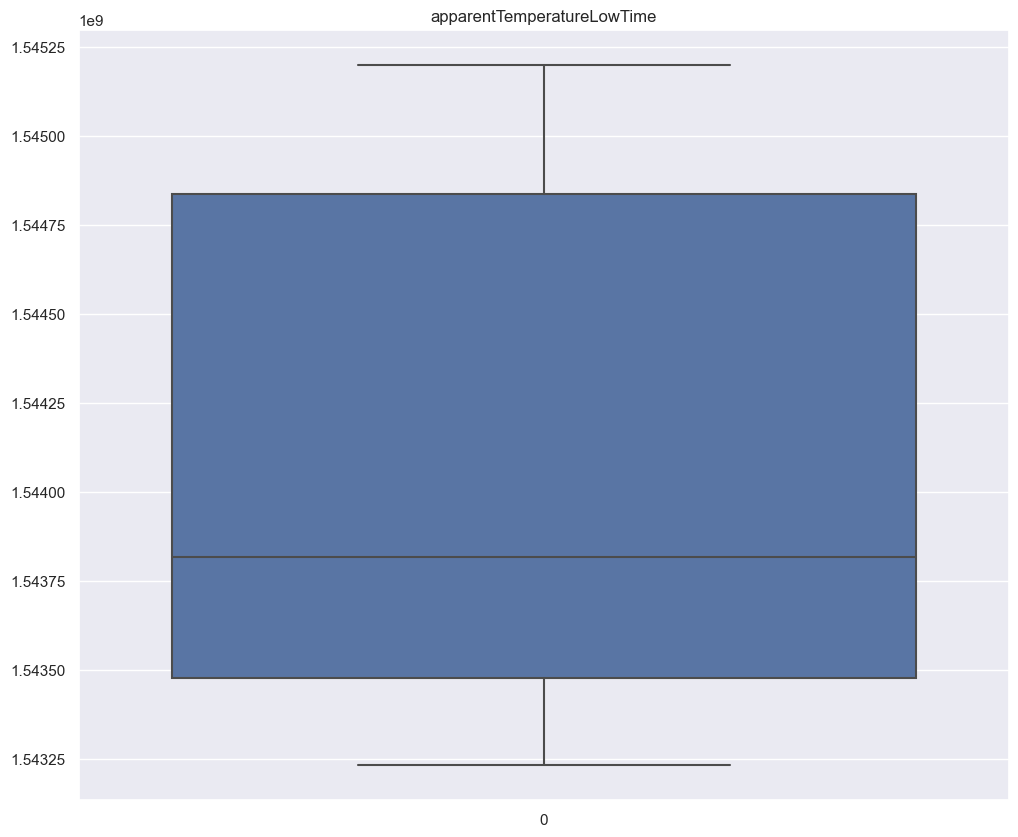

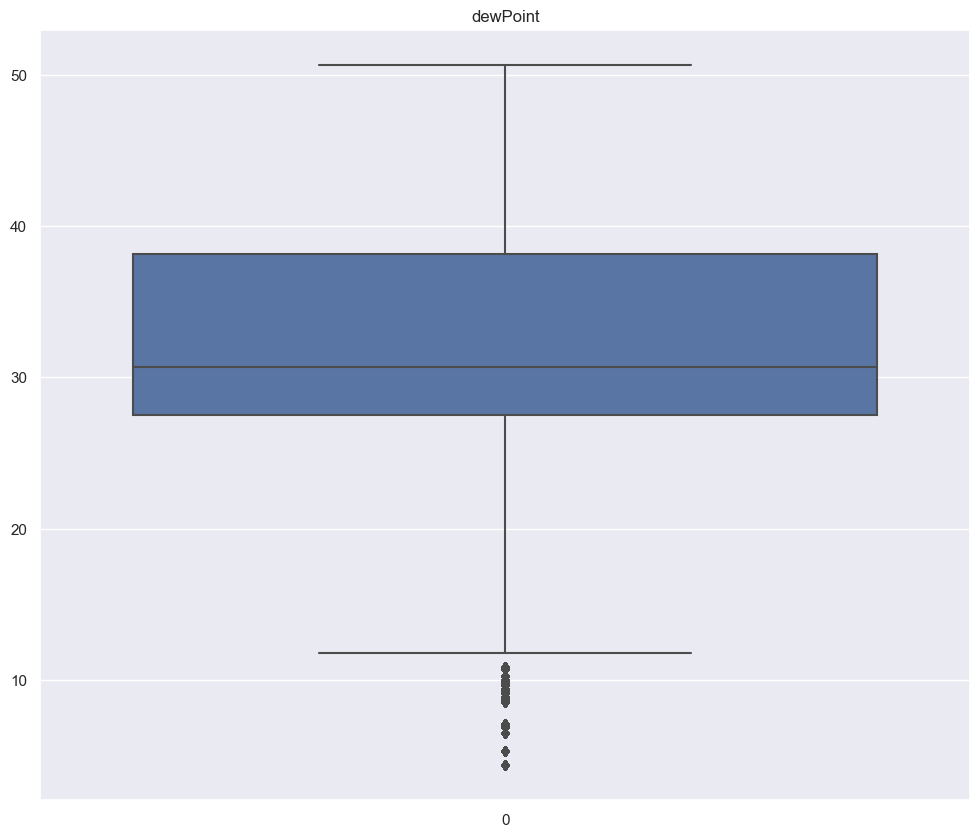

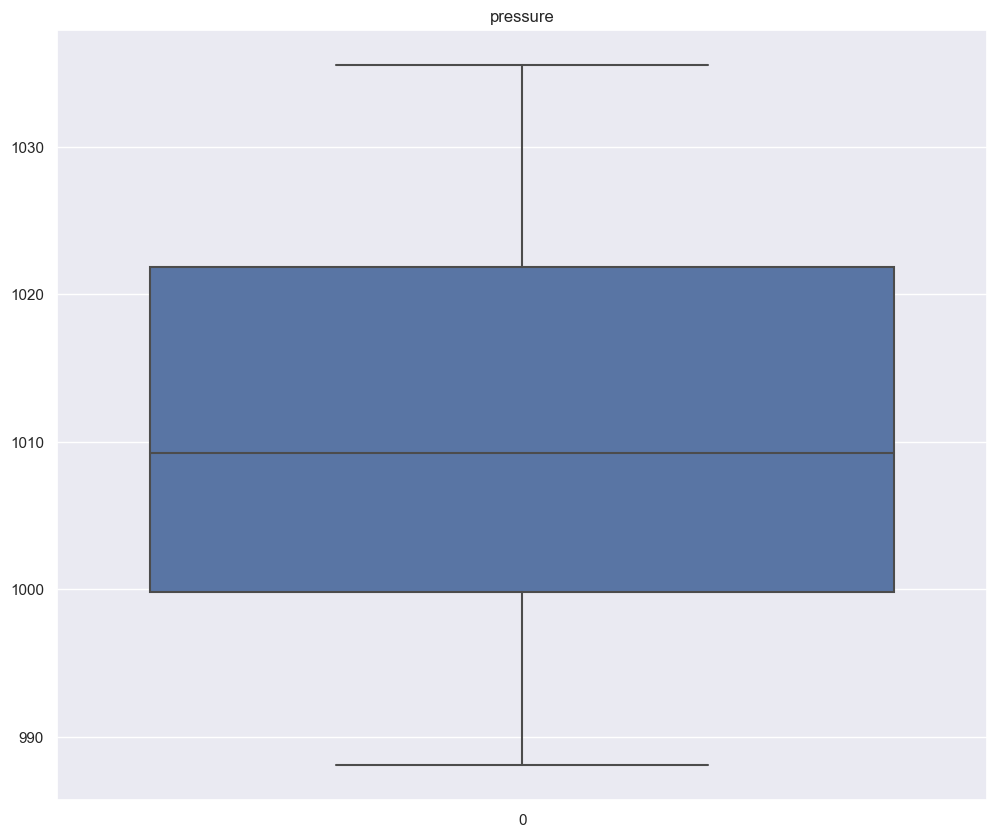

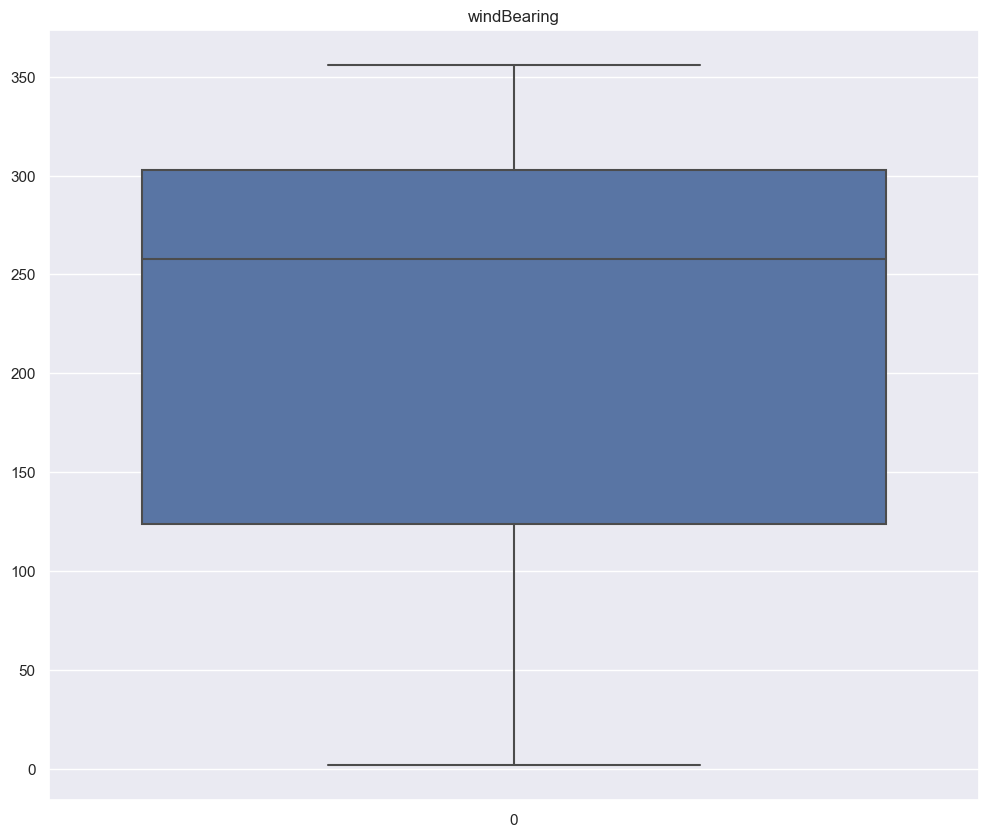

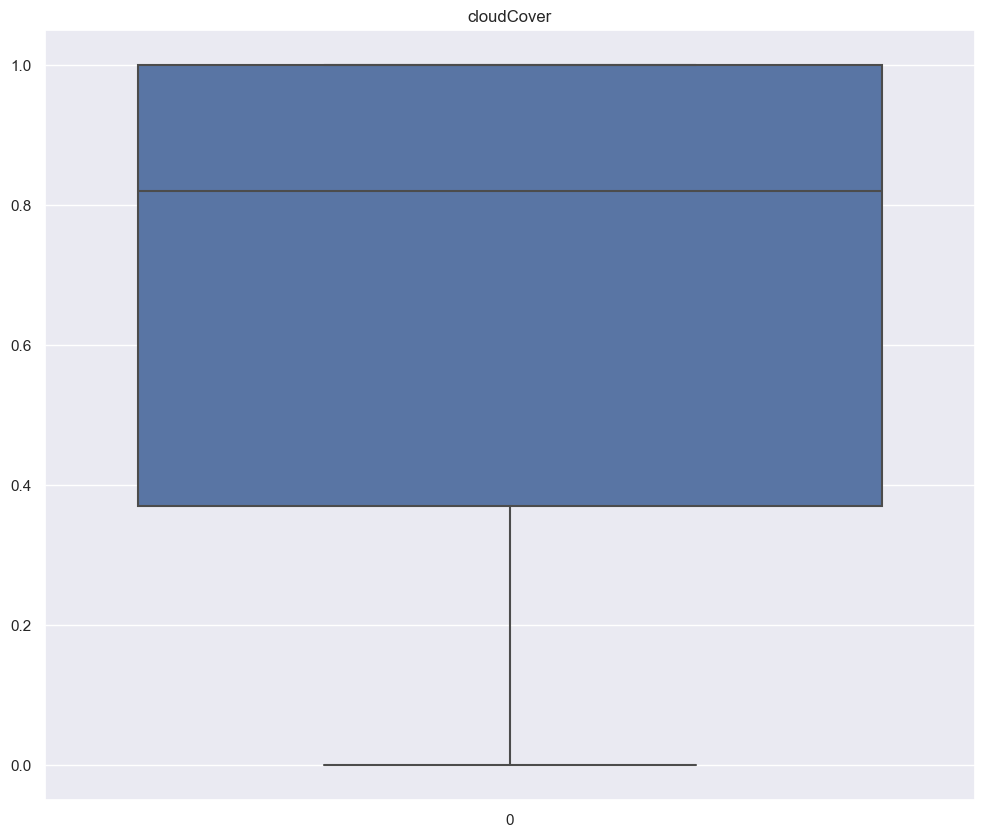

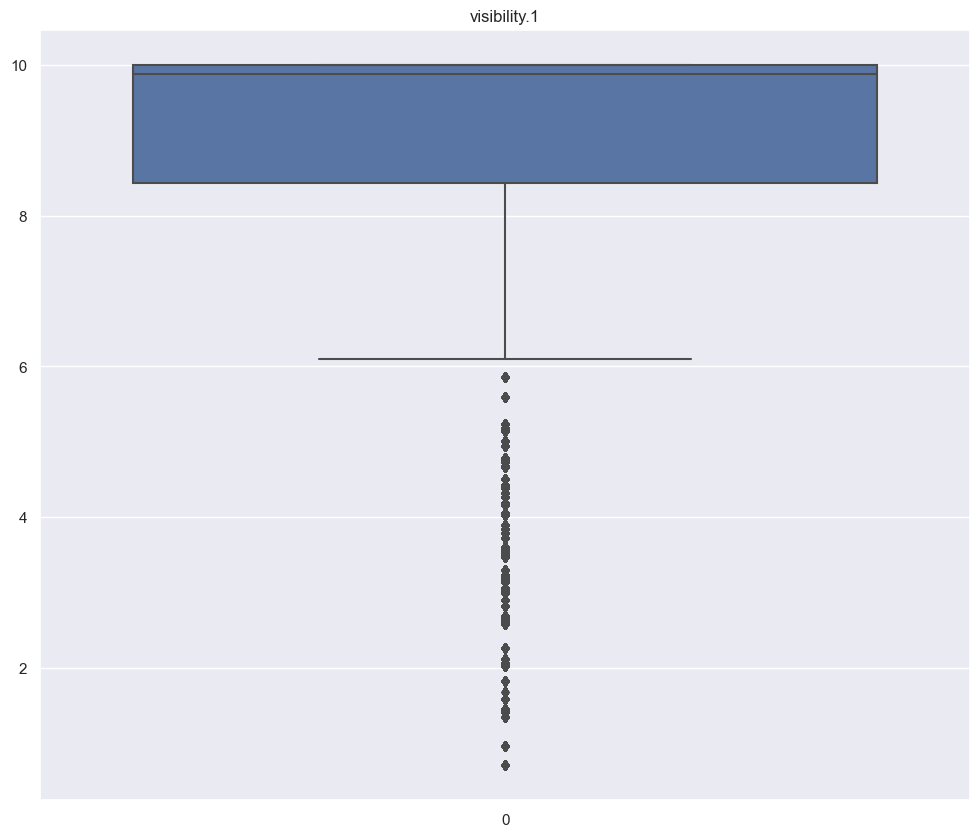

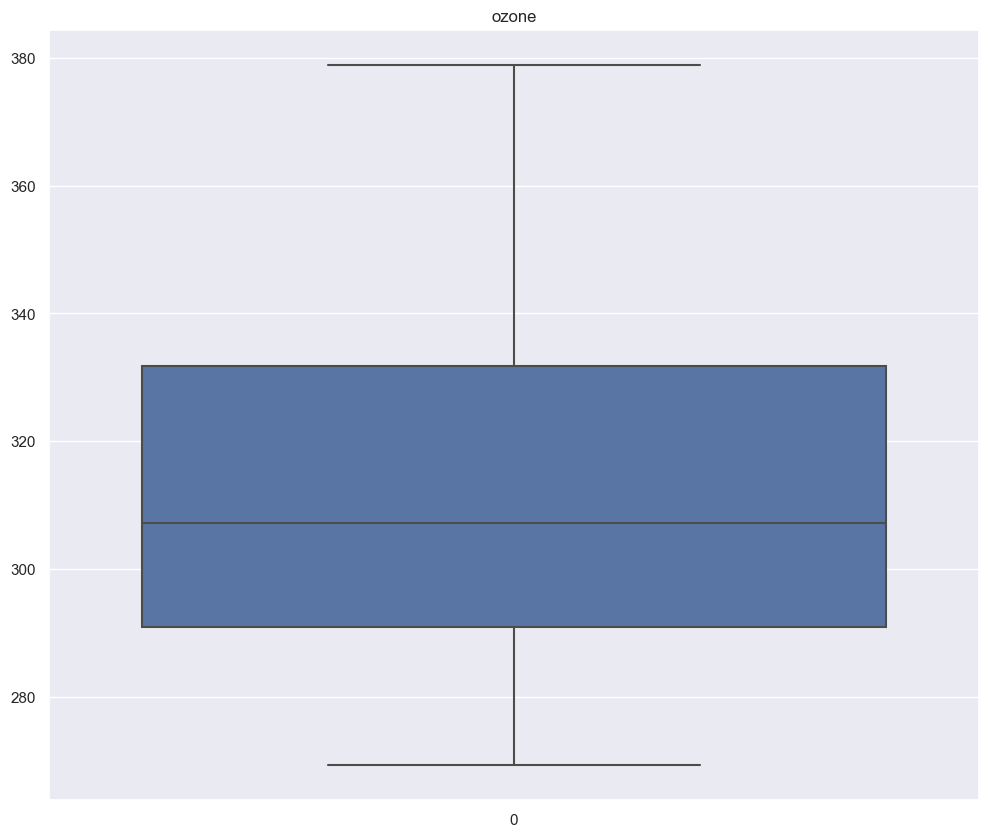

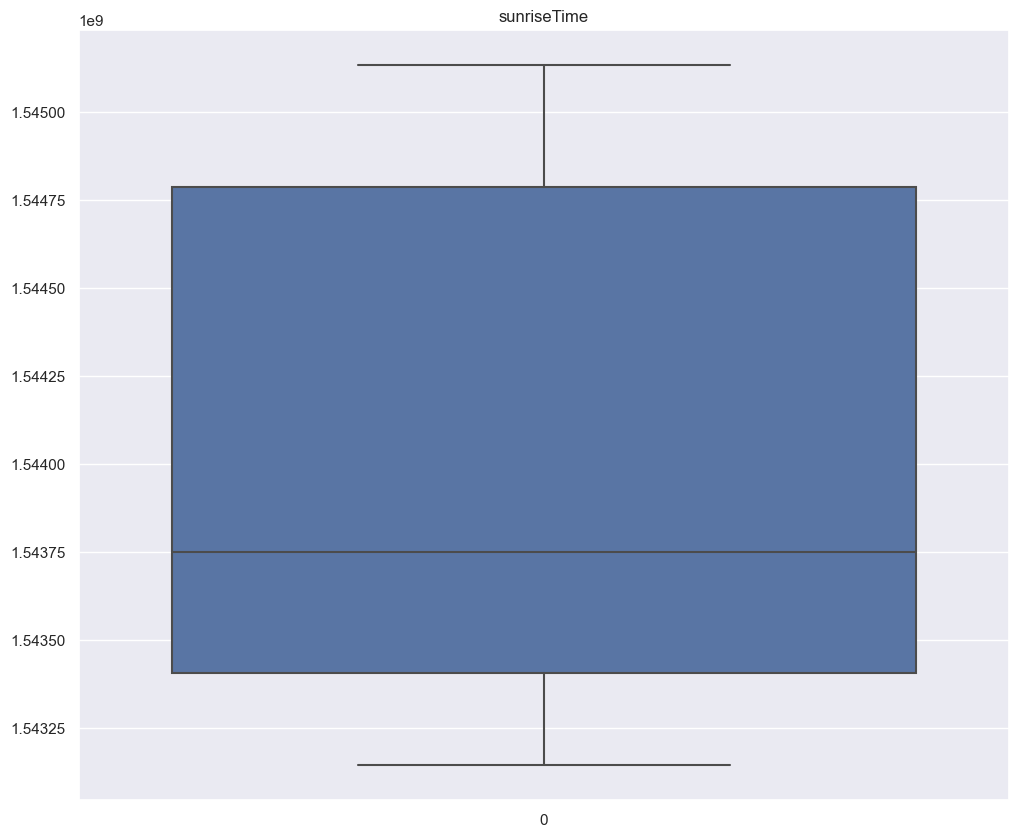

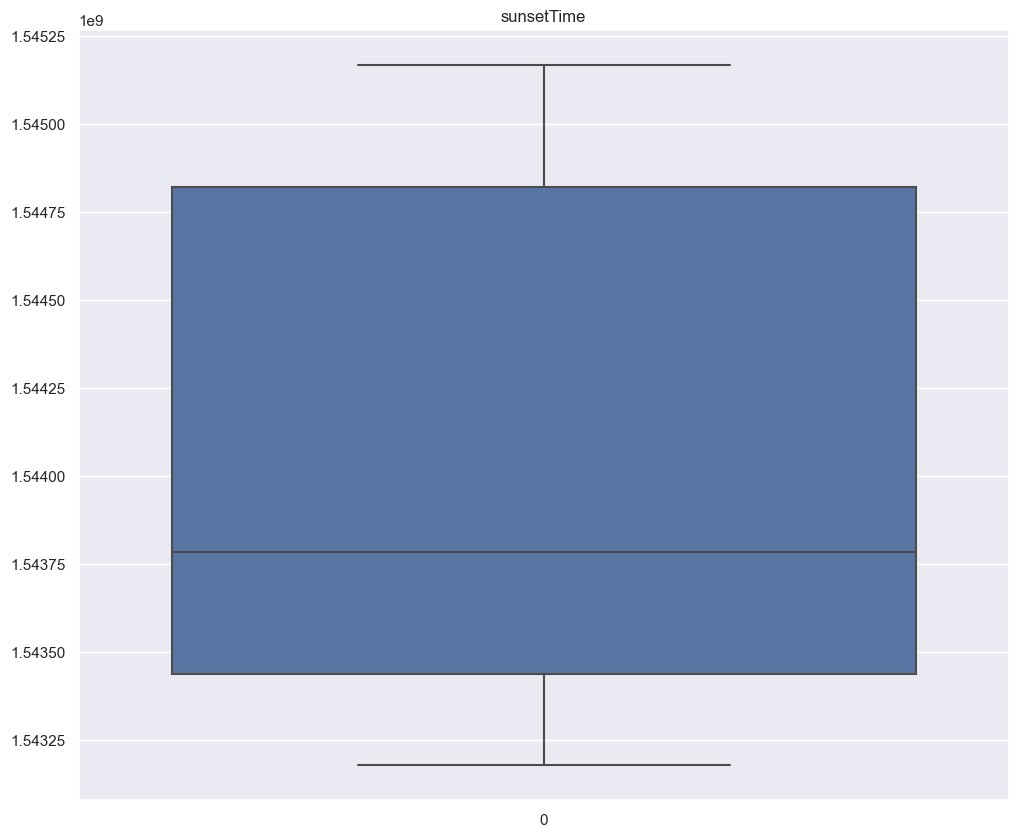

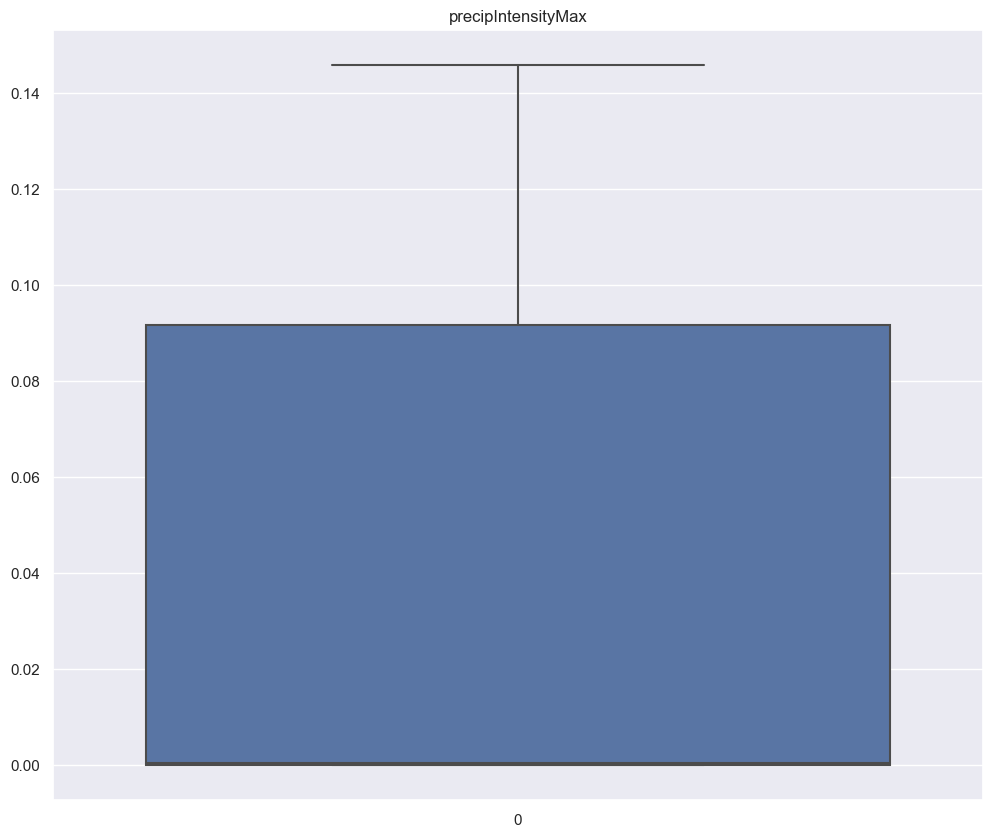

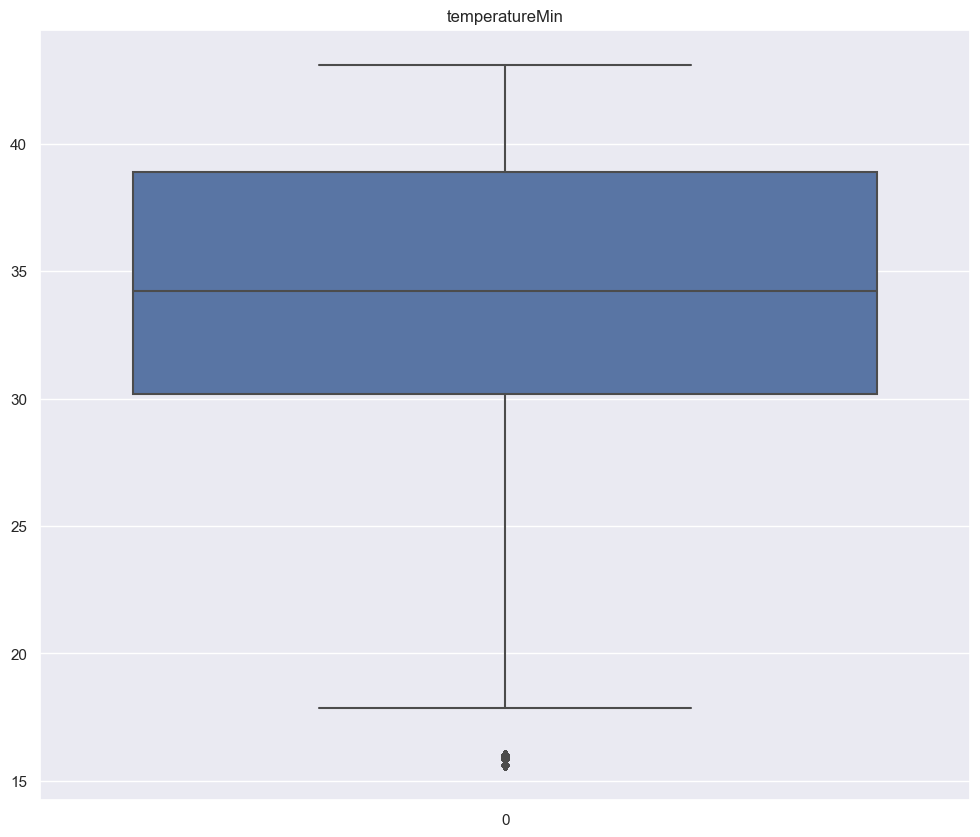

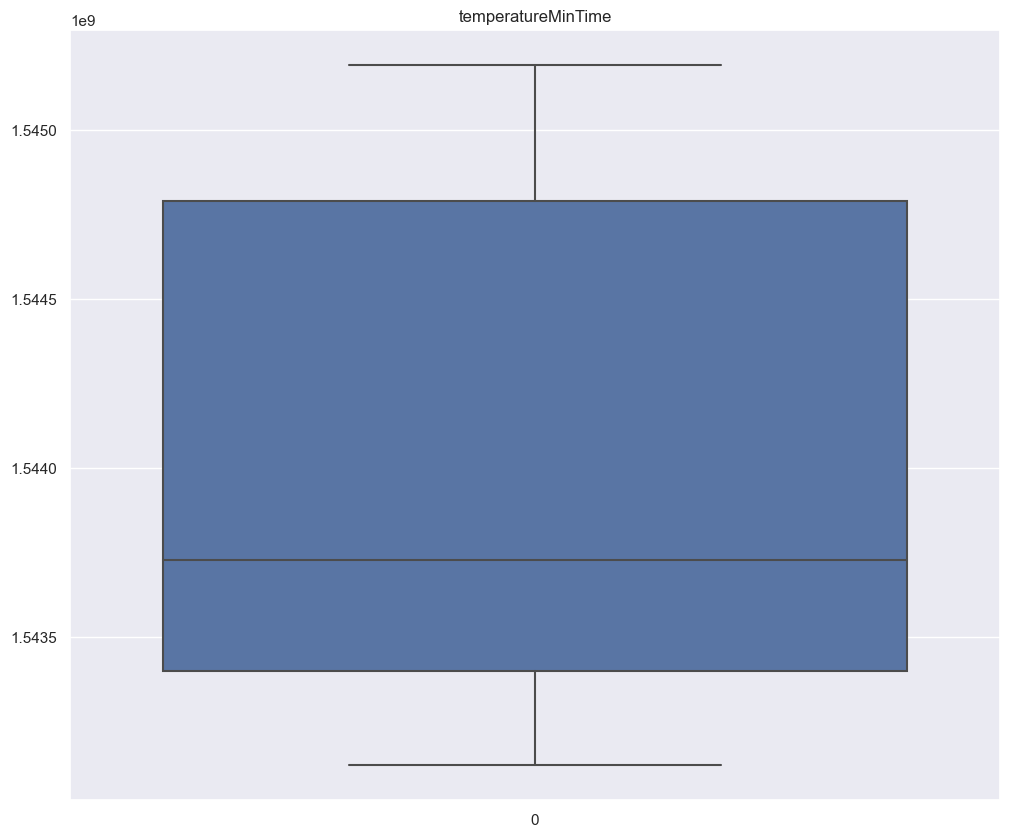

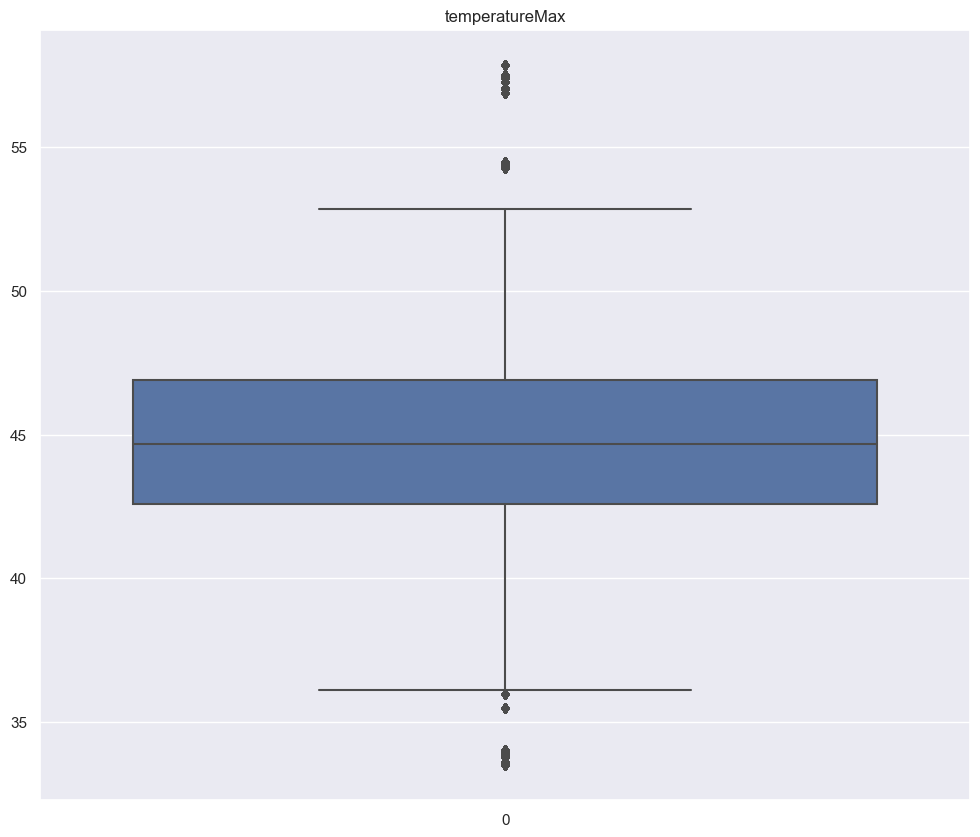

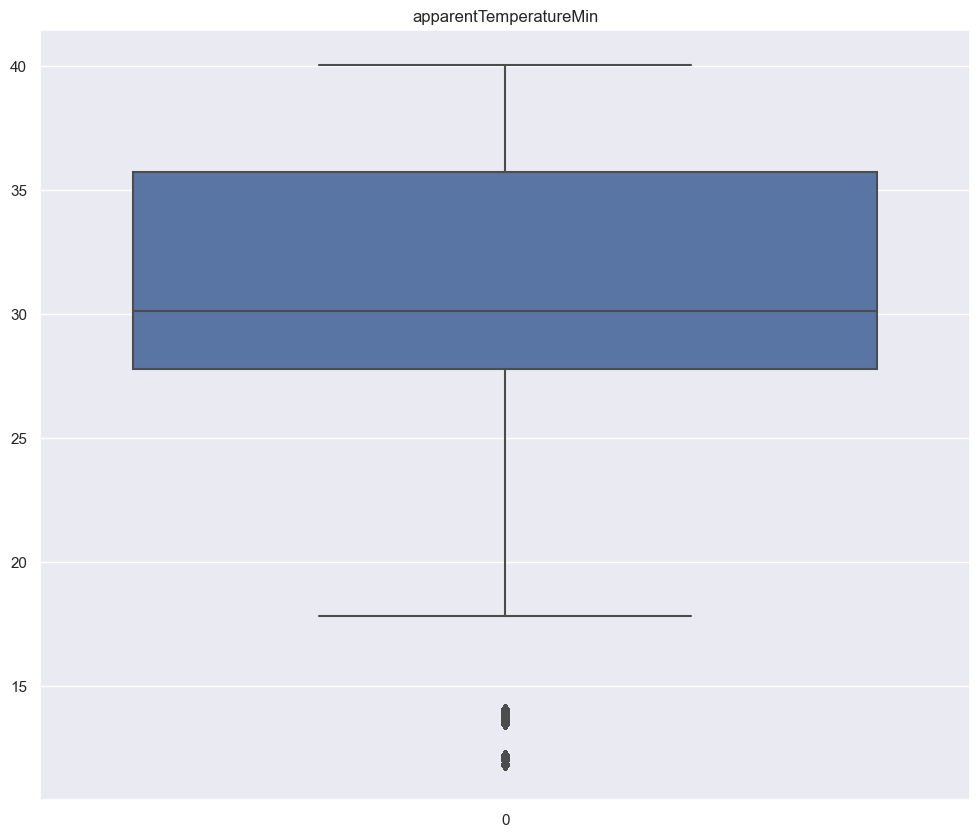

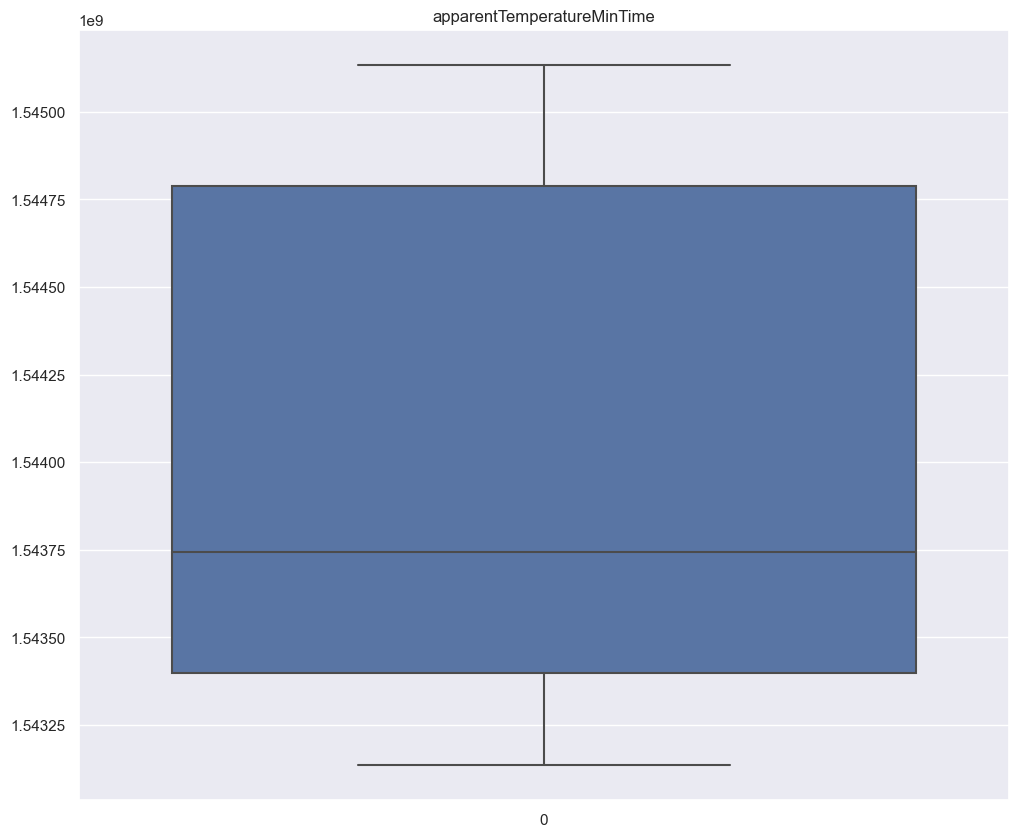

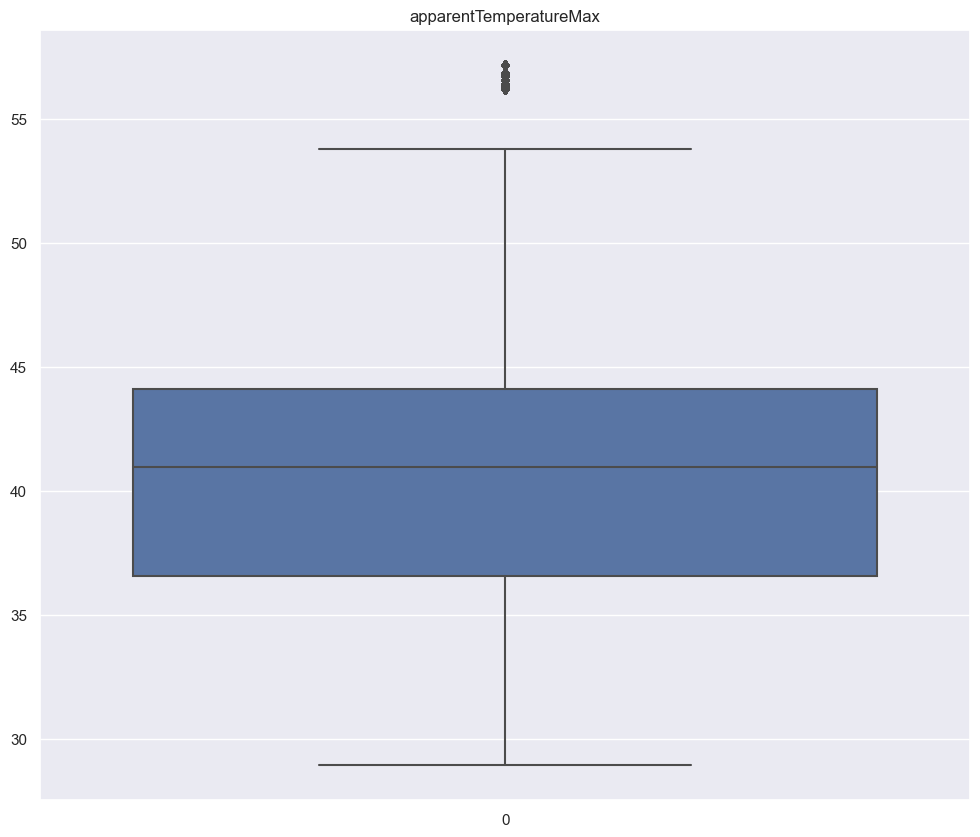

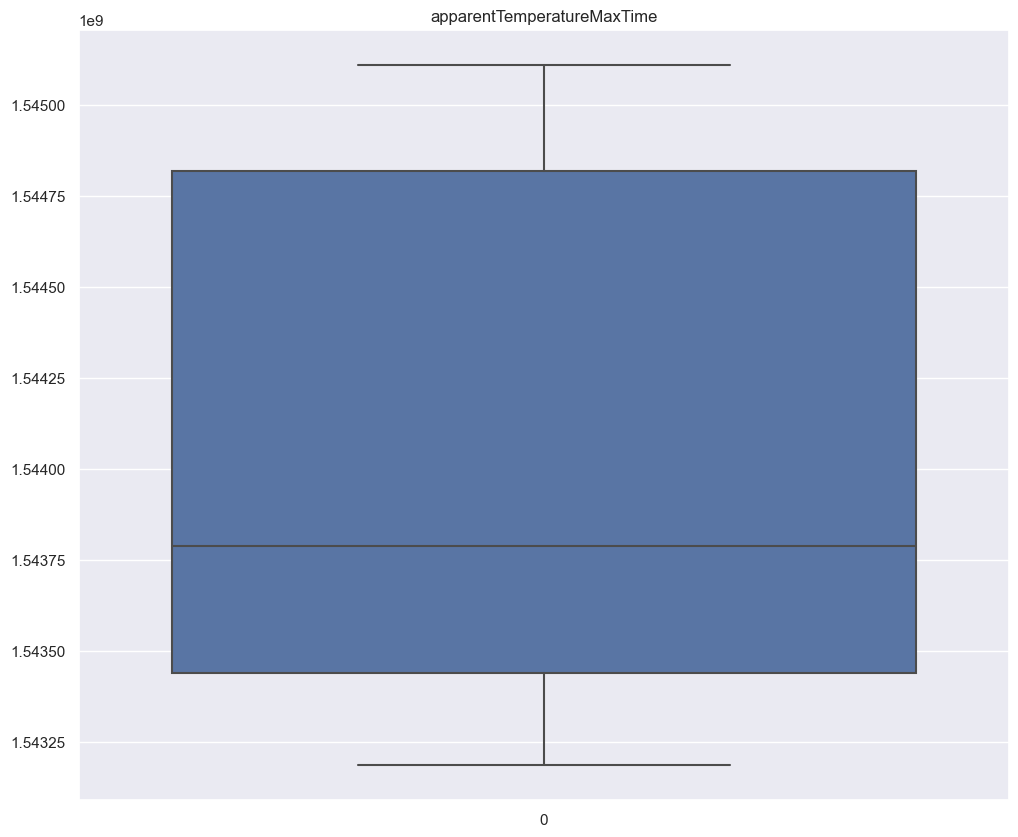

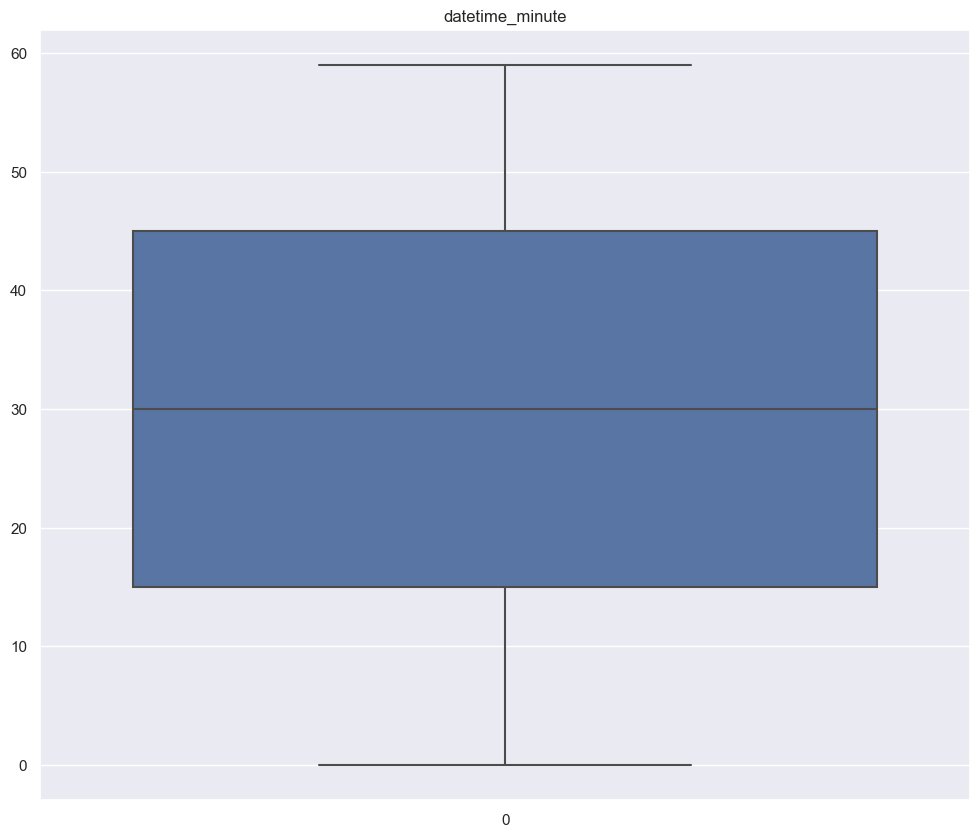

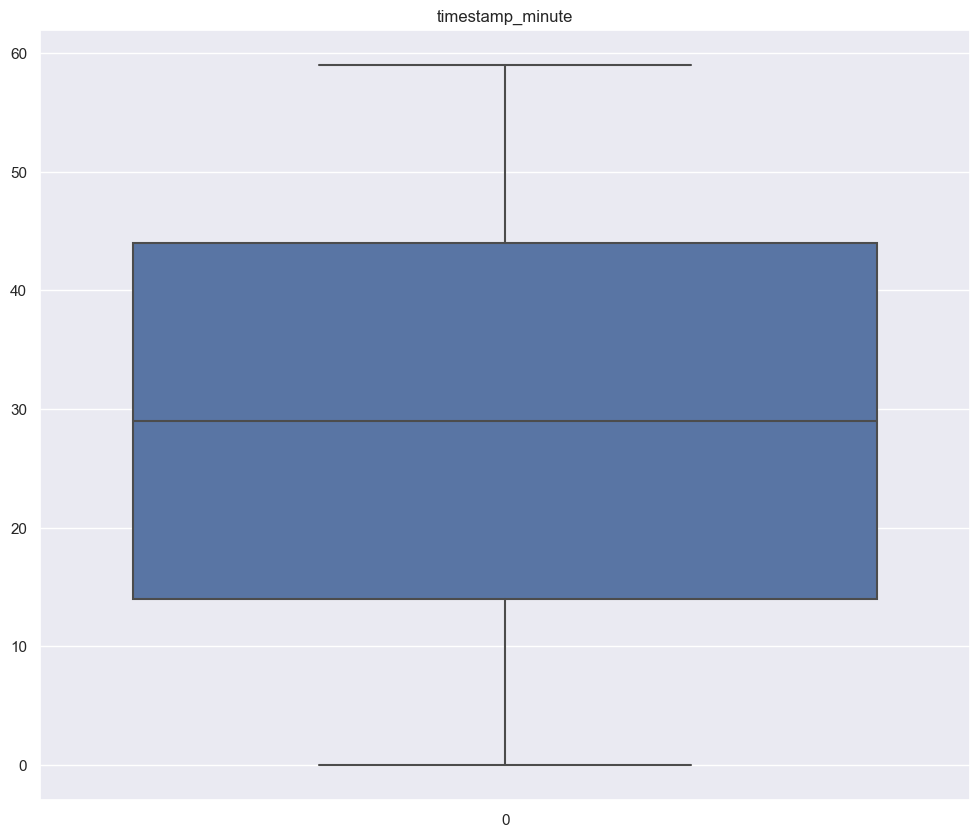

<Figure size 1200x1000 with 0 Axes>

In [25]:
for feature in continuous_feature:
    sns.boxplot(df_copy[feature])
    plt.title(feature)
    plt.figure(figsize=(12,10))


In [26]:
IQR=df_copy.distance.quantile(0.75)-df_copy.distance.quantile(0.25)
lower_bridge=df_copy.distance.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.distance.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.195 5.405


In [27]:
df_copy.loc[df_copy['distance']>=5.405,'distance']=5.405
df_copy.loc[df_copy['distance']<=-1.195,'distance']=-1.195

In [28]:
IQR=df_copy.temperature.quantile(0.75)-df_copy.temperature.quantile(0.25)
lower_bridge=df_copy.temperature.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.temperature.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

25.880000000000003 54.199999999999996


In [29]:
df_copy.loc[df_copy['temperature']>=54.199999999999996,'temperature']=54.199999999999996
df_copy.loc[df_copy['temperature']<=25.880000000000003,'temperature']=25.880000000000003

In [30]:
IQR=df_copy.apparentTemperature.quantile(0.75)-df_copy.apparentTemperature.quantile(0.25)
lower_bridge=df_copy.apparentTemperature.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.apparentTemperature.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

19.655 52.334999999999994


In [31]:
df_copy.loc[df_copy['apparentTemperature']>=52.334999999999994,'apparentTemperature']=52.334999999999994
df_copy.loc[df_copy['apparentTemperature']<=19.655,'apparentTemperature']=19.655

In [32]:
IQR=df_copy.windGust.quantile(0.75)-df_copy.windGust.quantile(0.25)
lower_bridge=df_copy.windGust.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.windGust.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-7.460000000000002 23.26


In [33]:
df_copy.loc[df_copy['windGust']>=23.26,'windGust']=23.26
df_copy.loc[df_copy['windGust']<=-7.460000000000002,'windGust']=-7.460000000000002

In [34]:
IQR=df_copy.visibility.quantile(0.75)-df_copy.visibility.quantile(0.25)
lower_bridge=df_copy.visibility.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.visibility.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.086 12.342


In [35]:
df_copy.loc[df_copy['visibility']>=12.342,'visibility']=12.342
df_copy.loc[df_copy['visibility']<=6.086,'visibility']=6.086

In [36]:
df_copy['precipIntensity'].unique()

array([0.    , 0.1299, 0.0246, 0.0624, 0.0567, 0.0036, 0.007 , 0.1088,
       0.0341, 0.0308, 0.0094, 0.0013, 0.0053, 0.002 , 0.1264, 0.0216,
       0.005 , 0.008 , 0.0288, 0.0488, 0.0074, 0.0017, 0.0023, 0.0274,
       0.0015, 0.0031, 0.0923, 0.092 , 0.0187, 0.0006, 0.1267, 0.1289,
       0.0005, 0.0016, 0.0003, 0.0024, 0.1058, 0.0255, 0.0021, 0.0121,
       0.0071, 0.1447, 0.0813, 0.0674, 0.0342, 0.0025, 0.0012, 0.0801,
       0.0049, 0.0772, 0.0737, 0.001 , 0.0591, 0.0089, 0.0002, 0.0832,
       0.0462, 0.0057, 0.0701, 0.0786, 0.0092, 0.0009, 0.1044])

In [37]:
df_copy['precipProbability'].unique()

array([0.  , 1.  , 0.94, 0.29, 0.61, 0.66, 0.02, 0.57, 0.1 , 0.46, 0.59,
       0.32, 0.86, 0.11, 0.16, 0.42, 0.09, 0.03, 0.47, 0.15, 0.74, 0.56,
       0.17, 0.14, 0.18, 0.12, 0.85, 0.07, 0.99])

In [38]:
IQR=df_copy.temperatureHigh.quantile(0.75)-df_copy.temperatureHigh.quantile(0.25)
lower_bridge=df_copy.temperatureHigh.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.temperatureHigh.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

36.06 53.41999999999999


In [39]:
df_copy.loc[df_copy['temperatureHigh']>=53.41999999999999,'temperatureHigh']=53.41999999999999
df_copy.loc[df_copy['temperatureHigh']<=36.06,'temperatureHigh']=36.06

In [40]:
IQR=df_copy.apparentTemperatureHigh.quantile(0.75)-df_copy.apparentTemperatureHigh.quantile(0.25)
lower_bridge=df_copy.apparentTemperatureHigh.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.apparentTemperatureHigh.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

25.245000000000005 55.44499999999999


In [41]:
df_copy.loc[df_copy['apparentTemperatureHigh']>=55.44499999999999,'apparentTemperatureHigh']=55.44499999999999
df_copy.loc[df_copy['apparentTemperatureHigh']<=25.245000000000005,'apparentTemperatureHigh']=25.245000000000005

In [42]:
IQR=df_copy.apparentTemperatureLow.quantile(0.75)-df_copy.apparentTemperatureLow.quantile(0.25)
lower_bridge=df_copy.apparentTemperatureLow.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.apparentTemperatureLow.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)


16.269999999999996 46.75


In [43]:
df_copy.loc[df_copy['apparentTemperatureLow']>=46.75,'apparentTemperatureLow']=46.75
df_copy.loc[df_copy['apparentTemperatureLow']<=16.269999999999996,'apparentTemperatureLow']=16.269999999999996

In [44]:
IQR=df_copy.dewPoint.quantile(0.75)-df_copy.dewPoint.quantile(0.25)
lower_bridge=df_copy.dewPoint.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.dewPoint.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

11.514999999999995 54.115


In [45]:
df_copy.loc[df_copy['dewPoint']>=54.115,'dewPoint']=54.115
df_copy.loc[df_copy['dewPoint']<=11.5149,'dewPoint']=11.5149

In [46]:
IQR=df_copy.temperatureMin.quantile(0.75)-df_copy.temperatureMin.quantile(0.25)
lower_bridge=df_copy.temperatureMin.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.temperatureMin.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

17.105 51.94500000000001


In [47]:
df_copy.loc[df_copy['temperatureMin']>=51.945,'temperatureMin']=51.945
df_copy.loc[df_copy['temperatureMin']<=17.105,'temperatureMin']=17.105

In [48]:
IQR=df_copy.temperatureMax.quantile(0.75)-df_copy.temperatureMax.quantile(0.25)
lower_bridge=df_copy.temperatureMax.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.temperatureMax.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

36.06 53.41999999999999


In [49]:
df_copy.loc[df_copy['temperatureMax']>=53.419,'temperatureMax']=53.419
df_copy.loc[df_copy['temperatureMax']<=36.06,'temperatureMax']=36.06

In [50]:
IQR=df_copy.apparentTemperatureMin.quantile(0.75)-df_copy.apparentTemperatureMin.quantile(0.25)
lower_bridge=df_copy.apparentTemperatureMin.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.apparentTemperatureMin.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

15.835000000000003 47.635


In [51]:
df_copy.loc[df_copy['apparentTemperatureMin']>=47.635,'apparentTemperatureMin']=47.635
df_copy.loc[df_copy['apparentTemperatureMin']<=15.835,'apparentTemperatureMin']=15.835

In [52]:
IQR=df_copy.apparentTemperatureMax.quantile(0.75)-df_copy.apparentTemperatureMax.quantile(0.25)
lower_bridge=df_copy.apparentTemperatureMax.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.apparentTemperatureMax.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

25.245000000000005 55.44499999999999


In [53]:
df_copy.loc[df_copy['apparentTemperatureMax']>=55.444,'apparentTemperatureMax']=55.444
df_copy.loc[df_copy['apparentTemperatureMax']<=25.245,'apparentTemperatureMax']=25.245

In [54]:
IQR=df_copy.price.quantile(0.75)-df_copy.price.quantile(0.25)
lower_bridge=df_copy.price.quantile(0.25)-(IQR*1.5)
upper_bridge=df_copy.price.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.25 42.75


In [55]:
outliers = df_copy.price[(df_copy.price < lower_bridge) | (df_copy.price > upper_bridge)]

In [56]:
len(outliers)

5585

In [57]:
df_copy.loc[df_copy['price']>=42.75,'price']=42.75
df_copy.loc[df_copy['price']<=-11.25,'price']=-11.25

C:\Users\Asus\AppData\Local\Temp\ipykernel_21352\2625018926.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,10))


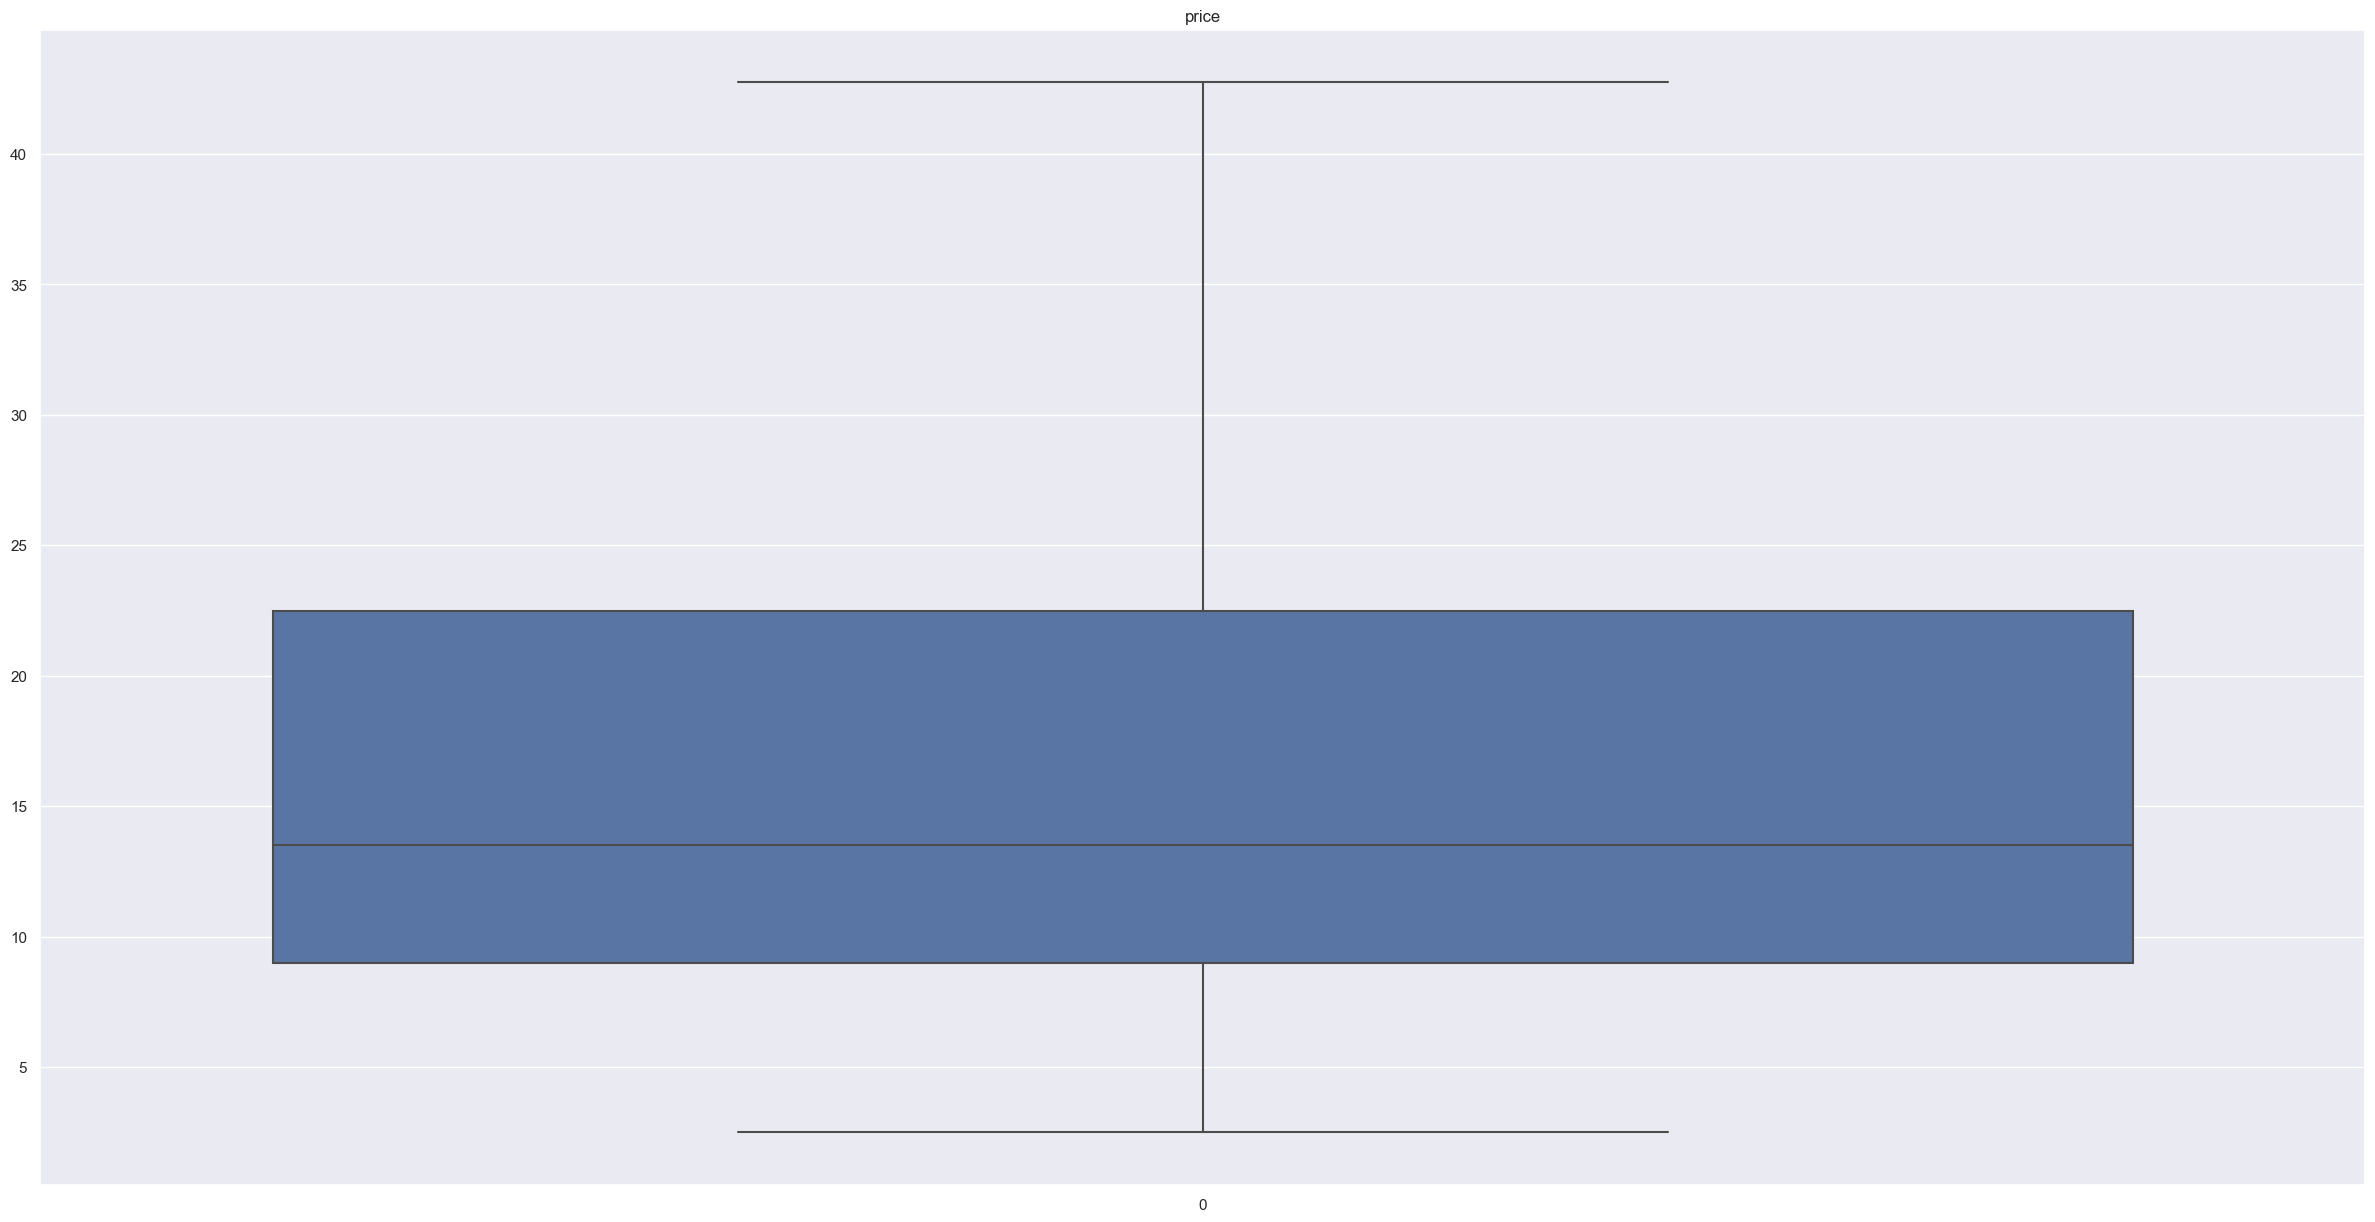

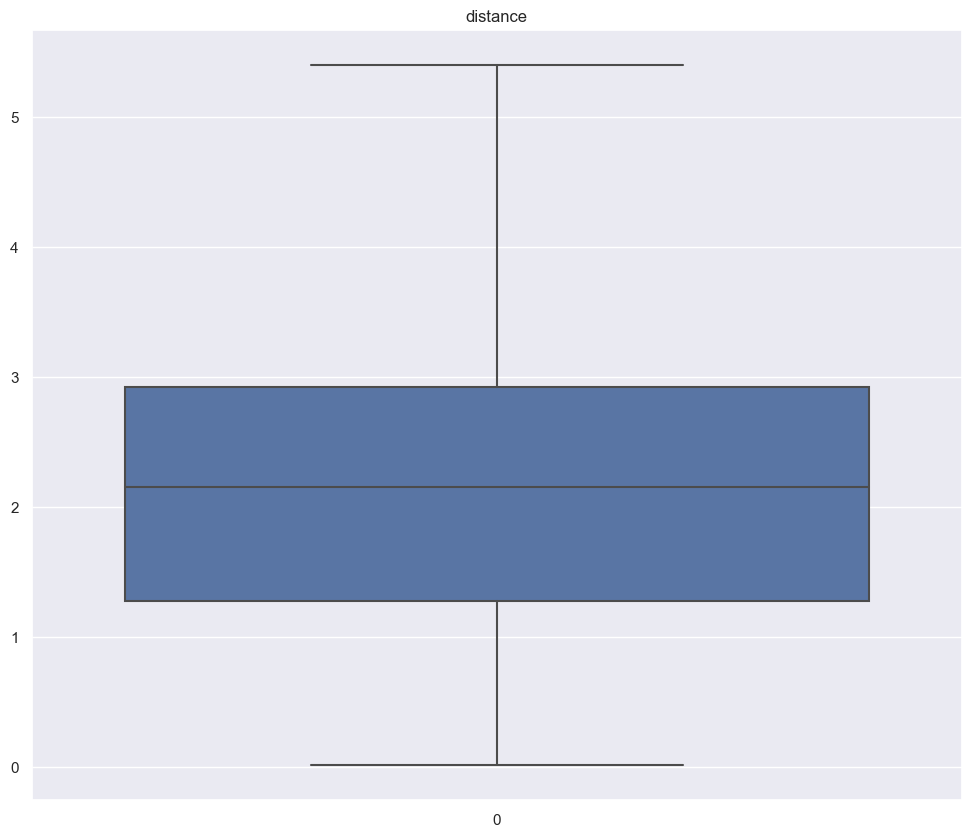

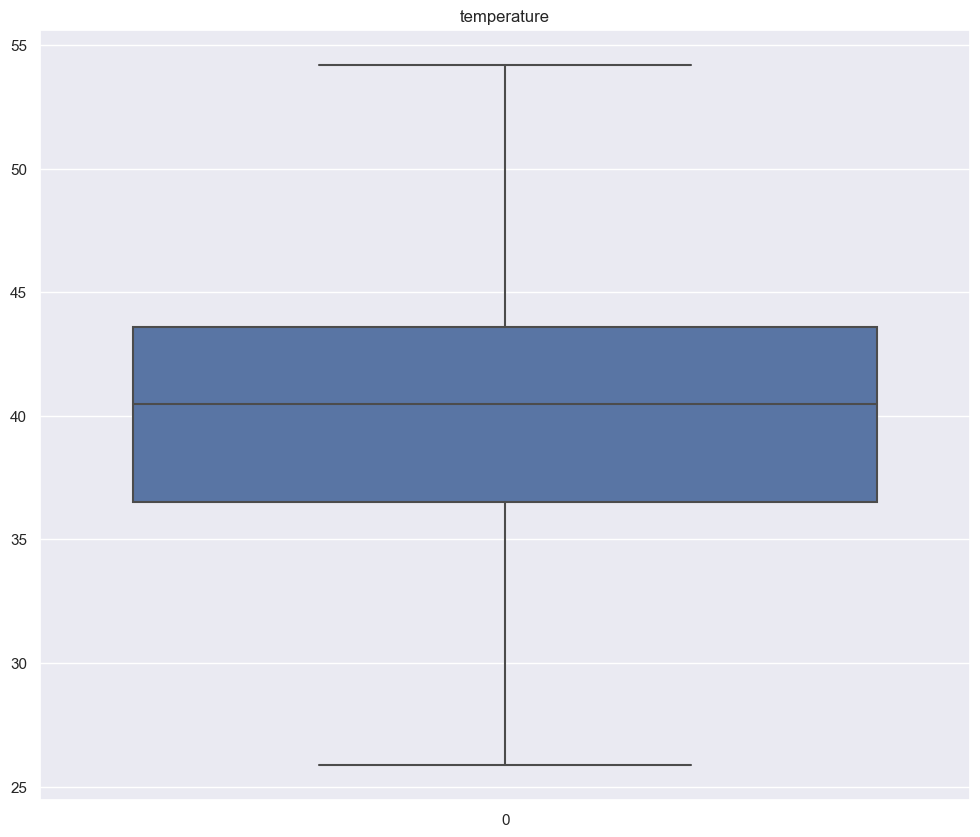

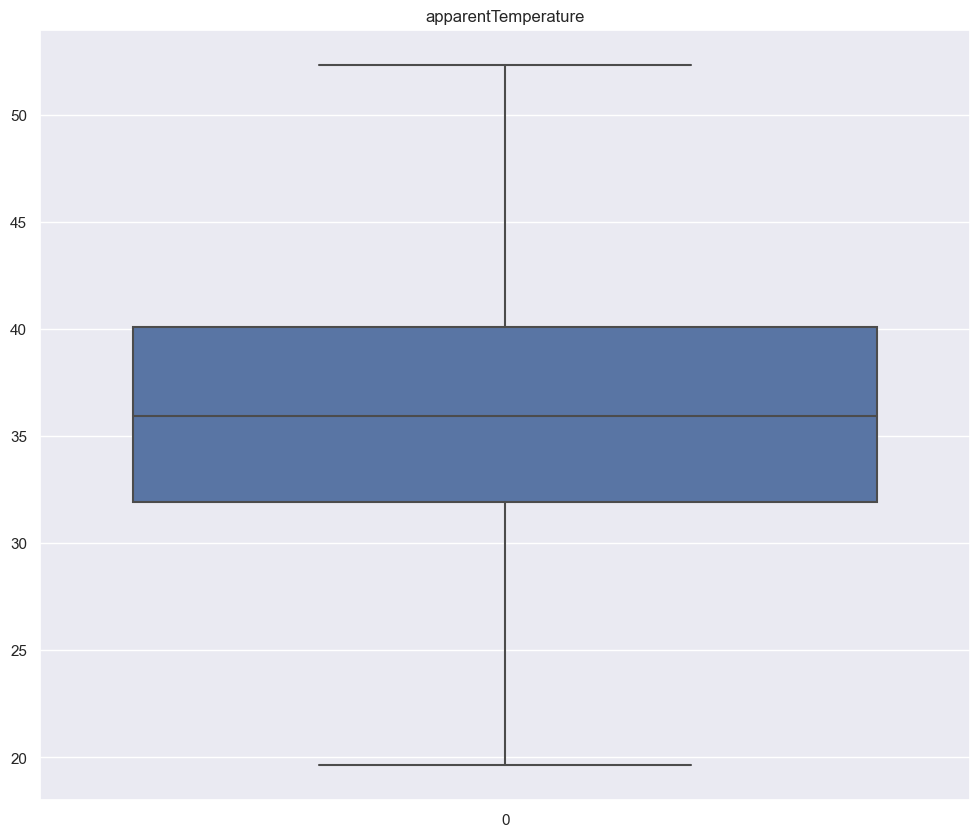

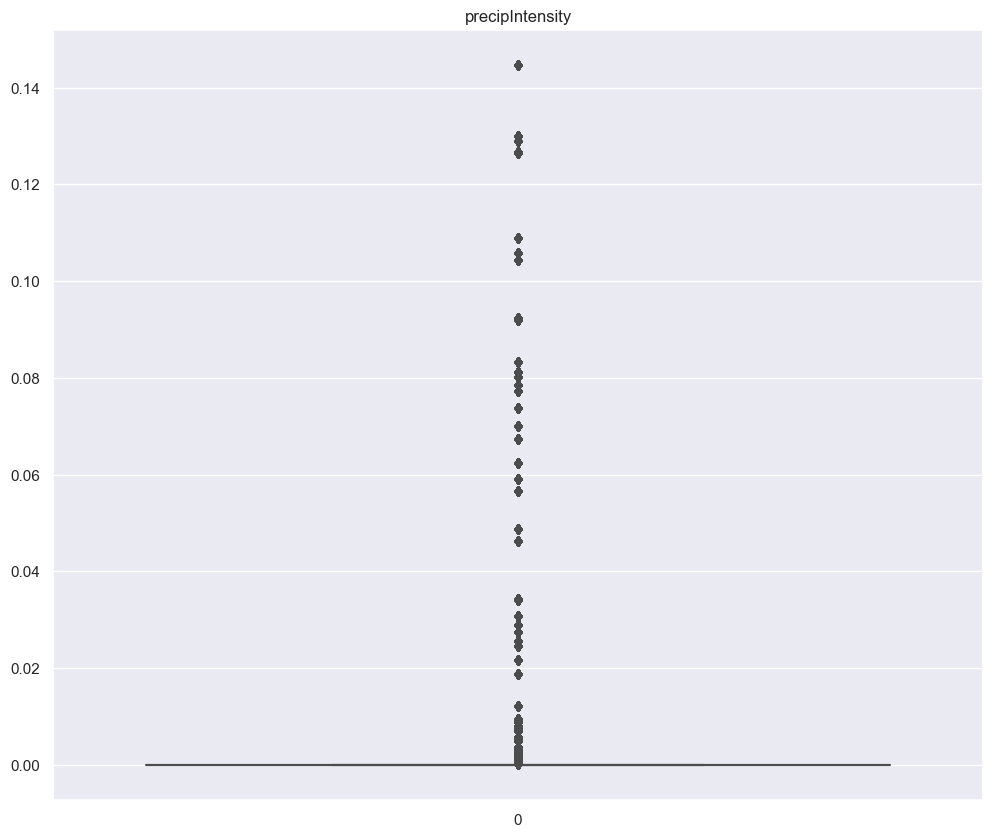

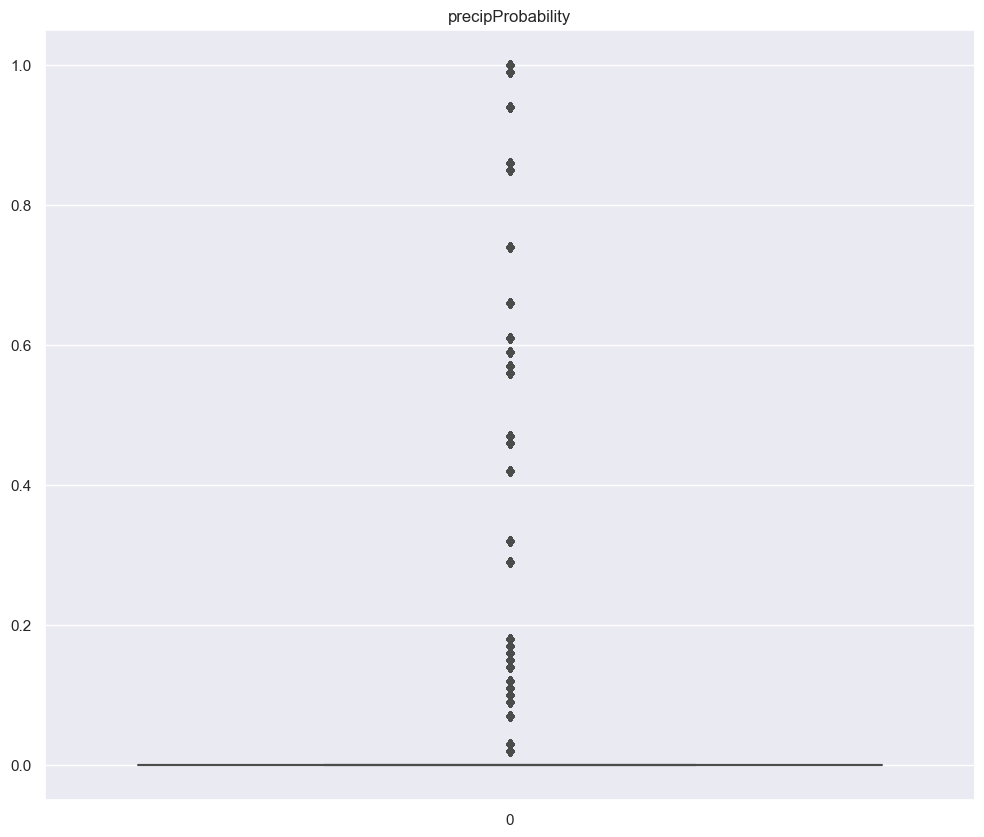

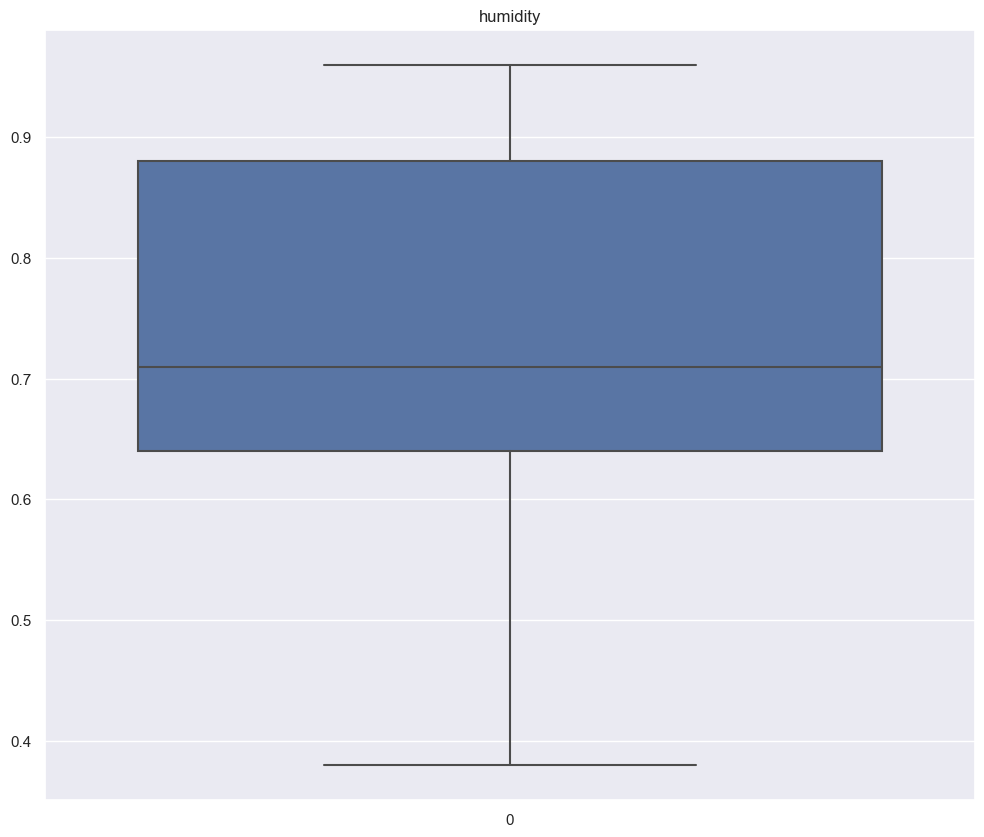

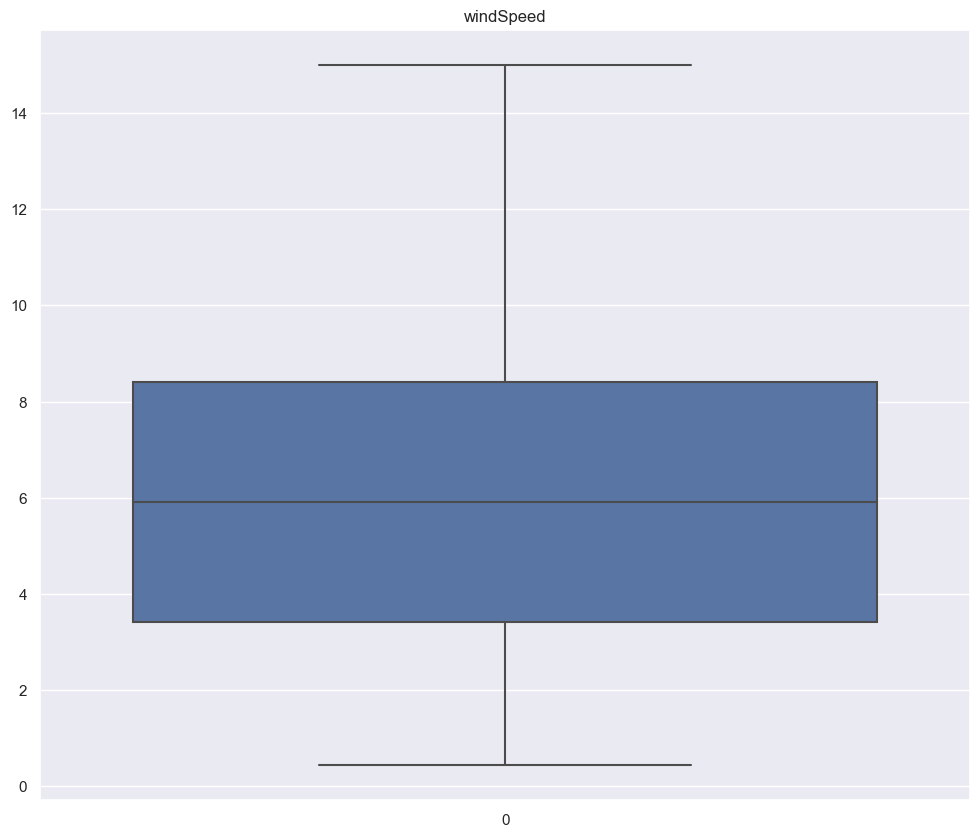

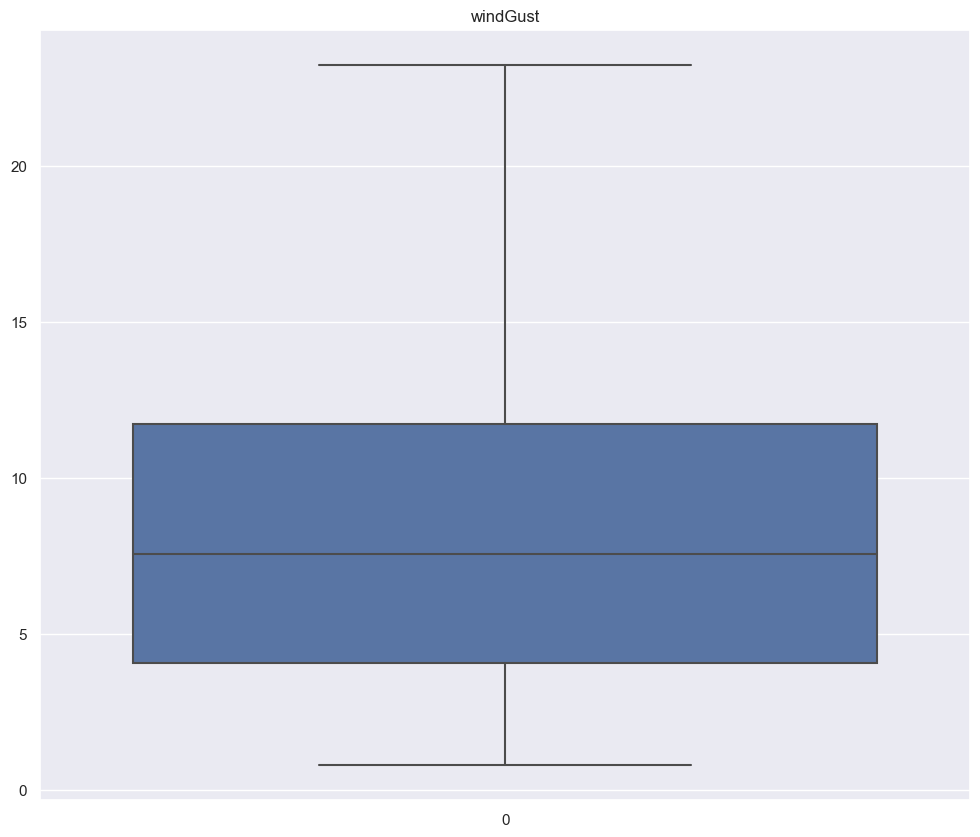

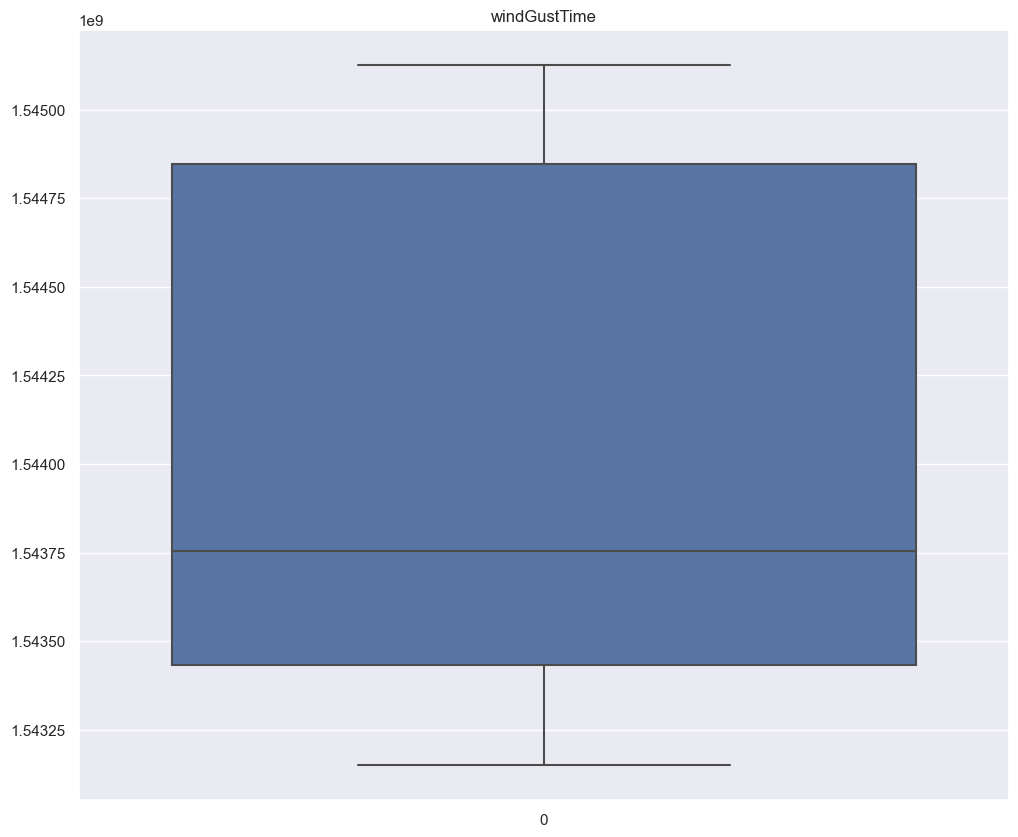

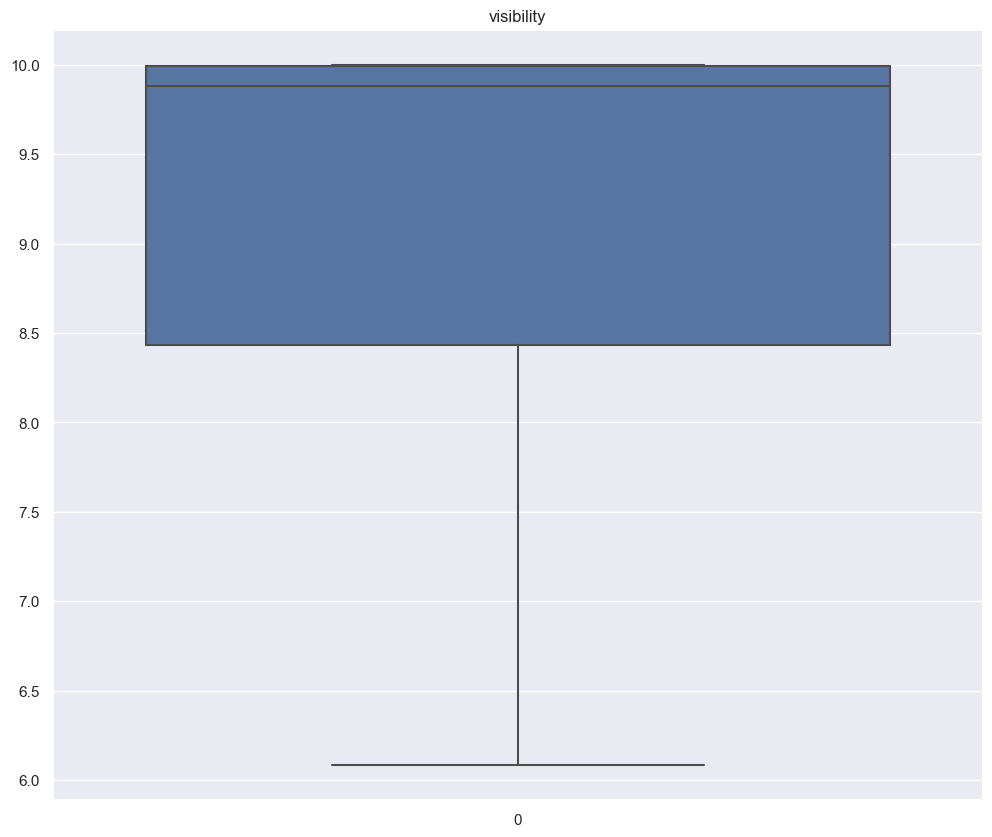

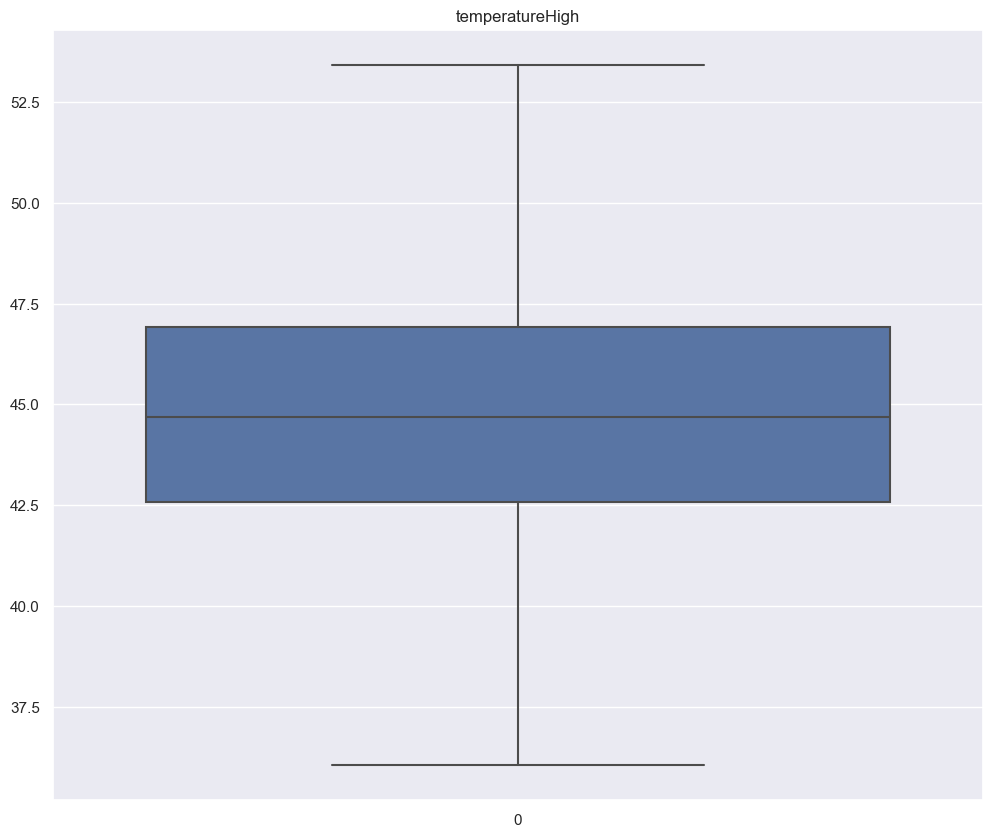

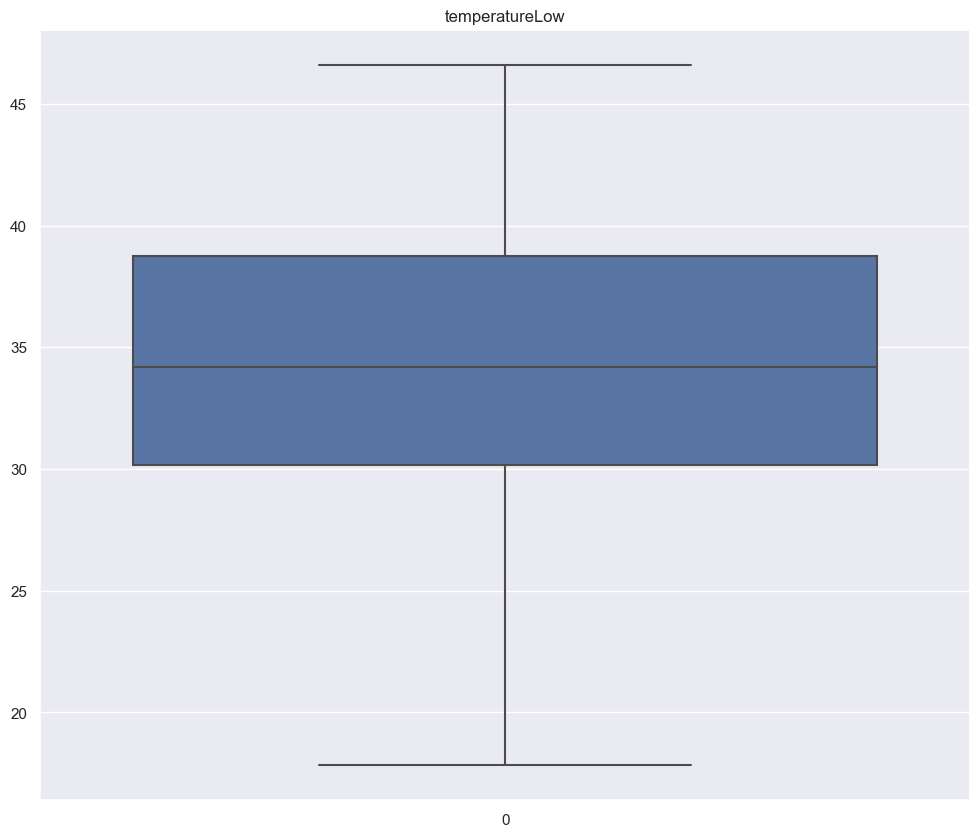

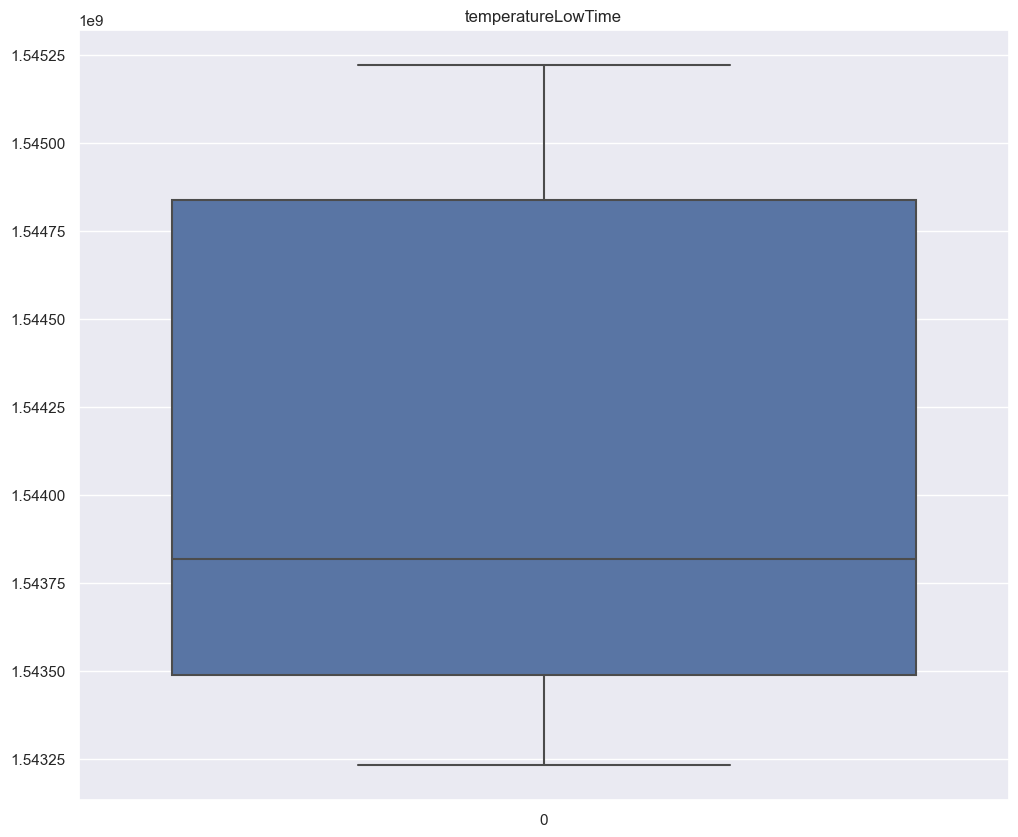

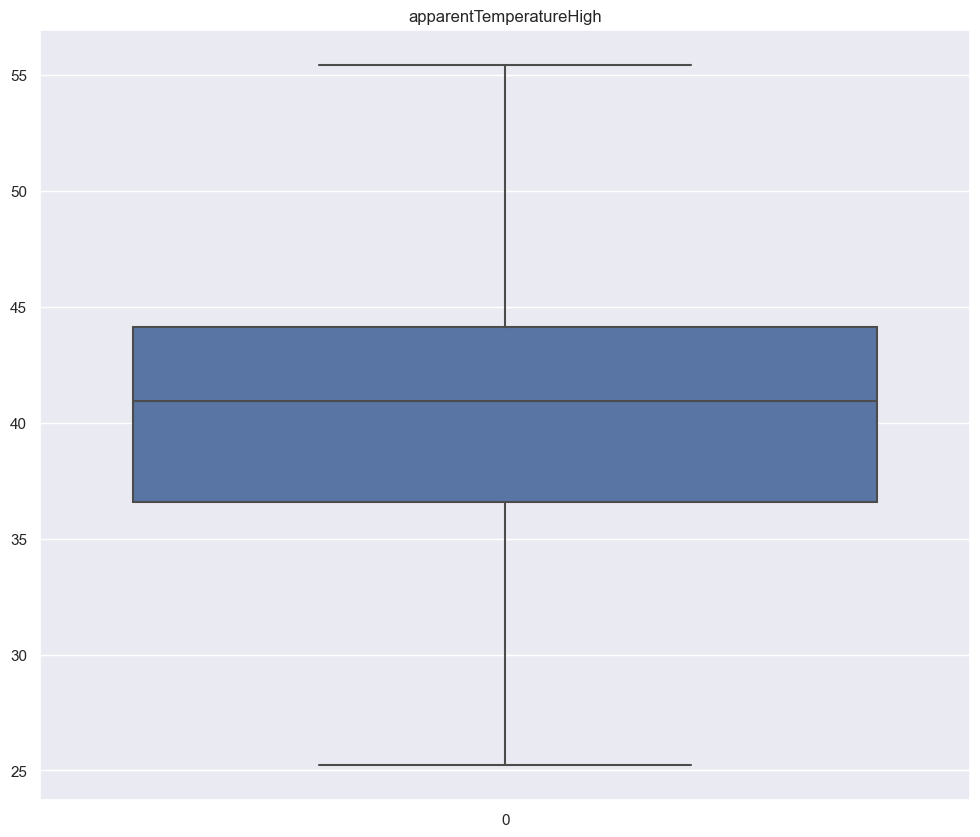

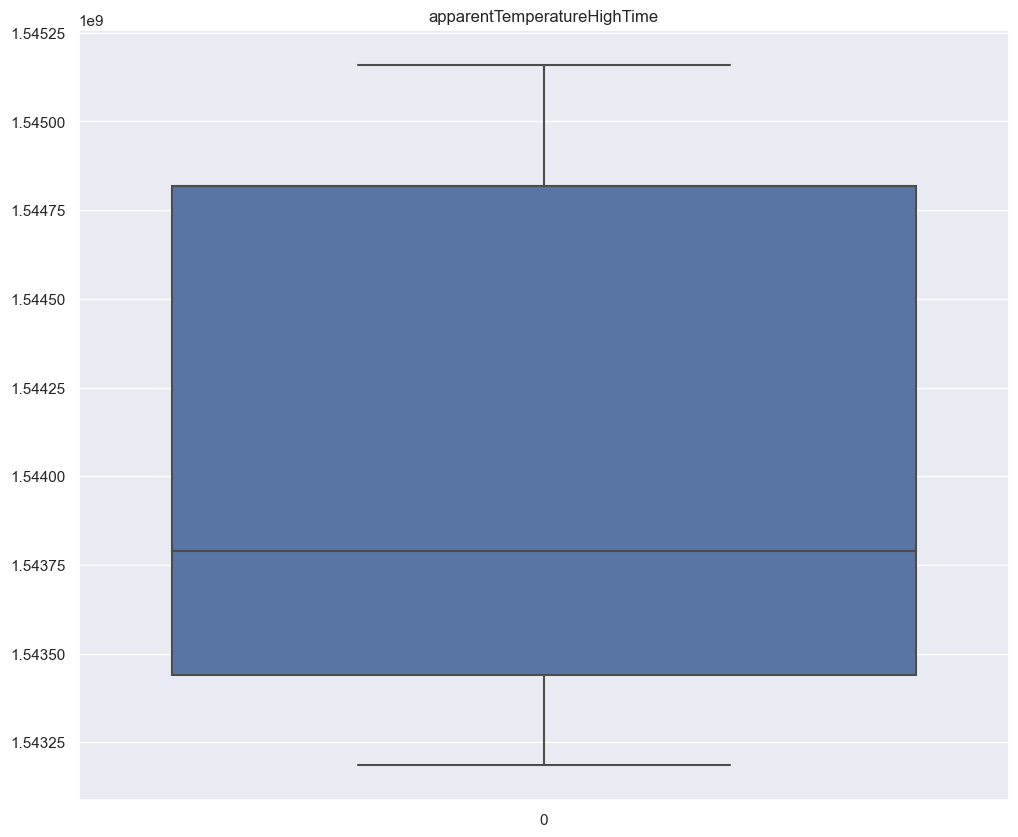

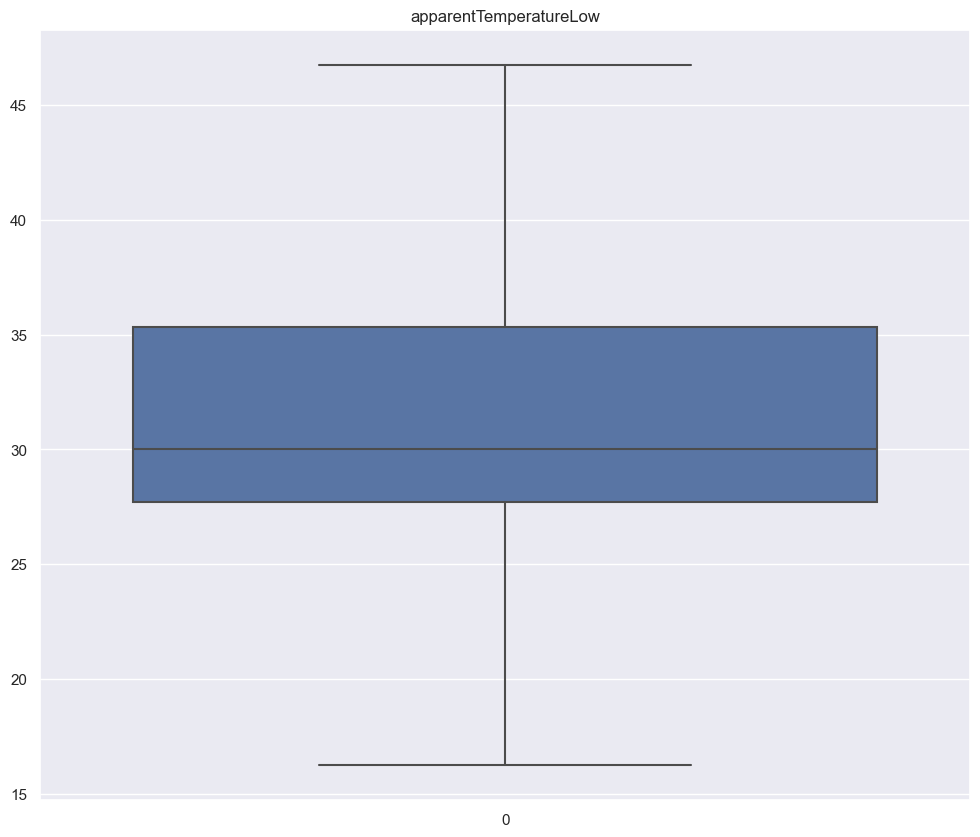

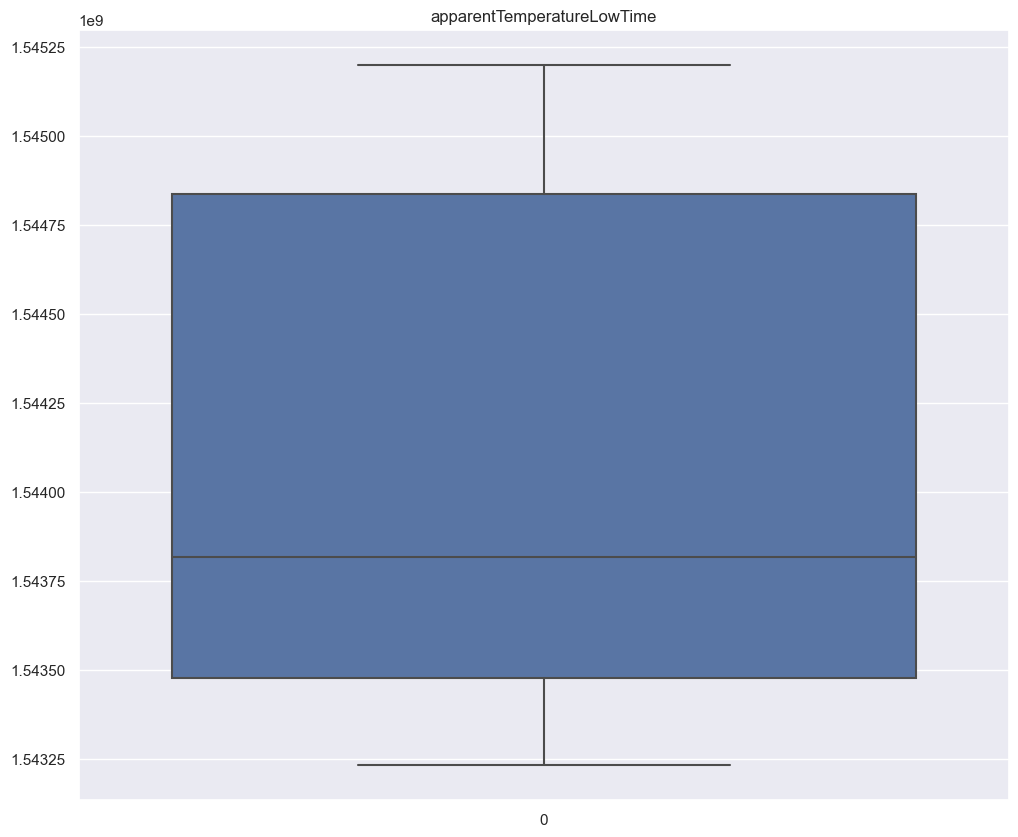

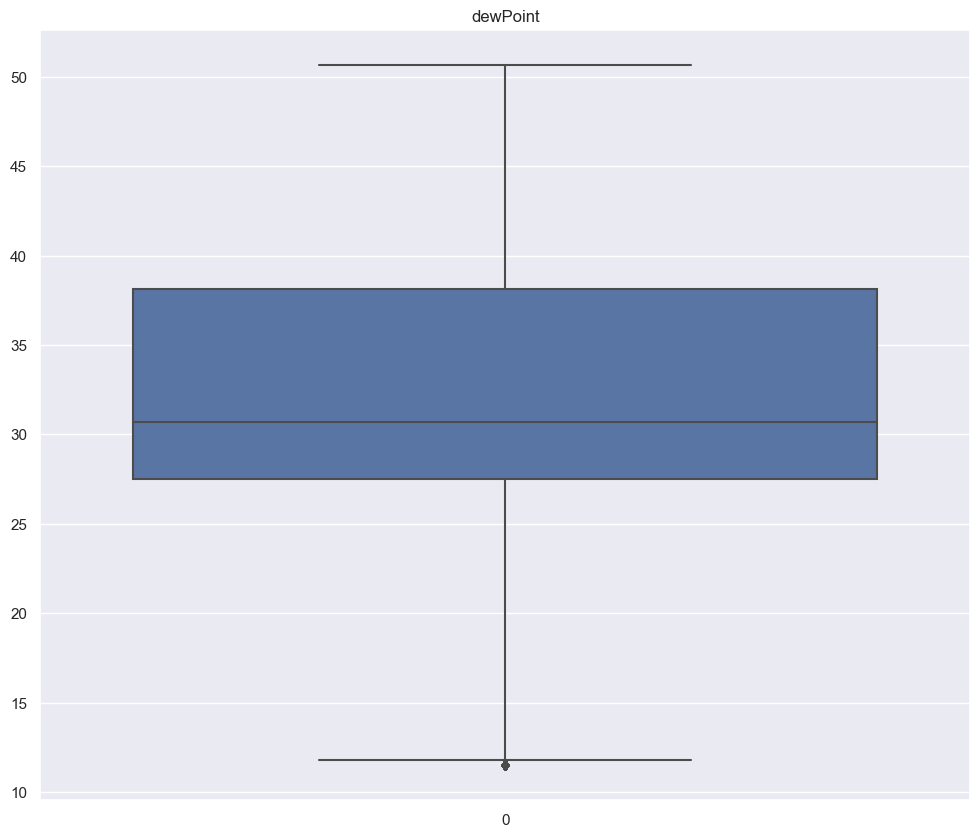

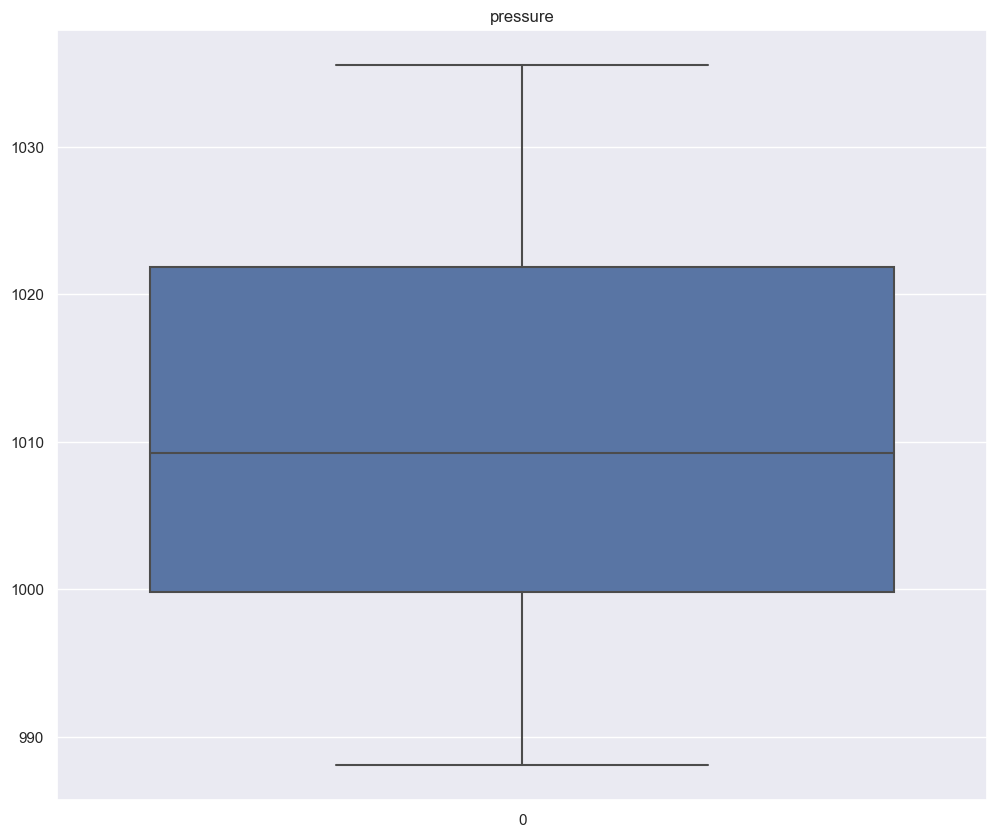

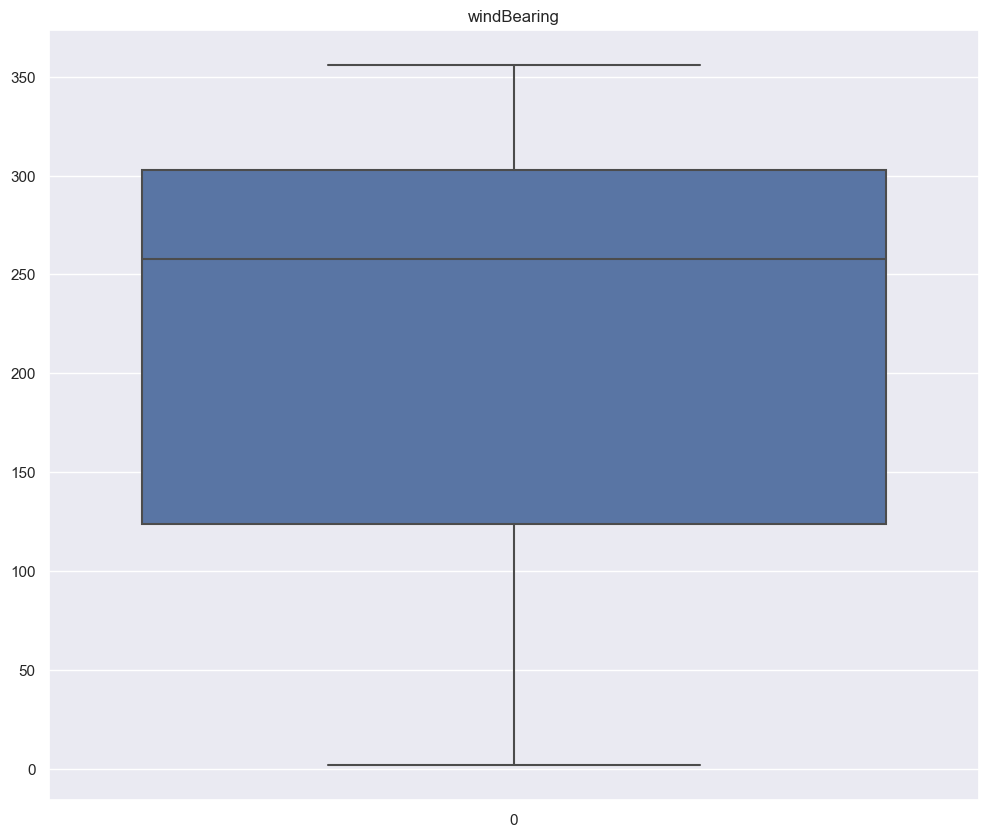

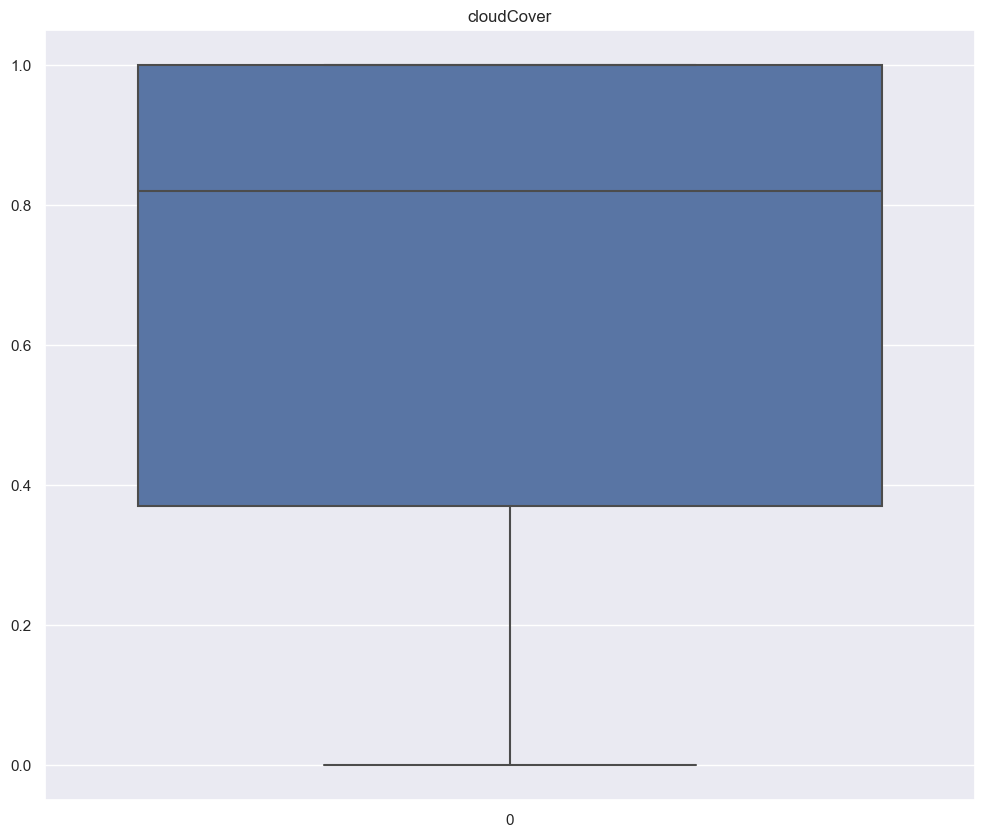

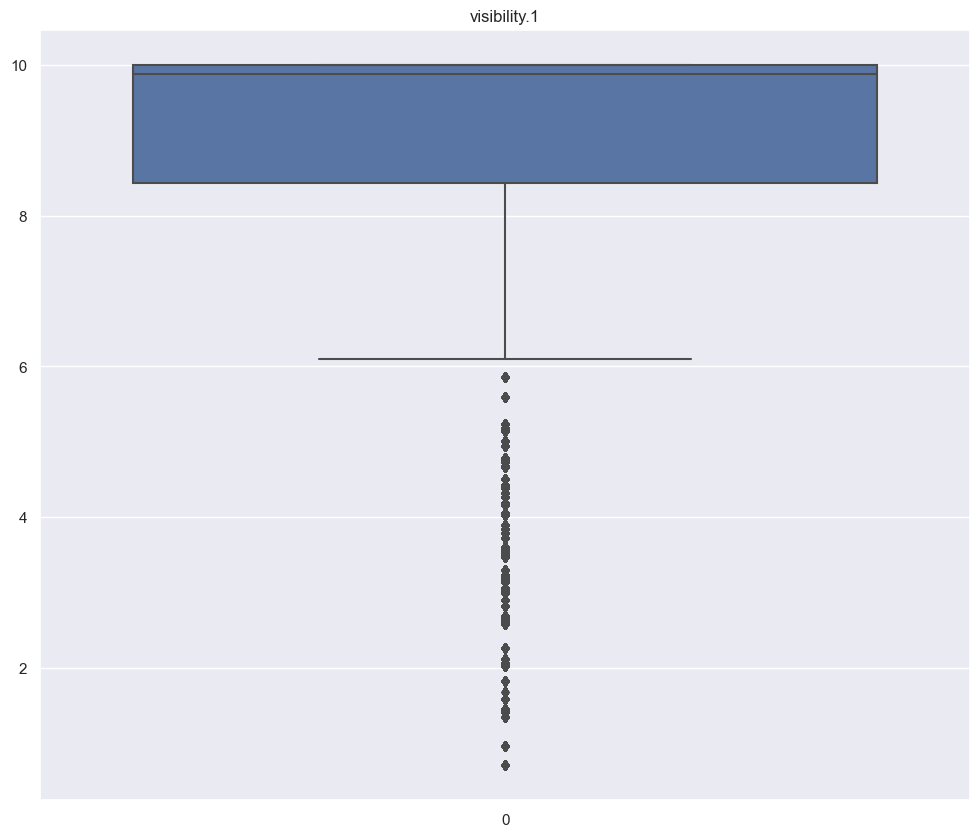

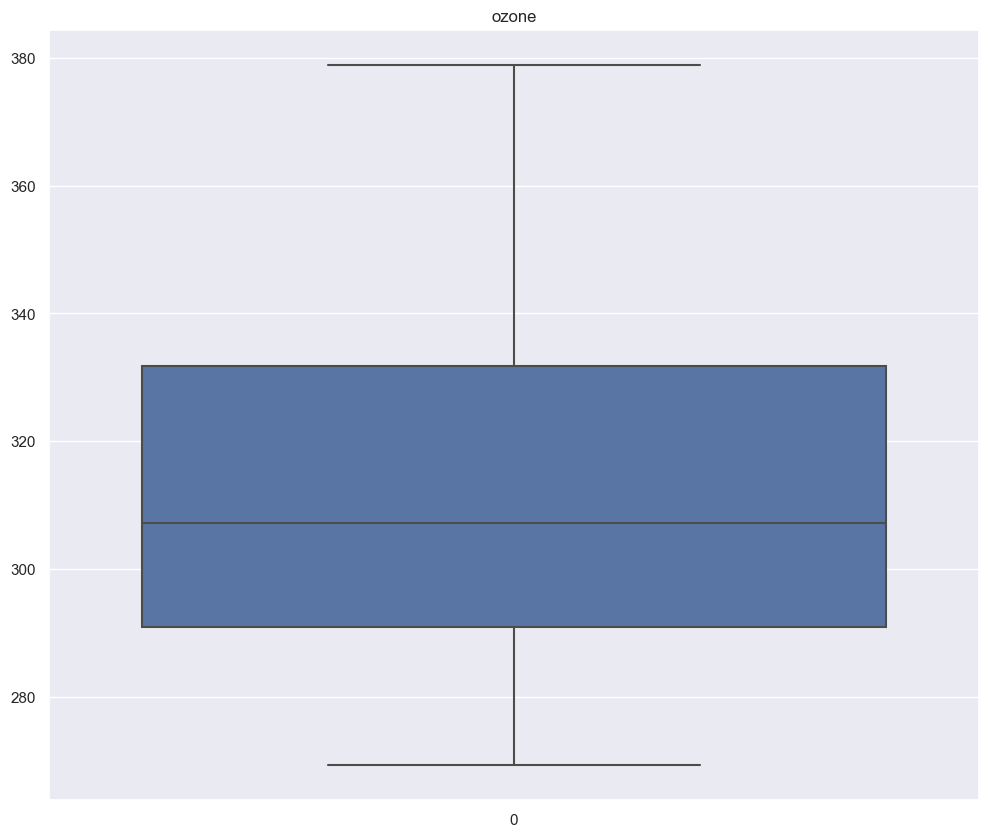

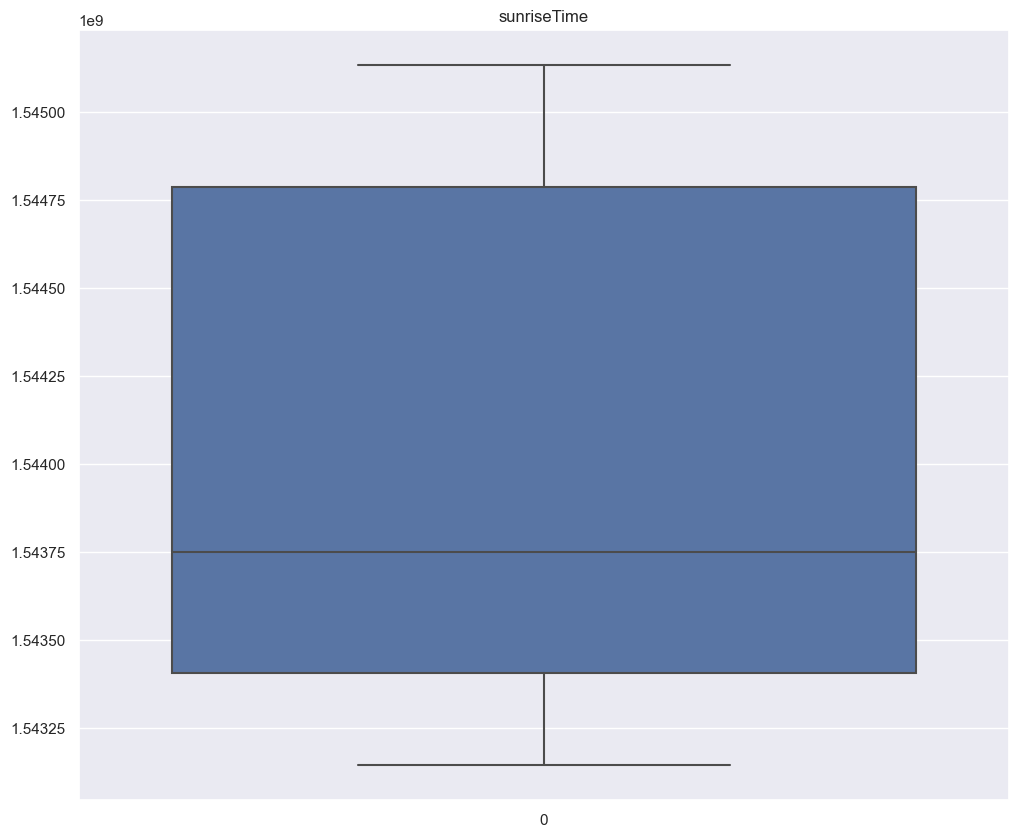

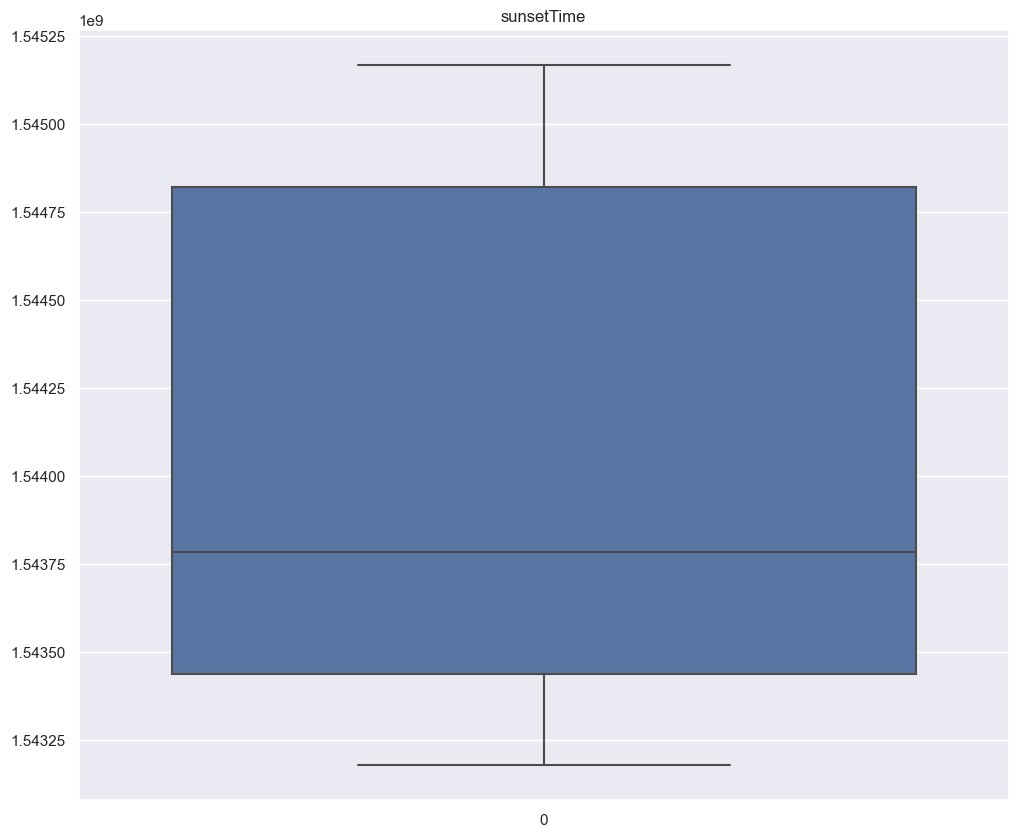

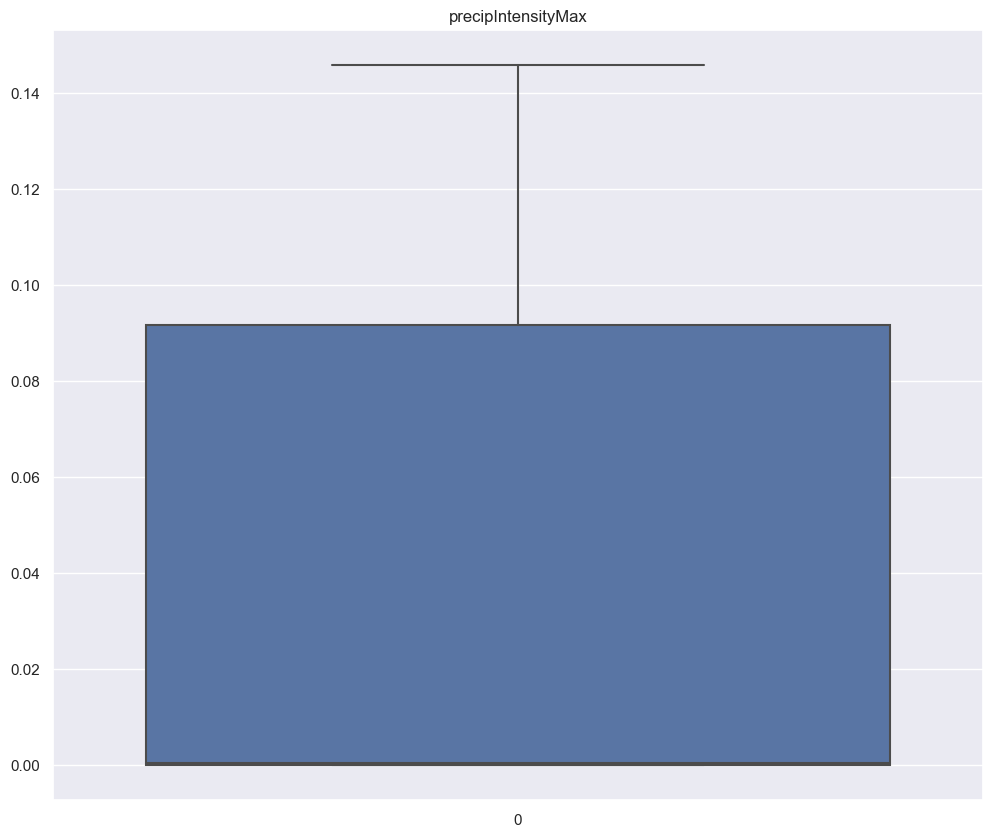

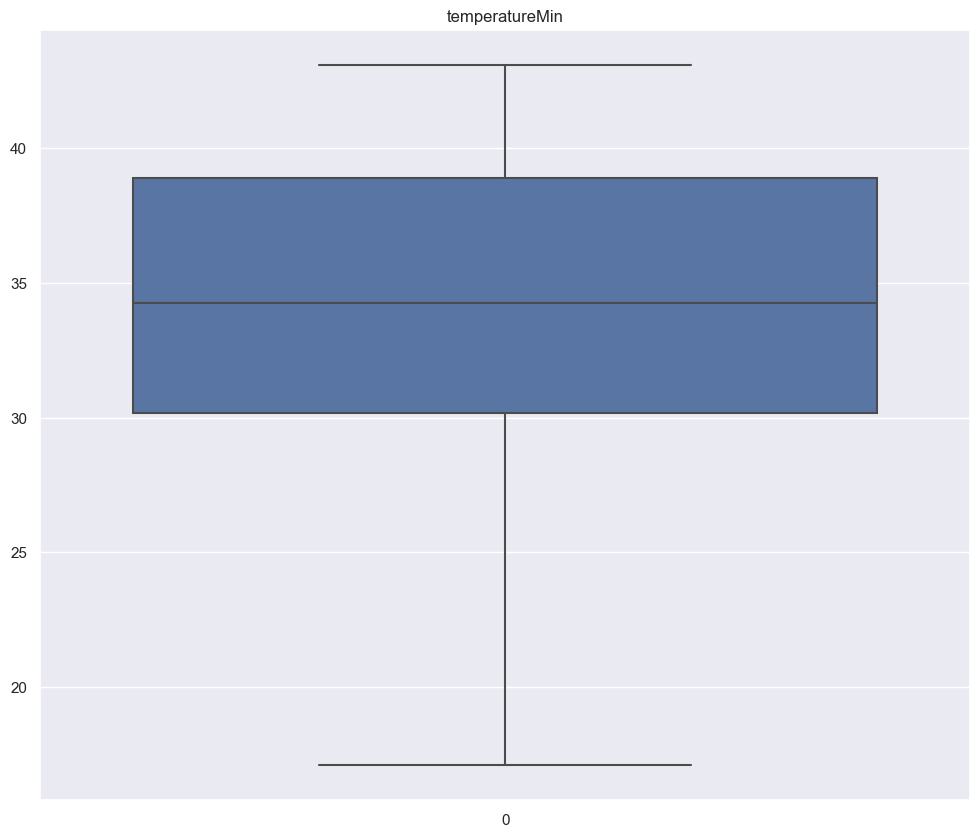

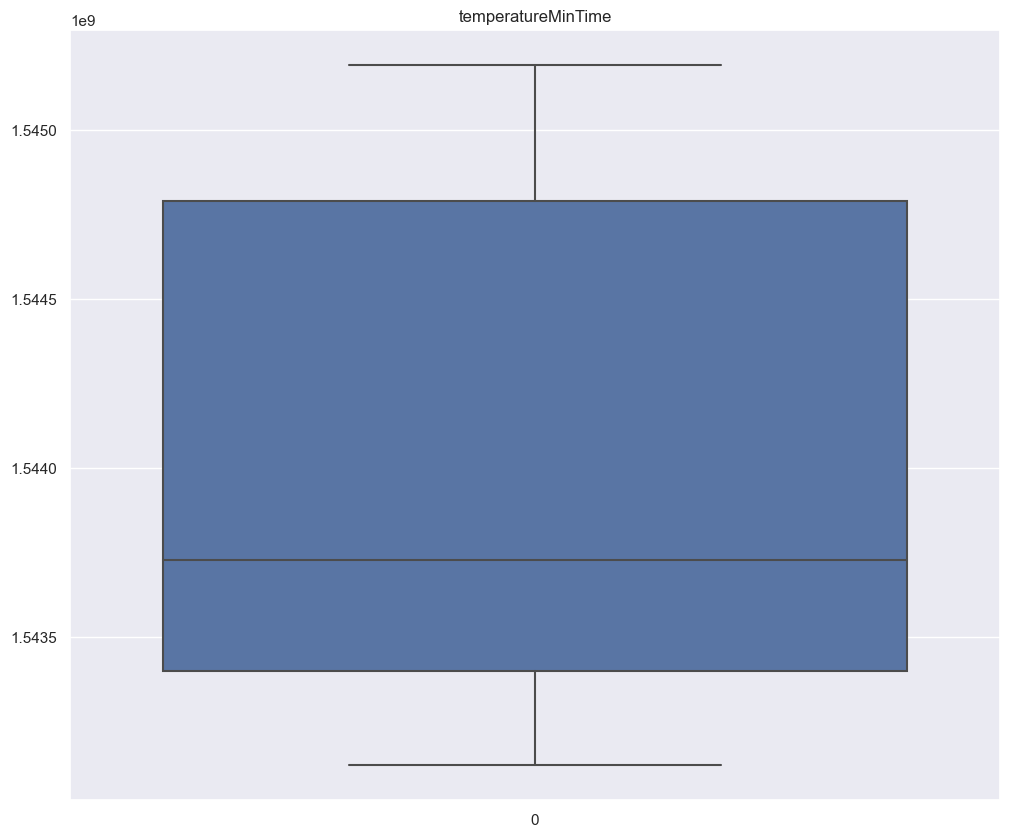

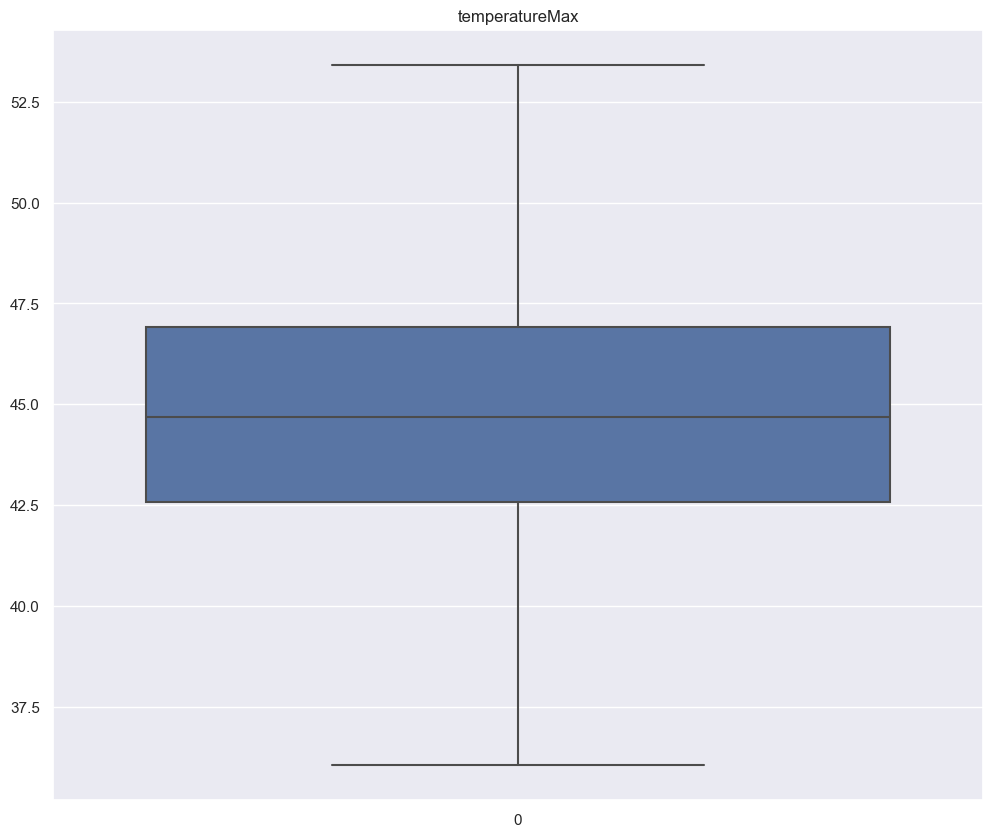

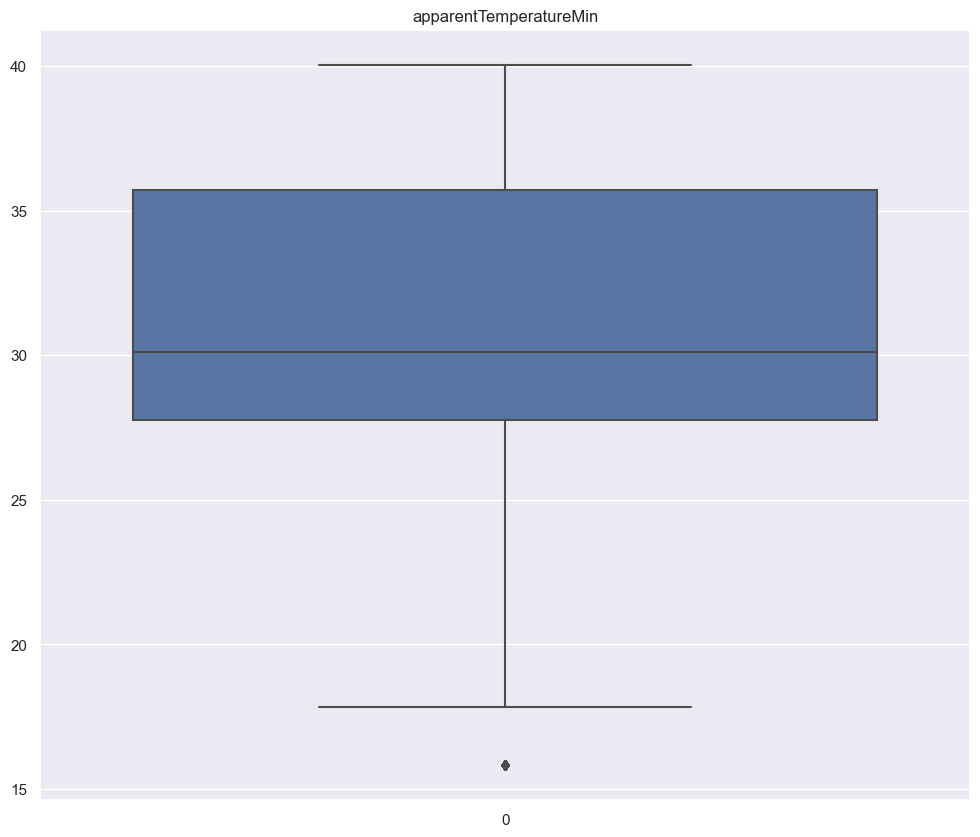

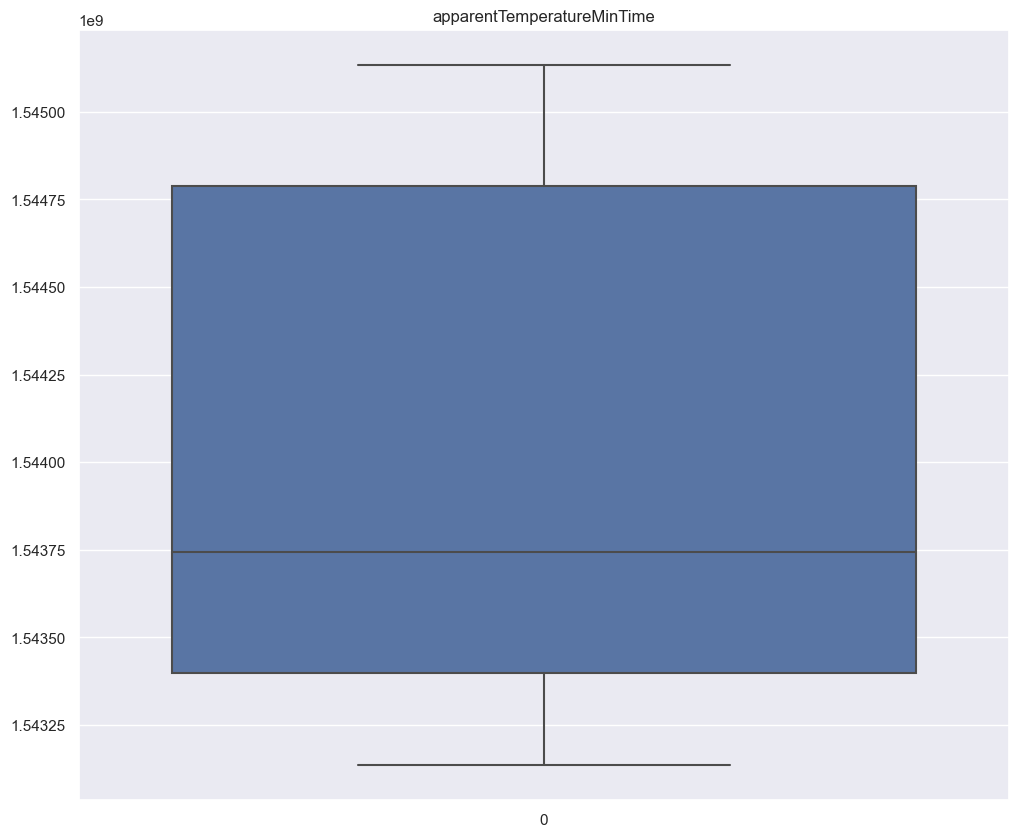

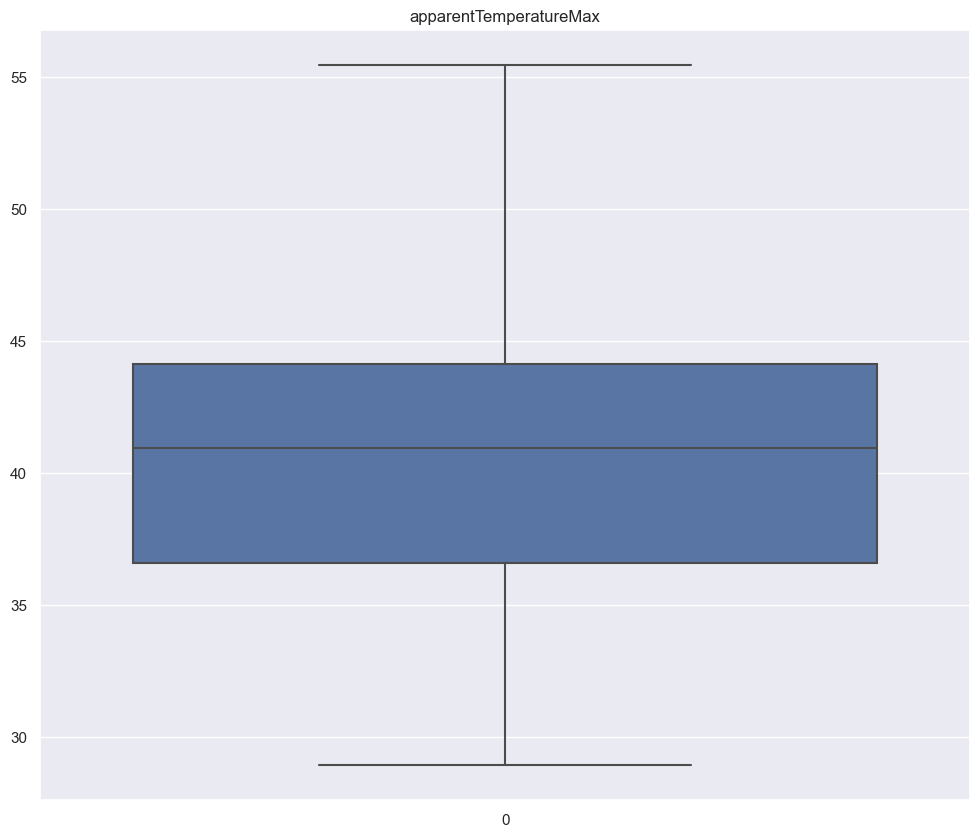

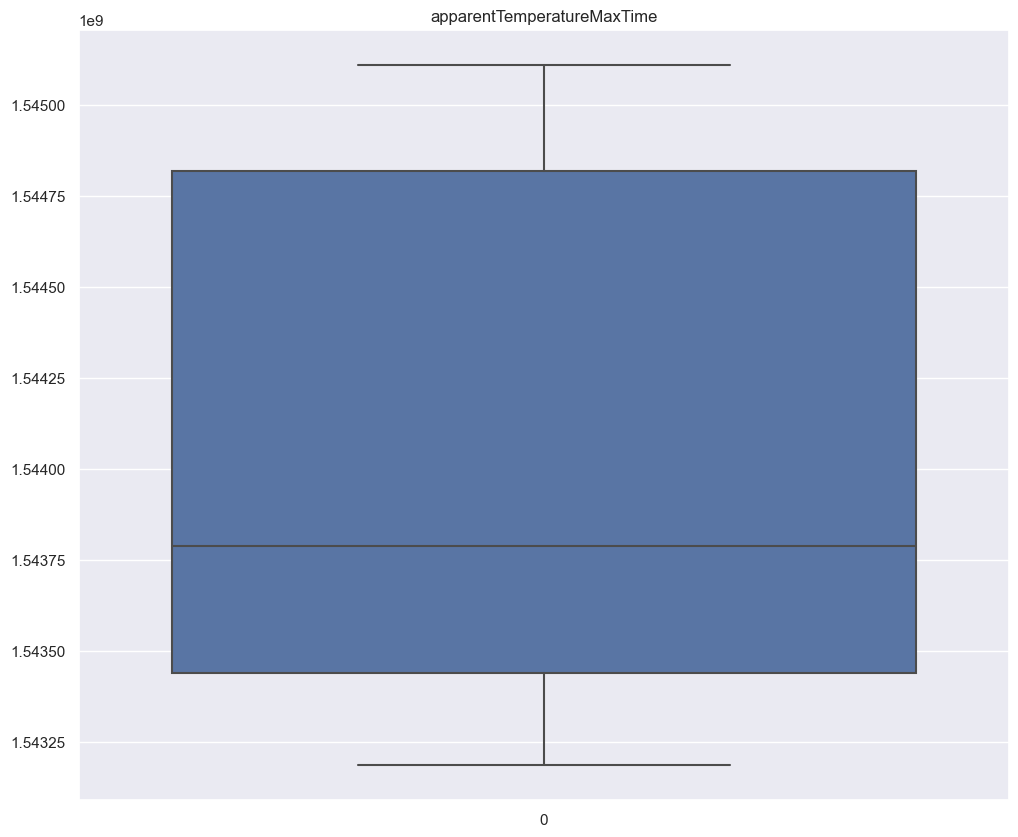

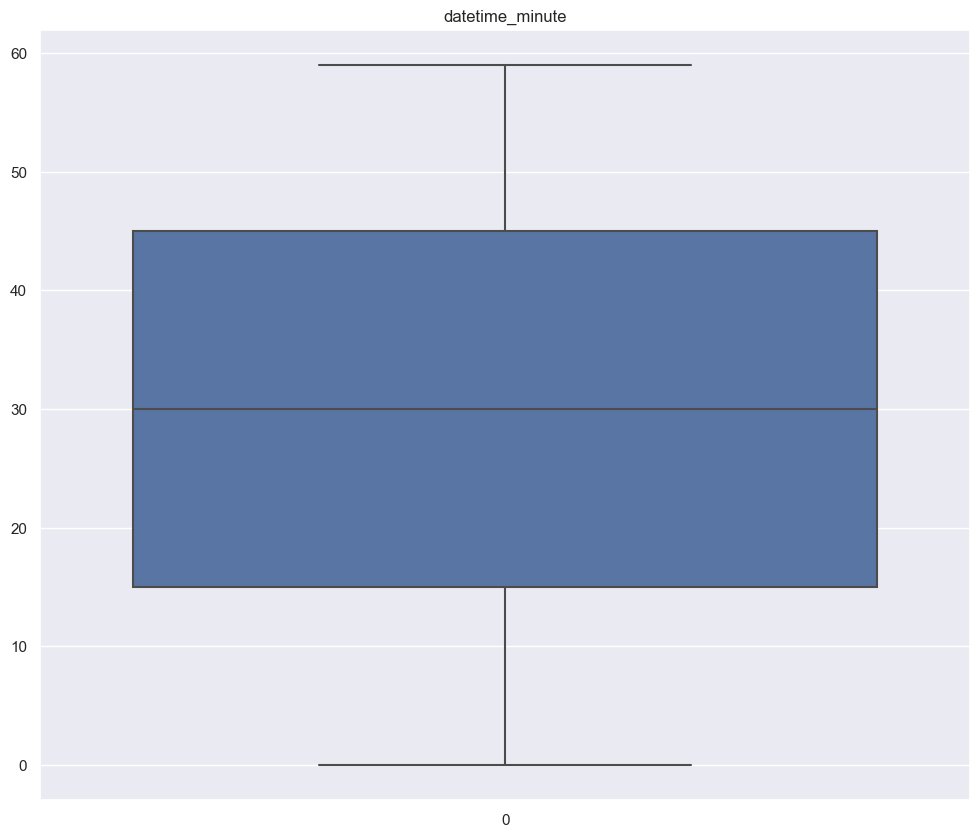

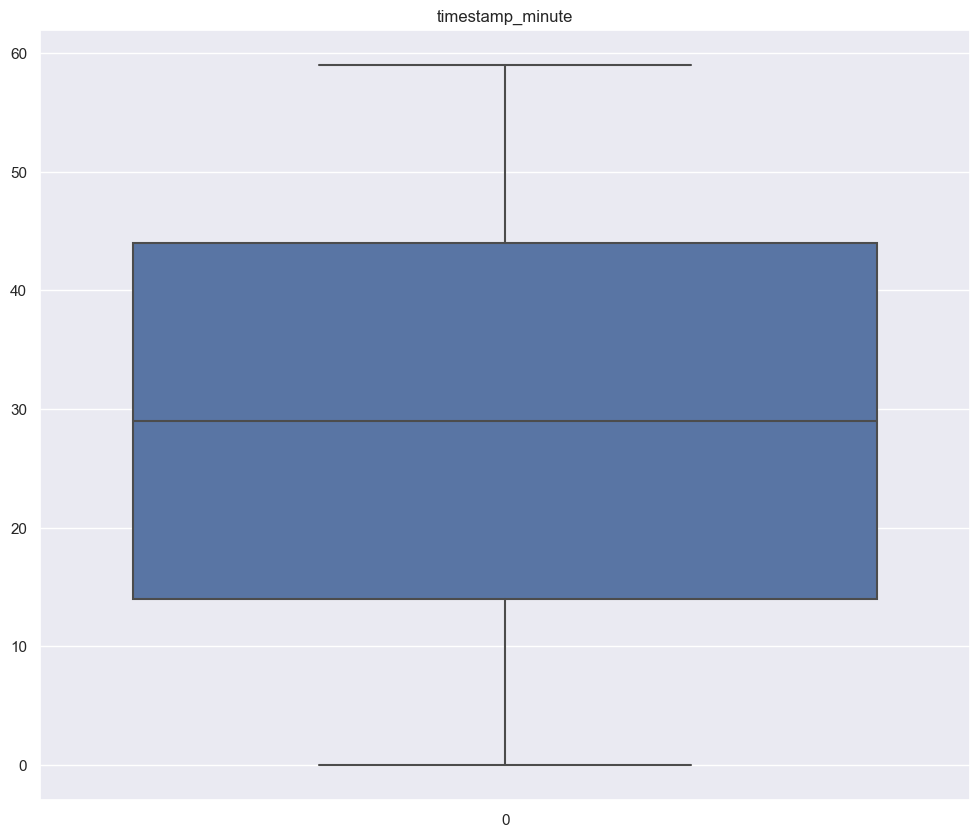

<Figure size 1200x1000 with 0 Axes>

In [58]:
for feature in continuous_feature:
    sns.boxplot(df_copy[feature])
    plt.title(feature)
    plt.figure(figsize=(12,10))

In [59]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_copy['visibility'], df_copy['visibility.1'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9692417420327638
p-value: 0.0


In [60]:
df_copy.drop('visibility.1',axis=1,inplace=True)

In [61]:
for i in categorical_feature:
    print(i)
    print(len(df_copy[i].unique()))
    print(df_copy[i].unique())
    print('*'*50)

timezone
1
['America/New_York']
**************************************************
source
12
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
**************************************************
destination
12
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
**************************************************
cab_type
2
['Lyft' 'Uber']
**************************************************
product_id
13
['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7

In [62]:
df_copy.drop('timezone',axis=1,inplace=True)

In [63]:
source_map = {'Haymarket Square':1, 'Back Bay':2, 'North End':3, 'North Station':4, 'Beacon Hill':5,'Boston University':6, 'Fenway':7, 'South Station':8, 'Theatre District':9,'West End':10, 'Financial District':11, 'Northeastern University':12}
destination_map = {'North Station':1, 'Northeastern University':2, 'West End':3, 'Haymarket Square':4,'South Station':5, 'Fenway':6, 'Theatre District':7, 'Beacon Hill':8, 'Back Bay':9,'North End':10, 'Financial District':11, 'Boston University':12}
cab_type_map = {'Lyft':1, 'Uber':2}
product_id_map = {'lyft_line':1, 'lyft_premier':2, 'lyft':3, 'lyft_luxsuv':4, 'lyft_plus':5, 'lyft_lux':6,'6f72dfc5-27f1-42e8-84db-ccc7a75f6969':7,'6c84fd89-3f11-4782-9b50-97c468b19529':8,'55c66225-fbe7-4fd5-9072-eab1ece5e23e':9,'9a0e7b09-b92b-4c41-9779-2ad22b4d779d':10,'6d318bcc-22a3-4af6-bddd-b409bfce1546':11,'997acbb5-e102-41e1-b155-9df7de0a73f2':12,'8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a':13}
name_map = {'Shared':1, 'Lux':2, 'Lyft':3, 'Lux Black XL':4, 'Lyft XL':5, 'Lux Black':6, 'UberXL':7,'Black':8, 'UberX':9, 'WAV':10, 'Black SUV':11, 'UberPool':12, 'Taxi':13}
short_summary_map = {' Mostly Cloudy ':1, ' Rain ':2, ' Clear ':3, ' Partly Cloudy ':4, ' Overcast ':5,' Light Rain ':6, ' Foggy ':7, ' Possible Drizzle ':8, ' Drizzle ':9}
long_summary_map = {' Rain throughout the day. ':1,' Rain until morning, starting again in the evening. ':2,' Light rain in the morning. ':3, ' Partly cloudy throughout the day. ':4,' Mostly cloudy throughout the day. ':5,' Light rain in the morning and overnight. ':6,' Light rain until evening. ':7, ' Foggy in the morning. ':8,' Overcast throughout the day. ':9, ' Possible drizzle in the morning. ':10,' Rain in the morning and afternoon. ':11}
icon_map = {' partly-cloudy-night ':1, ' rain ':2, ' clear-night ':3, ' cloudy ':4, ' fog ':5,' clear-day ':6, ' partly-cloudy-day ':7}

df_copy['source'] = df_copy['source'].map(source_map)
df_copy['destination'] = df_copy['destination'].map(destination_map)
df_copy['cab_type'] = df_copy['cab_type'].map(cab_type_map)
df_copy['product_id'] = df_copy['product_id'].map(product_id_map)
df_copy['name'] = df_copy['name'].map(name_map)
df_copy['short_summary'] = df_copy['short_summary'].map(short_summary_map)
df_copy['long_summary'] = df_copy['long_summary'].map(long_summary_map)
df_copy['icon'] = df_copy['icon'].map(icon_map)



In [64]:
df_copy.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,datetime_minute,timestamp_minute,timestamp_hour
0,9,16,12,1,1,1,1,1,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,1,1,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,1,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,30,0,15
1,2,27,11,1,1,1,2,2,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,2,2,0.1299,1.0,0.94,11.98,11.98,1543291200,6.086,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,2,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0,30,7
2,1,28,11,1,1,1,3,3,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,3,3,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,3,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0,30,6
3,4,30,11,1,1,1,4,4,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,3,4,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,3,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,53,23,10
4,3,29,11,1,1,1,5,5,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,4,5,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,1,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,49,19,9


In [65]:
df_copy.dropna(inplace=True)

In [66]:
df_copy.isnull().sum()

hour                           0
day                            0
month                          0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTe

In [67]:
df_copy

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,datetime_minute,timestamp_minute,timestamp_hour
0,9,16,12,1,1,1,1,1,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,1,1,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,1,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,30,0,15
1,2,27,11,1,1,1,2,2,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,2,2,0.1299,1.0,0.94,11.98,11.98,1543291200,6.086,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,2,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0,30,7
2,1,28,11,1,1,1,3,3,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,3,3,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,3,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0,30,6
3,4,30,11,1,1,1,4,4,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,3,4,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,3,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,53,23,10
4,3,29,11,1,1,1,5,5,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,4,5,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,1,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,49,19,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687279,23,1,12,10,10,2,10,10,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,4,6,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,1,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,53,23,5
687280,23,1,12,10,10,2,7,7,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,4,6,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,1,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,53,23,5
687281,23,1,12,10,10,2,9,9,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,4,6,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,1,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,53,23,5
687283,23,1,12,10,10,2,11,11,27.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,4,6,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,1,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,

In [68]:
df_copy.reset_index(drop=True,inplace=True)

In [69]:
area_info = df_copy.loc[:,['latitude','longitude','source','destination','distance','hour','day','month','cab_type','product_id','name','surge_multiplier','temperature','apparentTemperature','precipIntensity','precipProbability','humidity','windSpeed','windGust','windGustTime','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility','ozone','sunriseTime','sunsetTime','moonPhase','datetime_minute','timestamp_minute','timestamp_hour']]

In [70]:
df_copy['latitude'].unique()

array([42.2148, 42.3503, 42.3647, 42.3661, 42.3588, 42.3505, 42.3429,
       42.3519, 42.3644, 42.3559, 42.3398])

In [71]:
df_copy['longitude'].unique()

array([-71.033 , -71.081 , -71.0542, -71.0631, -71.0707, -71.1054,
       -71.1003, -71.0551, -71.0643, -71.0661, -71.055 , -71.0892])

In [72]:
area_info

,latitude,longitude,source,destination,distance,hour,day,month,cab_type,product_id,name,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility,ozone,sunriseTime,sunsetTime,moonPhase,datetime_minute,timestamp_minute,timestamp_hour
0,42.2148,-71.0330,1,1,0.44,9,16,12,1,1,1,1.0,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,30,0,15
1,42.2148,-71.0330,1,1,0.44,2,27,11,1,2,2,1.0,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,41.83,1003.97,90,1.00,0,6.086,291.1,1543232969,1543266992,0.64,0,30,7
2,42.2148,-71.0330,1,1,0.44,1,28,11,1,3,3,1.0,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0,30,6
3,42.2148,-71.0330,1,1,0.44,4,30,11,1,4,4,1.0,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,1543514400,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,53,23,10
4,42.2148,-71.0330,1,1,0.44,3,29,11,1,5,5,1.0,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,1543446000,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,49,19,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634262,42.3519,-71.0643,10,10,1.00,23,1,12,2,10,10,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,53,23,5
634263,42.3519,-71.0643,10,10,1.00,23,1,12,2,7,7,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,53,23,5
634264,42.3519,-71.0643,10,10,1.00,23,1,12,2,9,9,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,53,23,5
634265,42.3519,-71.0643,10,10,1.00,23,1,12,2,11,11,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,53,23,5


In [73]:
from sklearn.cluster import KMeans

wcss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init="k-means++",max_iter=1000)
    kmean.fit(area_info)
    wcss.append(kmean.inertia_)

In [74]:
wcss

[6.032476887271742e+16,
 2.715170943827309e+16,
 1.598513926811247e+16,
 1.0629656945151356e+16,
 7892599969137307.0,
 5900931946342734.0,
 4315392763444219.0,
 2980956040842092.0,
 2124802862933762.0]

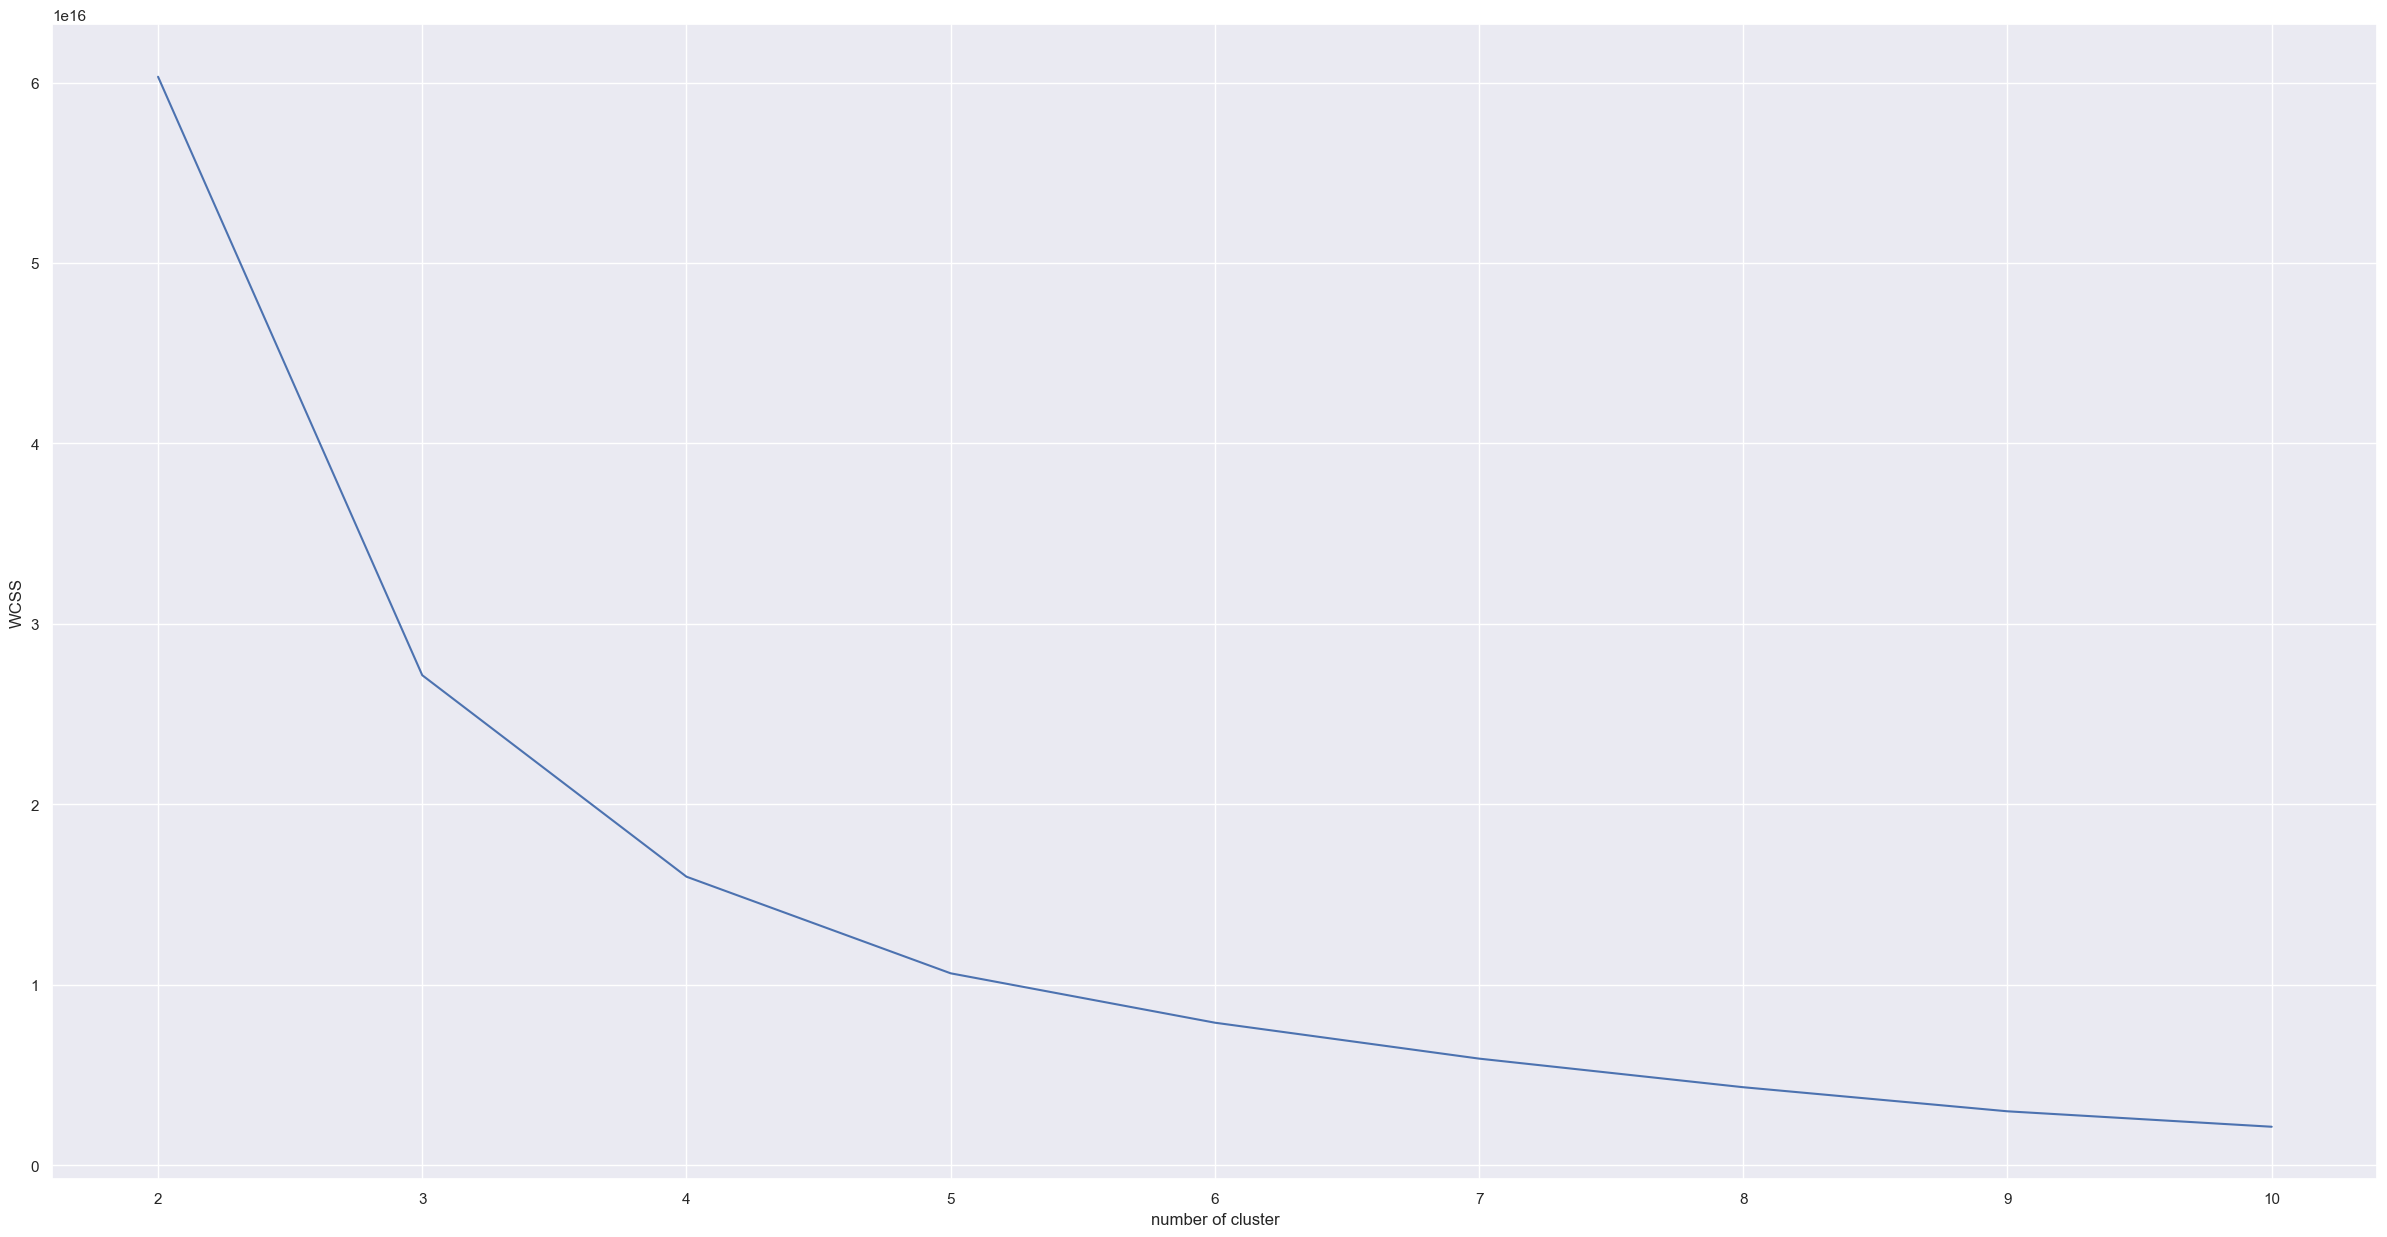

In [75]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [76]:
kmeans=KMeans(n_clusters=4,init="k-means++")
kmean.fit(area_info)
cluster_labels = kmean.labels_
df_copy['cluster'] = cluster_labels

In [77]:
cluster = kmean.cluster_centers_
centroids = np.array(cluster)

In [78]:
centroids

array([[ 4.23557404e+01, -7.10693801e+01,  6.51743974e+00,
         6.52992604e+00,  2.19248037e+00,  1.09995891e+01,
         1.31951927e+01,  1.20000000e+01,  1.51716581e+00,
         6.59530223e+00,  6.59530223e+00,  1.01493449e+00,
         2.89514194e+01,  2.61476088e+01, -3.40005801e-16,
        -1.09079412e-14,  6.02392942e-01,  2.83133880e+00,
         3.41341650e+00,  1.54473159e+09,  1.58699777e+01,
         1.03266682e+03,  2.05325283e+02,  4.88151936e-01,
         1.96037253e-01,  9.88081921e+00,  3.26359208e+02,
         1.54469715e+09,  1.54472997e+09,  2.08042823e-01,
         2.78883766e+01,  2.71573229e+01,  1.13549352e+01],
       [ 4.23329318e+01, -7.10656756e+01,  6.53896962e+00,
         6.47752475e+00,  2.17088756e+00,  1.15710858e+01,
         2.64923345e+01,  1.11074619e+01,  1.51894853e+00,
         6.61264286e+00,  6.61264286e+00,  1.01485826e+00,
         3.78186111e+01,  3.40218990e+01,  1.79890824e-15,
         2.43693954e-14,  6.64488626e-01,  6.10213457e+

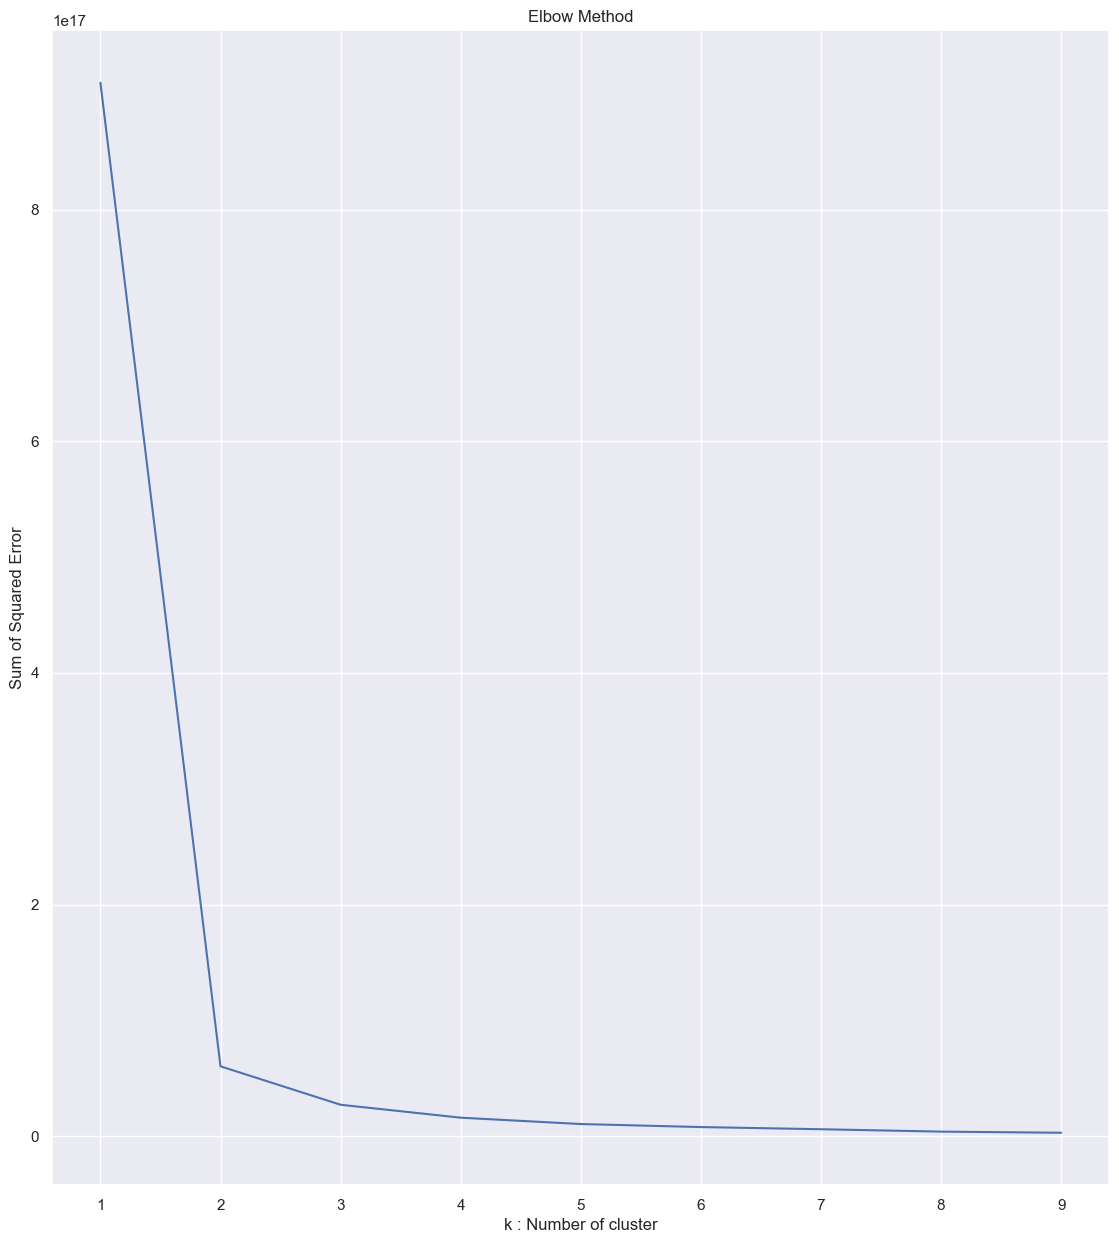

In [83]:
from sklearn.metrics import silhouette_score

sse = {}

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,init="k-means++").fit(area_info)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.show()

In [84]:
df_copy

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,datetime_minute,timestamp_minute,timestamp_hour,cluster
0,9,16,12,1,1,1,1,1,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,1,1,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,1,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,30,0,15,2
1,2,27,11,1,1,1,2,2,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,2,2,0.1299,1.0,0.94,11.98,11.98,1543291200,6.086,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,2,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0,30,7,4
2,1,28,11,1,1,1,3,3,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,3,3,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,3,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0,30,6,4
3,4,30,11,1,1,1,4,4,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,3,4,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,3,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,53,23,10,1
4,3,29,11,1,1,1,5,5,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,4,5,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,1,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,49,19,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634262,23,1,12,10,10,2,10,10,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,4,6,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,1,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,53,23,5,3
634263,23,1,12,10,10,2,7,7,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,4,6,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,1,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,53,23,5,3
634264,23,1,12,10,10,2,9,9,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,4,6,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,1,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,53,23,5,3
634265,23,1,12,10,10,2,11,11,27.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,4,6,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,1,29.65,1023.57,133,0.31,0,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,

In [85]:
df_copy.reset_index(drop=True,inplace=True)

In [86]:
from kneed import KneeLocator

k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')
k.elbow

4

In [81]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
source = df_copy.groupby("source")["cluster"].mean().sort_values(ascending=False).reset_index()

<Axes: title={'center': 'source vs cluster'}, xlabel='cluster', ylabel='source'>

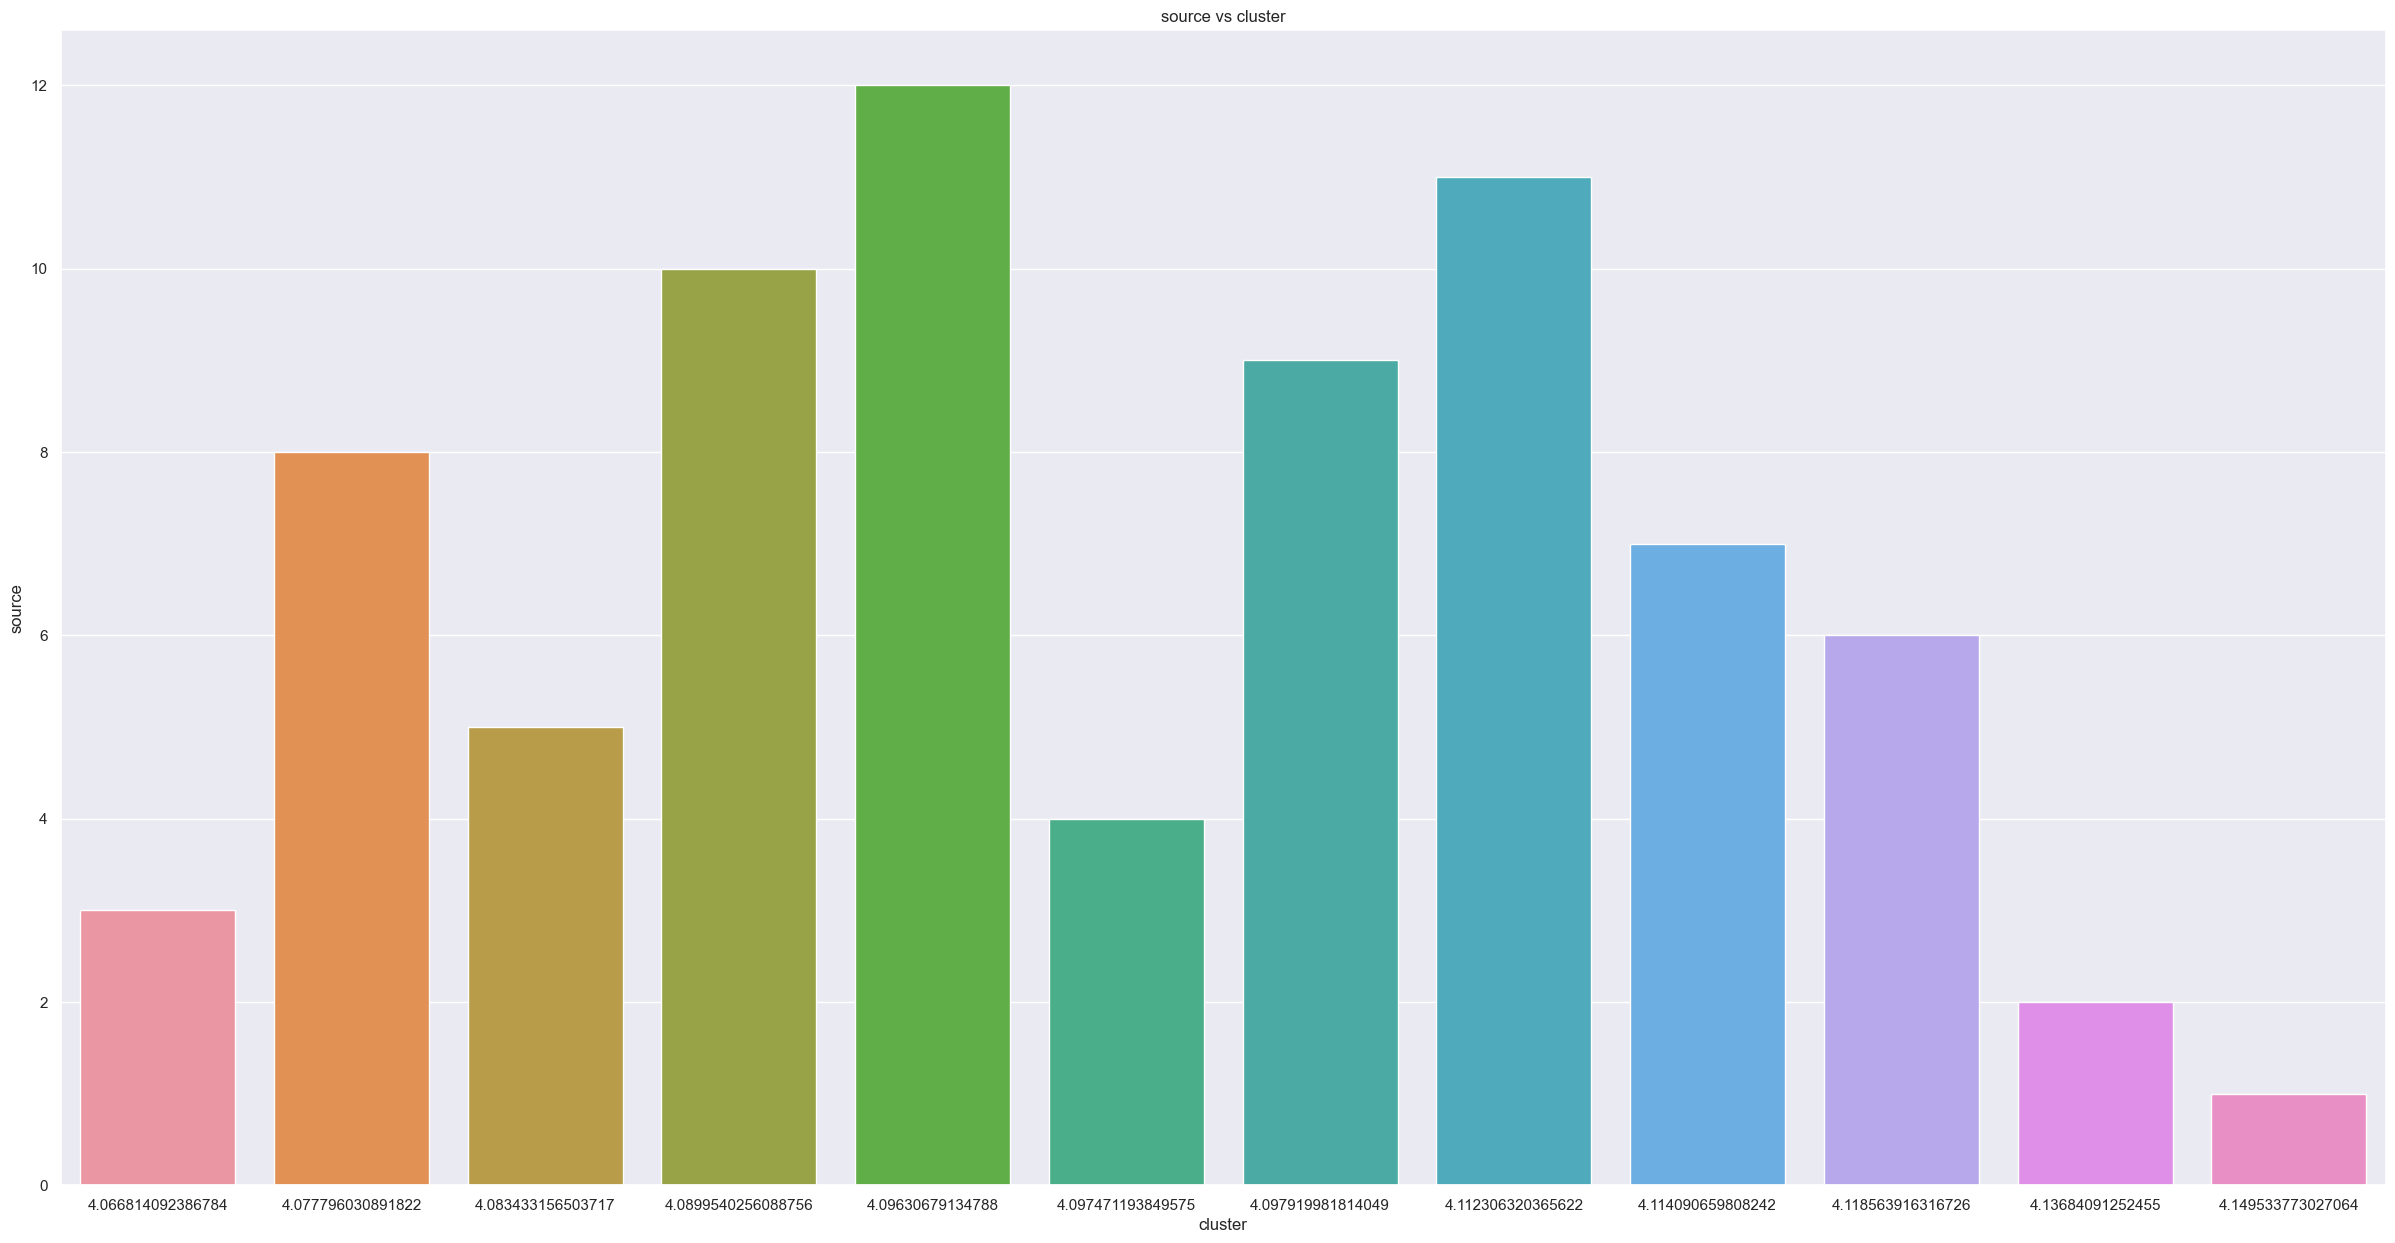

In [96]:
plt.title('source vs cluster')
sns.barplot(x='cluster',y='source',data=source)

In [91]:
# observation high booking area

In [92]:
df_copy.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'short_summary', 'long_summary', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'datetime_minute', '

In [93]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634267 entries, 0 to 634266
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         634267 non-null  int64  
 1   day                          634267 non-null  int64  
 2   month                        634267 non-null  int64  
 3   source                       634267 non-null  int64  
 4   destination                  634267 non-null  int64  
 5   cab_type                     634267 non-null  int64  
 6   product_id                   634267 non-null  int64  
 7   name                         634267 non-null  int64  
 8   price                        634267 non-null  float64
 9   distance                     634267 non-null  float64
 10  surge_multiplier             634267 non-null  float64
 11  latitude                     634267 non-null  float64
 12  longitude                    634267 non-null  float64
 13 

In [97]:
df_copy.corr('pearson')

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,datetime_minute,timestamp_minute,timestamp_hour,cluster
hour,1.000000,0.066453,-0.079905,0.003911,0.000772,-0.001377,-0.000919,-0.000919,0.000618,0.002155,-0.000070,0.019343,-0.006059,0.221756,0.204934,0.100904,0.015528,-0.233095,-0.129408,-0.275722,0.073169,0.081260,-0.028532,0.174416,0.007180,-0.028312,0.015097,-0.027258,0.005980,-0.028472,0.014323,-0.027428,0.330982,-0.000529,-0.067846,0.036126,0.026631,0.330393,0.034046,-0.028008,-0.028005,0.020841,0.020326,-0.027988,0.015306,-0.027483,0.004185,-0.028468,0.016482,-0.028167,0.003039,-0.028261,0.003431,0.001342,-0.042190,0.002479
day,0.066453,1.000000,-0.861324,0.000368,0.001896,0.001911,0.001572,0.001572,-0.000686,-0.001188,0.001539,0.006904,0.078296,-0.099340,-0.243490,-0.086992,-0.406362,0.091333,0.030579,-0.093664,0.440419,0.414754,-0.335891,0.099927,-0.281160,-0.342600,-0.088943,-0.333022,-0.402716,-0.342772,-0.216040,-0.334965,-0.011055,-0.110510,-0.444110,0.091914,-0.041518,-0.011950,0.376736,-0.340545,-0.340489,-0.008071,0.145812,-0.340674,0.036826,-0.333449,-0.294461,-0.344018,-0.033695,-0.334499,-0.438187,-0.343895,0.010598,-0.002933,0.021187,-0.163875
month,-0.079905,-0.861324,1.000000,-0.001233,0.000549,-0.000929,-0.000536,-0.000536,0.001039,0.002727,-0.000677,0.085759,-0.126479,-0.066916,0.048691,0.079302,0.187625,-0.154121,-0.097570,-0.021794,-0.334764,-0.286956,0.766884,0.003822,0.075454,0.771680,-0.138104,0.765099,0.162335,0.771788,-0.054196,0.766432,0.036597,-0.063714,0.589158,-0.135112,-0.016270,-0.012496,-0.148991,0.770306,0.770269,-0.451761,-0.213276,0.770389,-0.191238,0.764863,0.094426,0.772618,-0.172121,0.765637,0.210473,0.772524,-0.042503,-0.029061,-0.003983,0.187666
source,0.003911,0.000368,-0.001233,1.000000,-0.004565,-0.000199,-0.000176,-0.000176,0.095556,0.280409,0.023529,-0.002483,-0.001469,-0.000241,-0.000245,-0.002101,0.001745,-0.002498,-0.003597,-0.002082,-0.000978,-0.000765,-0.001827,0.002161,-0.000877,-0.001726,-0.003843,-0.001647,-0.000763,-0.001724,-0.003510,-0.001641,0.002297,-0.001258,-0.001763,0.001556,-0.003262,-0.001498,0.000726,-0.001725,-0.001725,0.003062,-0.000753,-0.001727,0.000654,-0.001635,-0.000704,-0.001760,0.000286,-0.001644,-0.000628,-0.001744,-0.001857,0.001731,-0.003675,-0.002893
destination,0.000772,0.001896,0.000549,-0.004565,1.000000,-0.000787,-0.000718,-0.000718,0.036016,0.107227,0.002626,-0.001122,-0.000054,-0.005596,-0.005980,0.000947,-0.002388,0.001197,0.002087,-0.003464,0.001281,0.001039,0.003395,-0.000195,-0.006155,0.003512,-0.002774,0.003434,-0.006798,0.003512,-0.003138,0.003412,0.000688,-0.005595,0.000379,0.000173,-0.001828,0.003152,0.003686,0.003478,0.003478,-0.004366,-0.000962,0.003481,-0.005778,0.003317,-0.005980,0.003452,-0.006632,0.003220,-0.006504,0.003469,0.001318,0.000090,0.002167,-0.000392
cab_type,-0.001377,0.001911,-0.000929,-0.000199,-0.000787,1.000000,0.868855,0.868855,-0.079628,-0.004801,-0.163742,-0.004439,0.002220,-0.001732,-0.003014,0.001156,0.000116,0.001382,0.002442,0.002405,0.003171,0.002598,0.000603,-0.002468,-0.002826,0.000643,-0.004094,0.000707,-0.003275,0.000637,-0.003688,0.000694,-0.000356,0.000022,-0.000521,-0.000680,0.000654,-0.000507,-0.000040,0.000658,0.000658,-0.001087,-0.000401,0.000666,-0.001193,0.000722,-0.002738,0.000623,-0.002270,0.000666,-0.003196,0.000612,-0.001537,-0.00

In [99]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'target_column' is the target column name
correlation_matrix = df_copy.corr()
correlation_with_target = correlation_matrix['price'].abs().sort_values(ascending=False)

# Print the correlation coefficients in descending order
print(correlation_with_target)

price                          1.000000
distance                       0.345735
surge_multiplier               0.204491
source                         0.095556
cab_type                       0.079628
product_id                     0.050874
name                           0.050874
destination                    0.036016
latitude                       0.002229
visibility                     0.002058
moonPhase                      0.001993
short_summary                  0.001880
long_summary                   0.001868
longitude                      0.001552
humidity                       0.001439
windBearing                    0.001417
windGust                       0.001298
windGustTime                   0.001144
apparentTemperatureMinTime     0.001102
temperatureMinTime             0.001062
apparentTemperatureLowTime     0.001049
temperatureMaxTime             0.001049
uvIndexTime                    0.001046
sunsetTime                     0.001044
sunriseTime                    0.001044


In [100]:
print(len(correlation_with_target))

56


In [101]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                print(corr_matrix.iloc[i, j])
                print(corr_matrix.columns[i])
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [103]:
corr_feature = correlation(df_copy,0.8)

-0.8613242055035731
month
0.8688552652252617
product_id
0.8688552652252617
name
1.0
name
0.9459975444570313
apparentTemperature
0.8384426814225537
precipProbability
0.9421121650551372
windGust
0.8207040268966359
temperatureHigh
0.9992517457292556
temperatureHighTime
0.9989673132041855
temperatureLowTime
0.9996949239938883
temperatureLowTime
0.8161419594084346
apparentTemperatureHigh
0.9615721591521682
apparentTemperatureHigh
0.9991622725698928
apparentTemperatureHighTime
0.9999863257133129
apparentTemperatureHighTime
0.9996840185172816
apparentTemperatureHighTime
0.9447246008251926
apparentTemperatureLow
0.9990332984914982
apparentTemperatureLowTime
0.9997155989185047
apparentTemperatureLowTime
0.9999612143444667
apparentTemperatureLowTime
0.9997094328958688
apparentTemperatureLowTime
0.8567335112985812
dewPoint
0.8399988667405047
dewPoint
0.999356281019415
sunriseTime
0.999919834645793
sunriseTime
0.9998214550954705
sunriseTime
0.9999101214181082
sunriseTime
0.9998431268914532
sunrise

In [105]:
corr_feature

{'apparentTemperature',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'dewPoint',
 'month',
 'moonPhase',
 'name',
 'precipProbability',
 'product_id',
 'sunriseTime',
 'sunsetTime',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLowTime',
 'temperatureMax',
 'temperatureMaxTime',
 'temperatureMinTime',
 'uvIndexTime',
 'windGust'}

In [106]:
df_copy.drop(corr_feature,axis=1,inplace=True)

In [107]:
X = df_copy.drop('price',axis=1)
y = df_copy['price']

In [108]:
df_copy.shape

(634267, 31)

In [109]:
X.shape

(634267, 30)

In [110]:
X.columns

Index(['hour', 'day', 'source', 'destination', 'cab_type', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipIntensity', 'humidity',
       'windSpeed', 'windGustTime', 'visibility', 'temperatureLow', 'icon',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'precipIntensityMax', 'temperatureMin', 'datetime_minute',
       'timestamp_minute', 'timestamp_hour', 'cluster'],
      dtype='object')

In [111]:
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
634262     9.5
634263    13.0
634264     9.5
634265    27.0
634266    10.0
Name: price, Length: 634267, dtype: float64

In [112]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [113]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler(with_mean=False))
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,X.columns)
])

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=20)

In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380560 entries, 513721 to 37135
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                380560 non-null  int64  
 1   day                 380560 non-null  int64  
 2   source              380560 non-null  int64  
 3   destination         380560 non-null  int64  
 4   cab_type            380560 non-null  int64  
 5   distance            380560 non-null  float64
 6   surge_multiplier    380560 non-null  float64
 7   latitude            380560 non-null  float64
 8   longitude           380560 non-null  float64
 9   temperature         380560 non-null  float64
 10  short_summary       380560 non-null  int64  
 11  long_summary        380560 non-null  int64  
 12  precipIntensity     380560 non-null  float64
 13  humidity            380560 non-null  float64
 14  windSpeed           380560 non-null  float64
 15  windGustTime        380560 non

In [116]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [117]:

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [118]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [120]:
regression.coef_

array([-1.46907118e-02, -3.83275061e-02, -5.06430506e-02, -1.48940072e-02,
       -4.26031456e-01,  3.11323908e+00,  1.70759109e+00,  1.64229897e-02,
        1.79432337e-03,  3.15342021e-02,  3.22066675e-03, -3.46728897e-02,
        1.59459235e-02,  3.23874085e-02, -1.05934582e-02, -6.06127651e-02,
        2.09676811e-02, -3.39666558e-02, -4.47178420e-03,  2.76045995e-02,
       -6.65177193e-03, -6.63226887e-03, -2.11449859e-02,  3.77830803e-02,
       -4.00458410e-03, -6.91620071e-03, -1.49839861e-02,  1.38570341e-02,
        1.60719244e-02,  2.00505669e-02])

In [121]:
regression.intercept_

118.01825947382684

In [122]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [123]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [124]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'RandomForest':RandomForestRegressor(max_depth=2, random_state=0,oob_score=True),
    "DecisionTree":DecisionTreeRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print('training accuracy',model.score(X_train,y_train))
    print("RMSE:",rmse)
    
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
training accuracy 0.16061915590760967
RMSE: 8.325947624998792
MAE: 6.852374073639899
R2 score 15.837933170357143


Lasso
Model Training Performance
training accuracy 0.13481468495498294
RMSE: 8.44899421275998
MAE: 7.032800922755046
R2 score 13.331941398206471


Ridge
Model Training Performance
training accuracy 0.1606191559064657
RMSE: 8.325947590537595
MAE: 6.852374706696134
R2 score 15.837933867052723


Elasticnet
Model Training Performance
training accuracy 0.12618028764185418
RMSE: 8.490082964163845
MAE: 7.074665159416196
R2 score 12.486931621020748


RandomForest
Model Training Performance
training accuracy 0.12275947816623856
RMSE: 8.510657225791691
MAE: 7.051409925951985
R2 score 12.062271839894867


DecisionTree
Model Training Performance
training accuracy 0.5821809523113648
RMSE: 11.251727745474849
MAE: 9.059245146694964
R2 score -53.70481526807409




In [ ]:
# i am getting best accuracy in desicion tree modal

In [125]:
params = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [126]:
estimators_var = [
    ('linear_regression', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor()),
    ('gradient_boosting', GradientBoostingRegressor())
]

In [129]:
## Train multiple models

models={
    "grid_search_randomfprest": GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5),
    "grid_search_desicion_tree": GridSearchCV(DecisionTreeRegressor(), params, cv=5),
    'Bagging_randomforest': BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=4, random_state=0),n_estimators=15, random_state=0),
    'Bagging_ridge': BaggingRegressor(base_estimator=Ridge(),n_estimators=10, random_state=0),
    'Stacking_regressor': StackingRegressor(estimators=estimators_var, final_estimator=GradientBoostingRegressor(max_depth=4, random_state=0),cv=5)
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')